In [3]:
import pickle
import random
import json
from typing import List, Dict, Counter, Any

import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns

random.seed(42)
sns.set()
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['figure.dpi'] = 150

def time_between_mentions(locations: List[int]):
    distances = []
    for i, loc in enumerate(locations):
        if i == 0:
            continue
            
        dist = locations[i] - locations[i - 1]
        assert dist > 0
        distances.append(dist)
    return distances


In [ ]:
# Load One Session
session = 111
base_dir = '../../data/interim/bill_mentions/'
in_path = base_dir + f'{session}.pickle'
with open(in_path, 'rb') as in_file:
    mentions = pickle.load(in_file)

In [4]:
# Load Multiple Sessions
mentions = {}
base_dir = '../../data/interim/bill_mentions/'
for session in range(93, 115):
    in_path = base_dir + f'{session}.pickle'
    with open(in_path, 'rb') as in_file:
        mentions.update(pickle.load(in_file))

    # for val in mentions.values():
    #     del val['contexts']

print(len(mentions))

6680


 TODO analyze encore per session
# Distribution of Number of Mentions

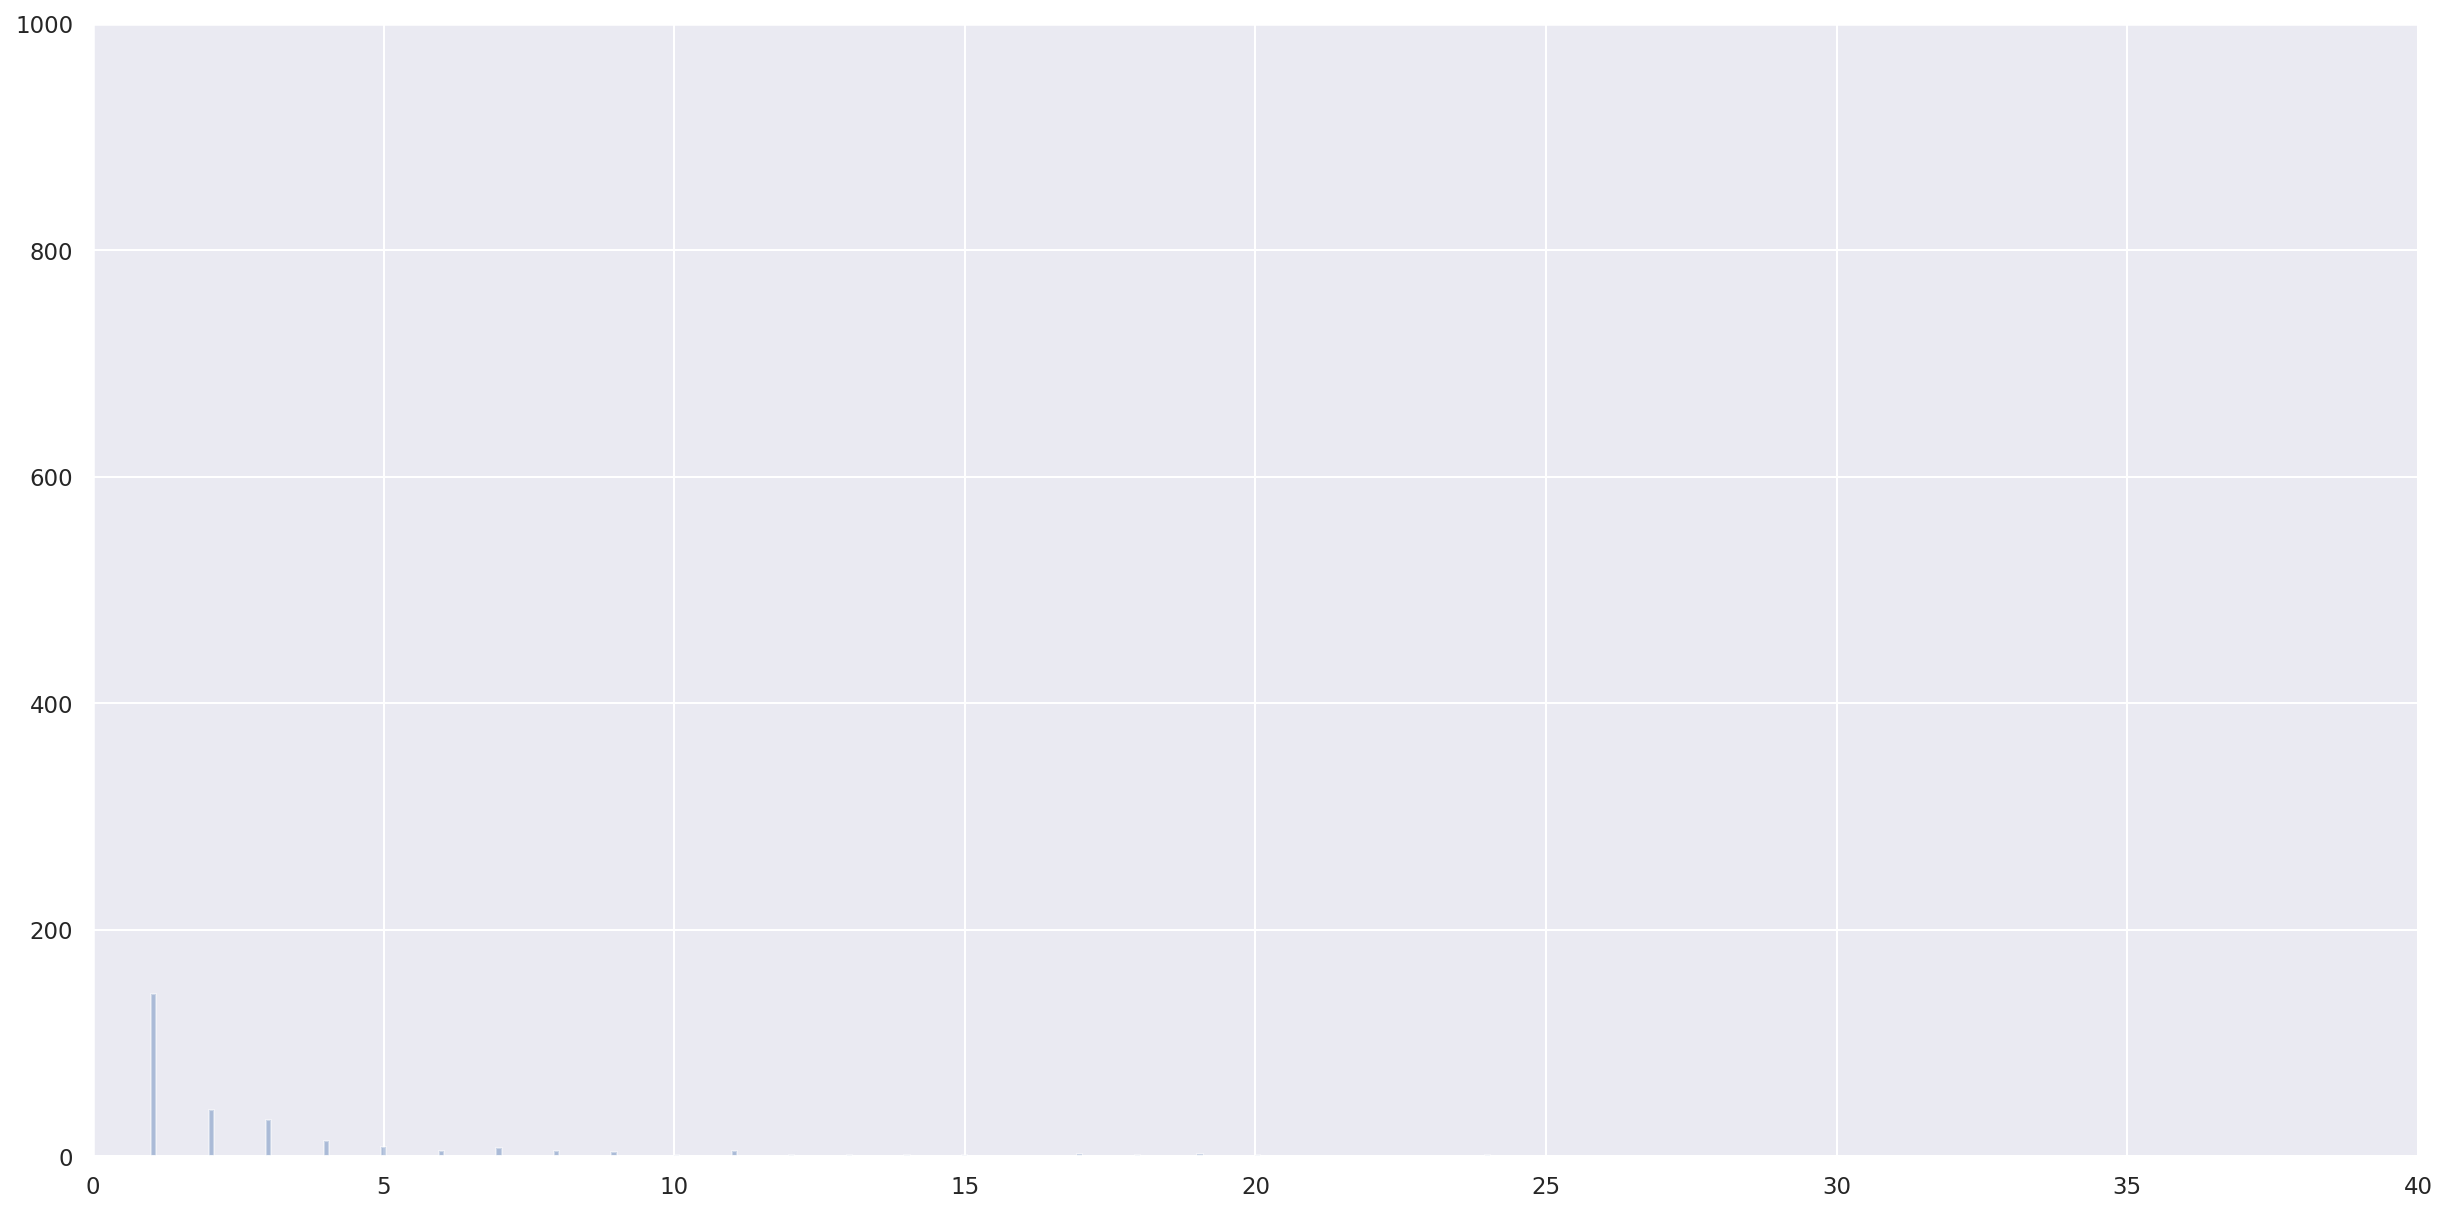

In [136]:
hist = []
for bill, val in mentions.items():
    hist.append(val['count'])
sns.distplot(hist, bins=500, kde=False)
plt.gca().set_xlim(0, 40)
plt.gca().set_ylim(0, 1000)
plt.show()

In [137]:
for bill, val in encore.items():
    x_axis.append(val['mean_spread'])
    y_axis.append(len(val['index']))
    
    print(f'{val["mean_spread"]:.2f}\t{bill}')
    if val['spread'] > 10:
        print(val['index'], val['mean_spread'])

230.50	Keystone XL Pipeline Act


KeyError: 'spread'

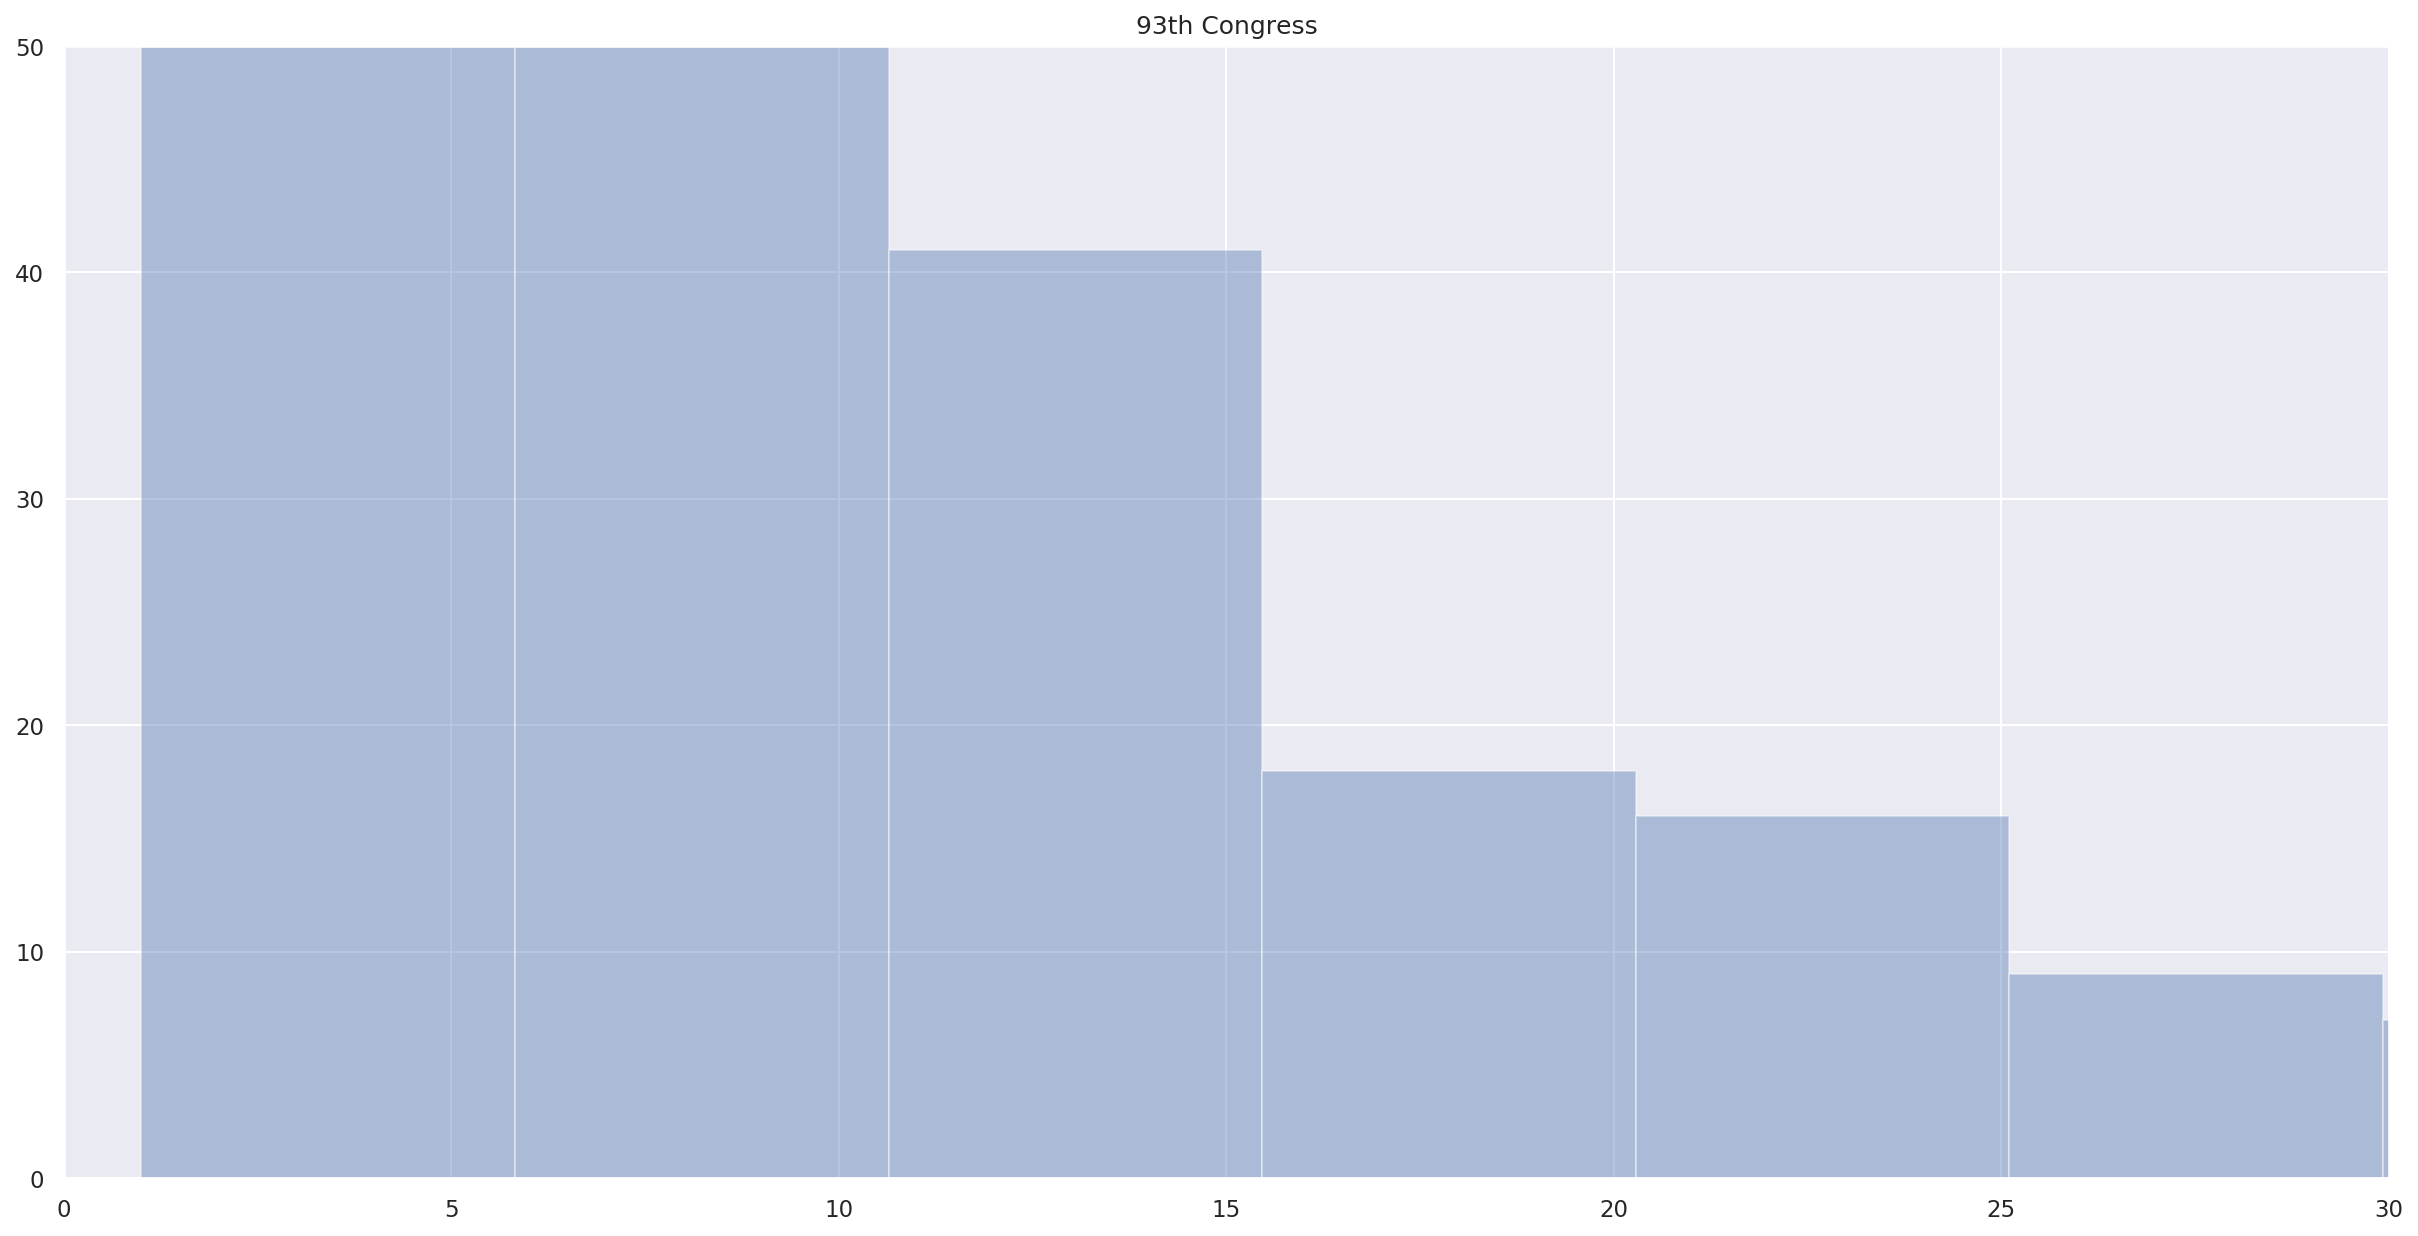

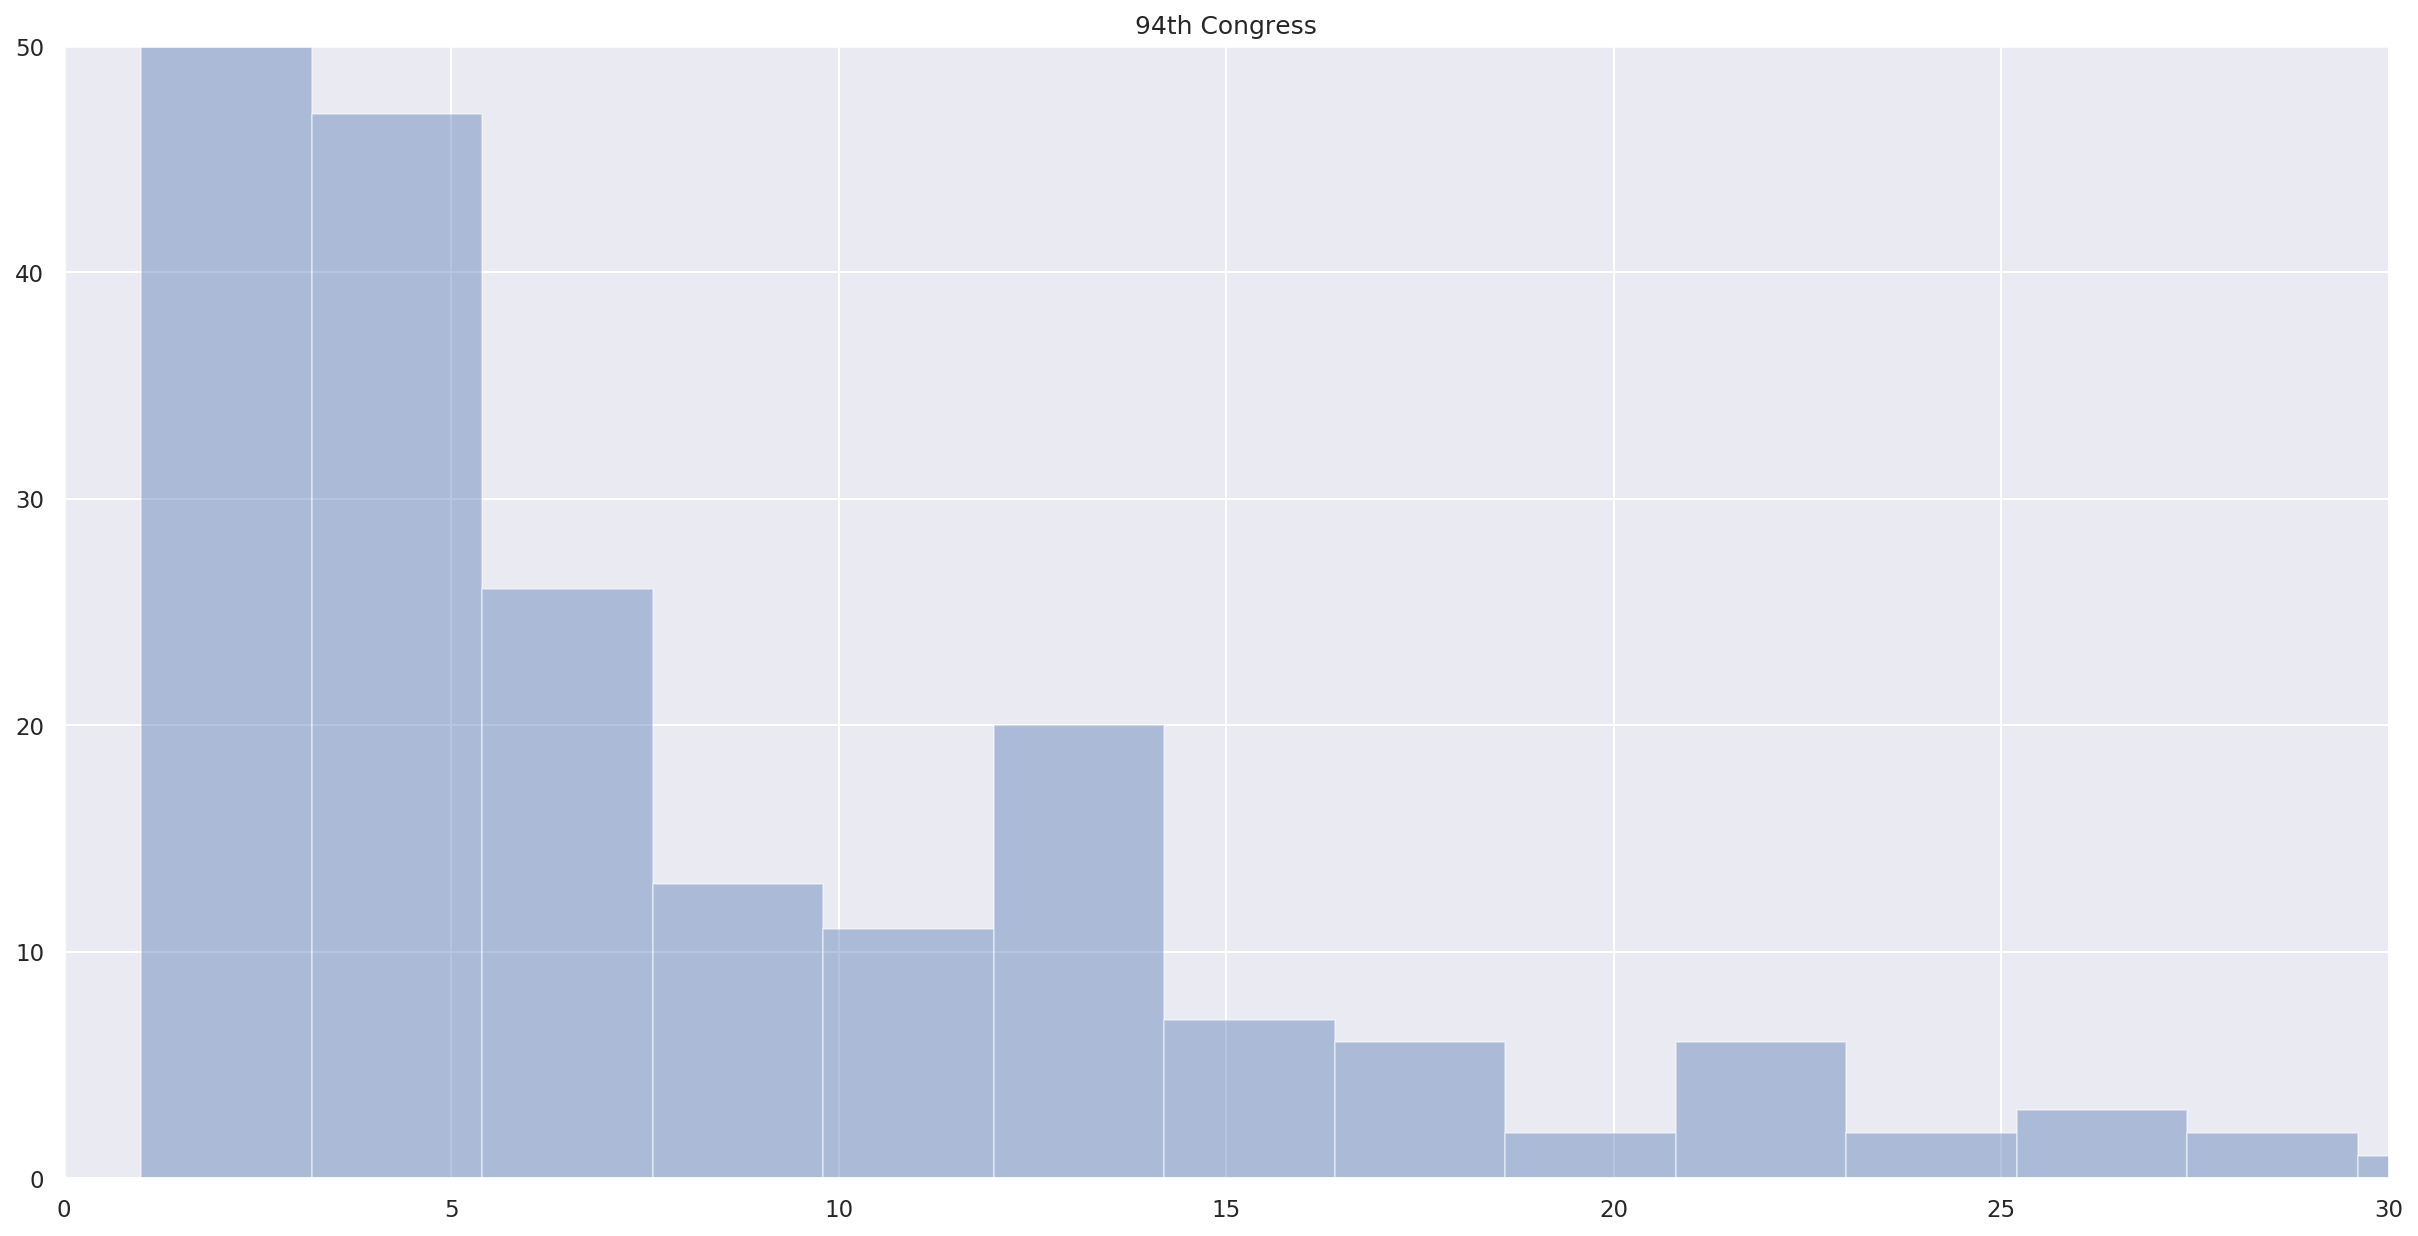

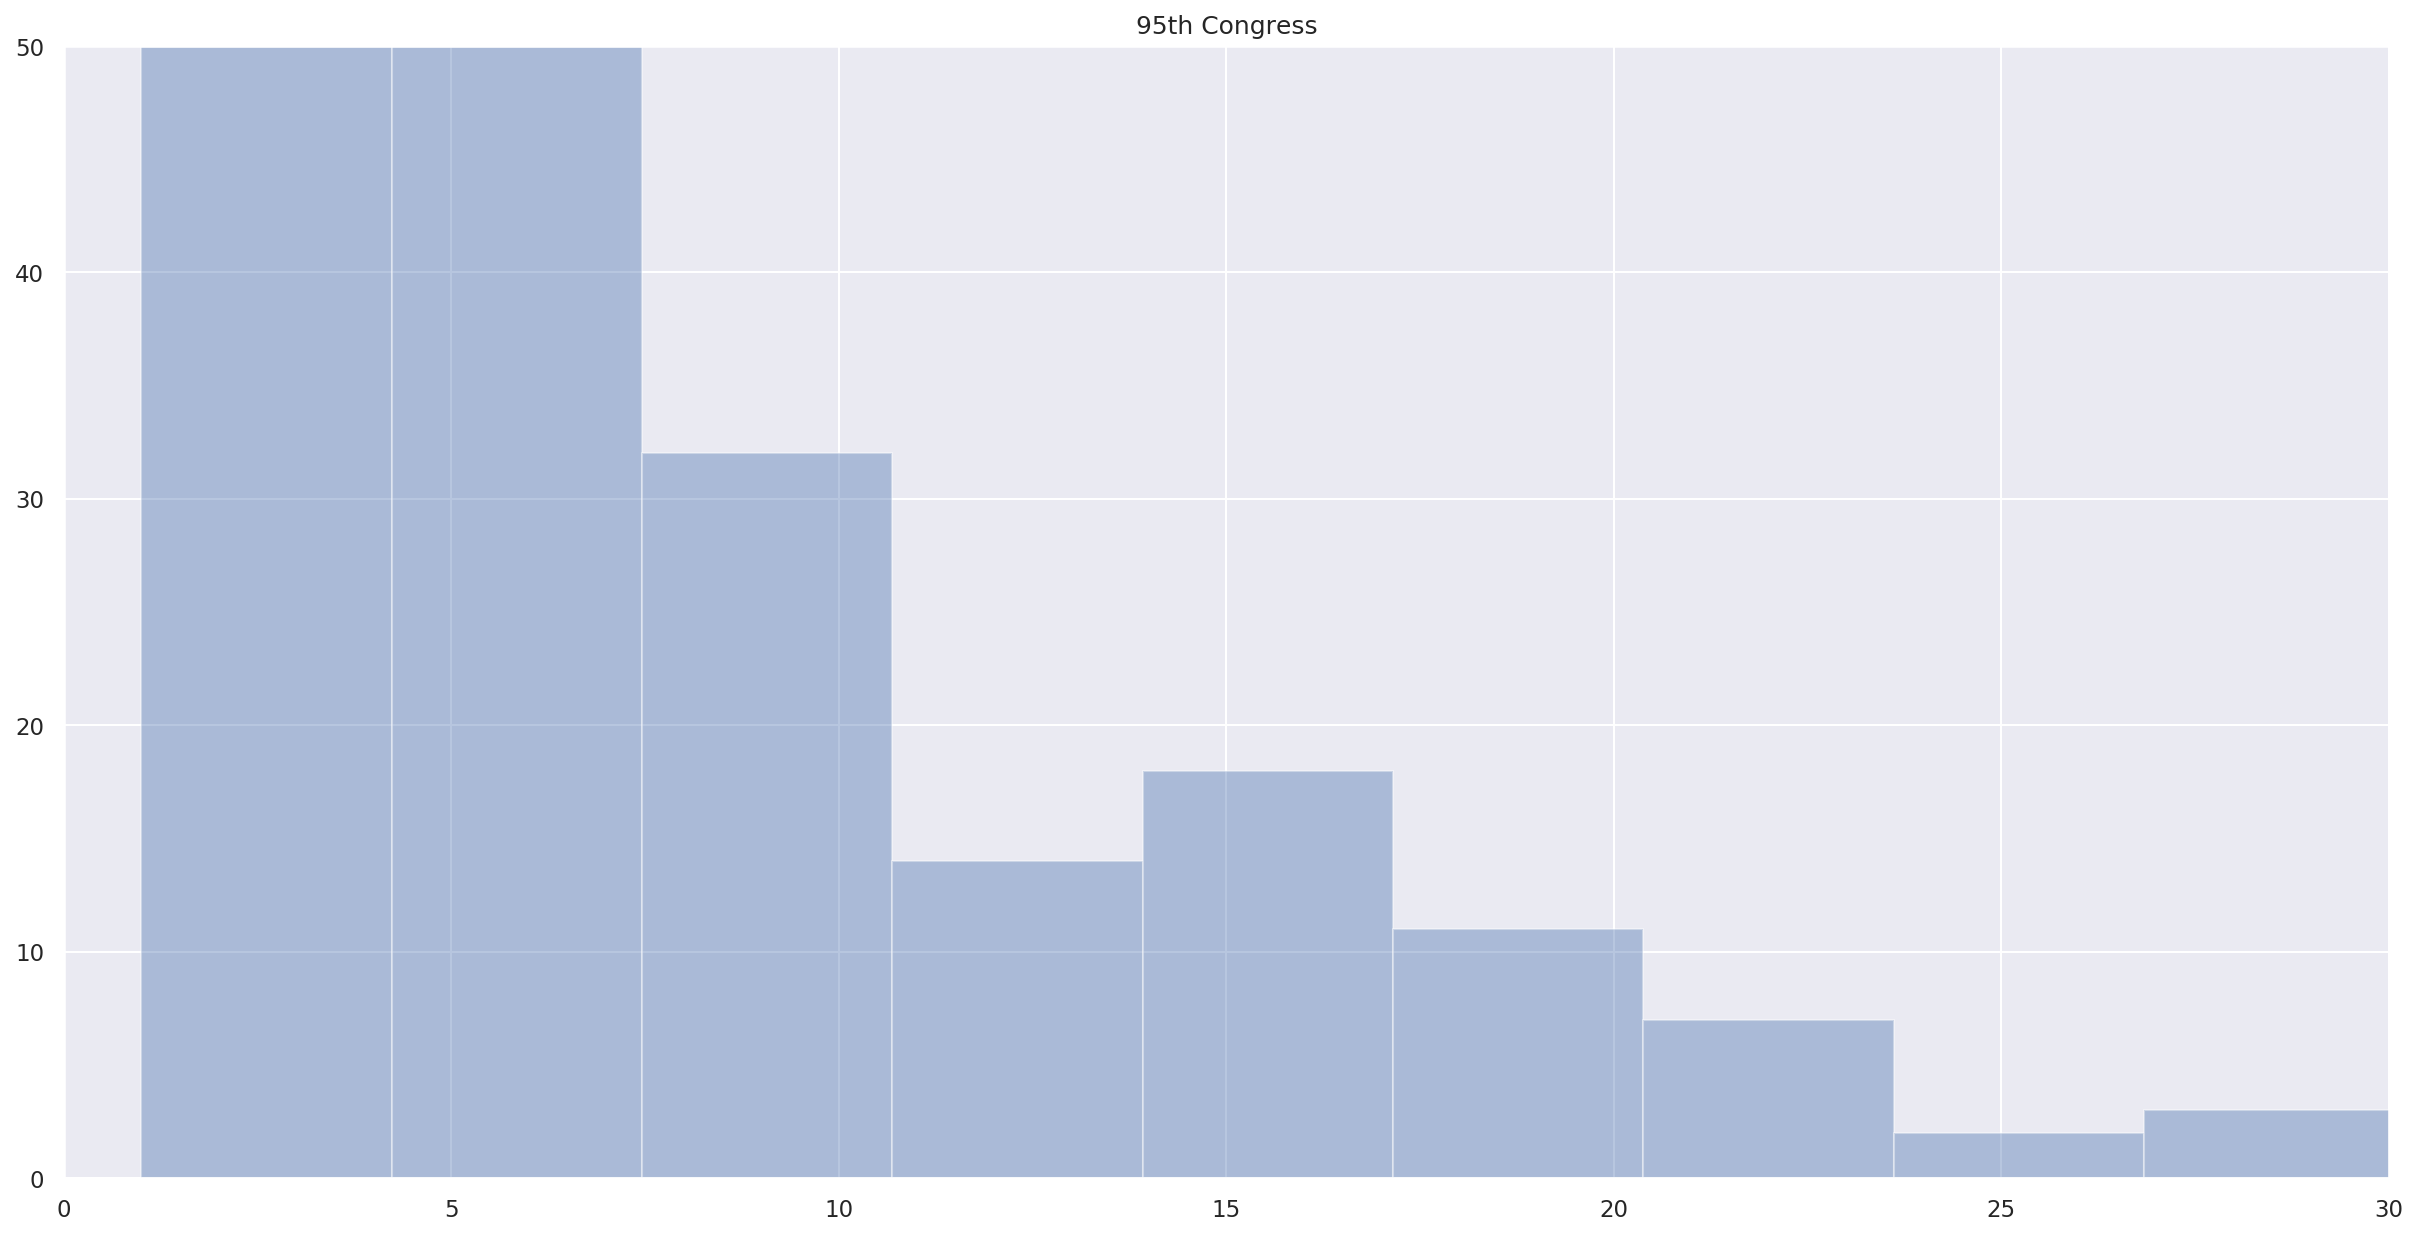

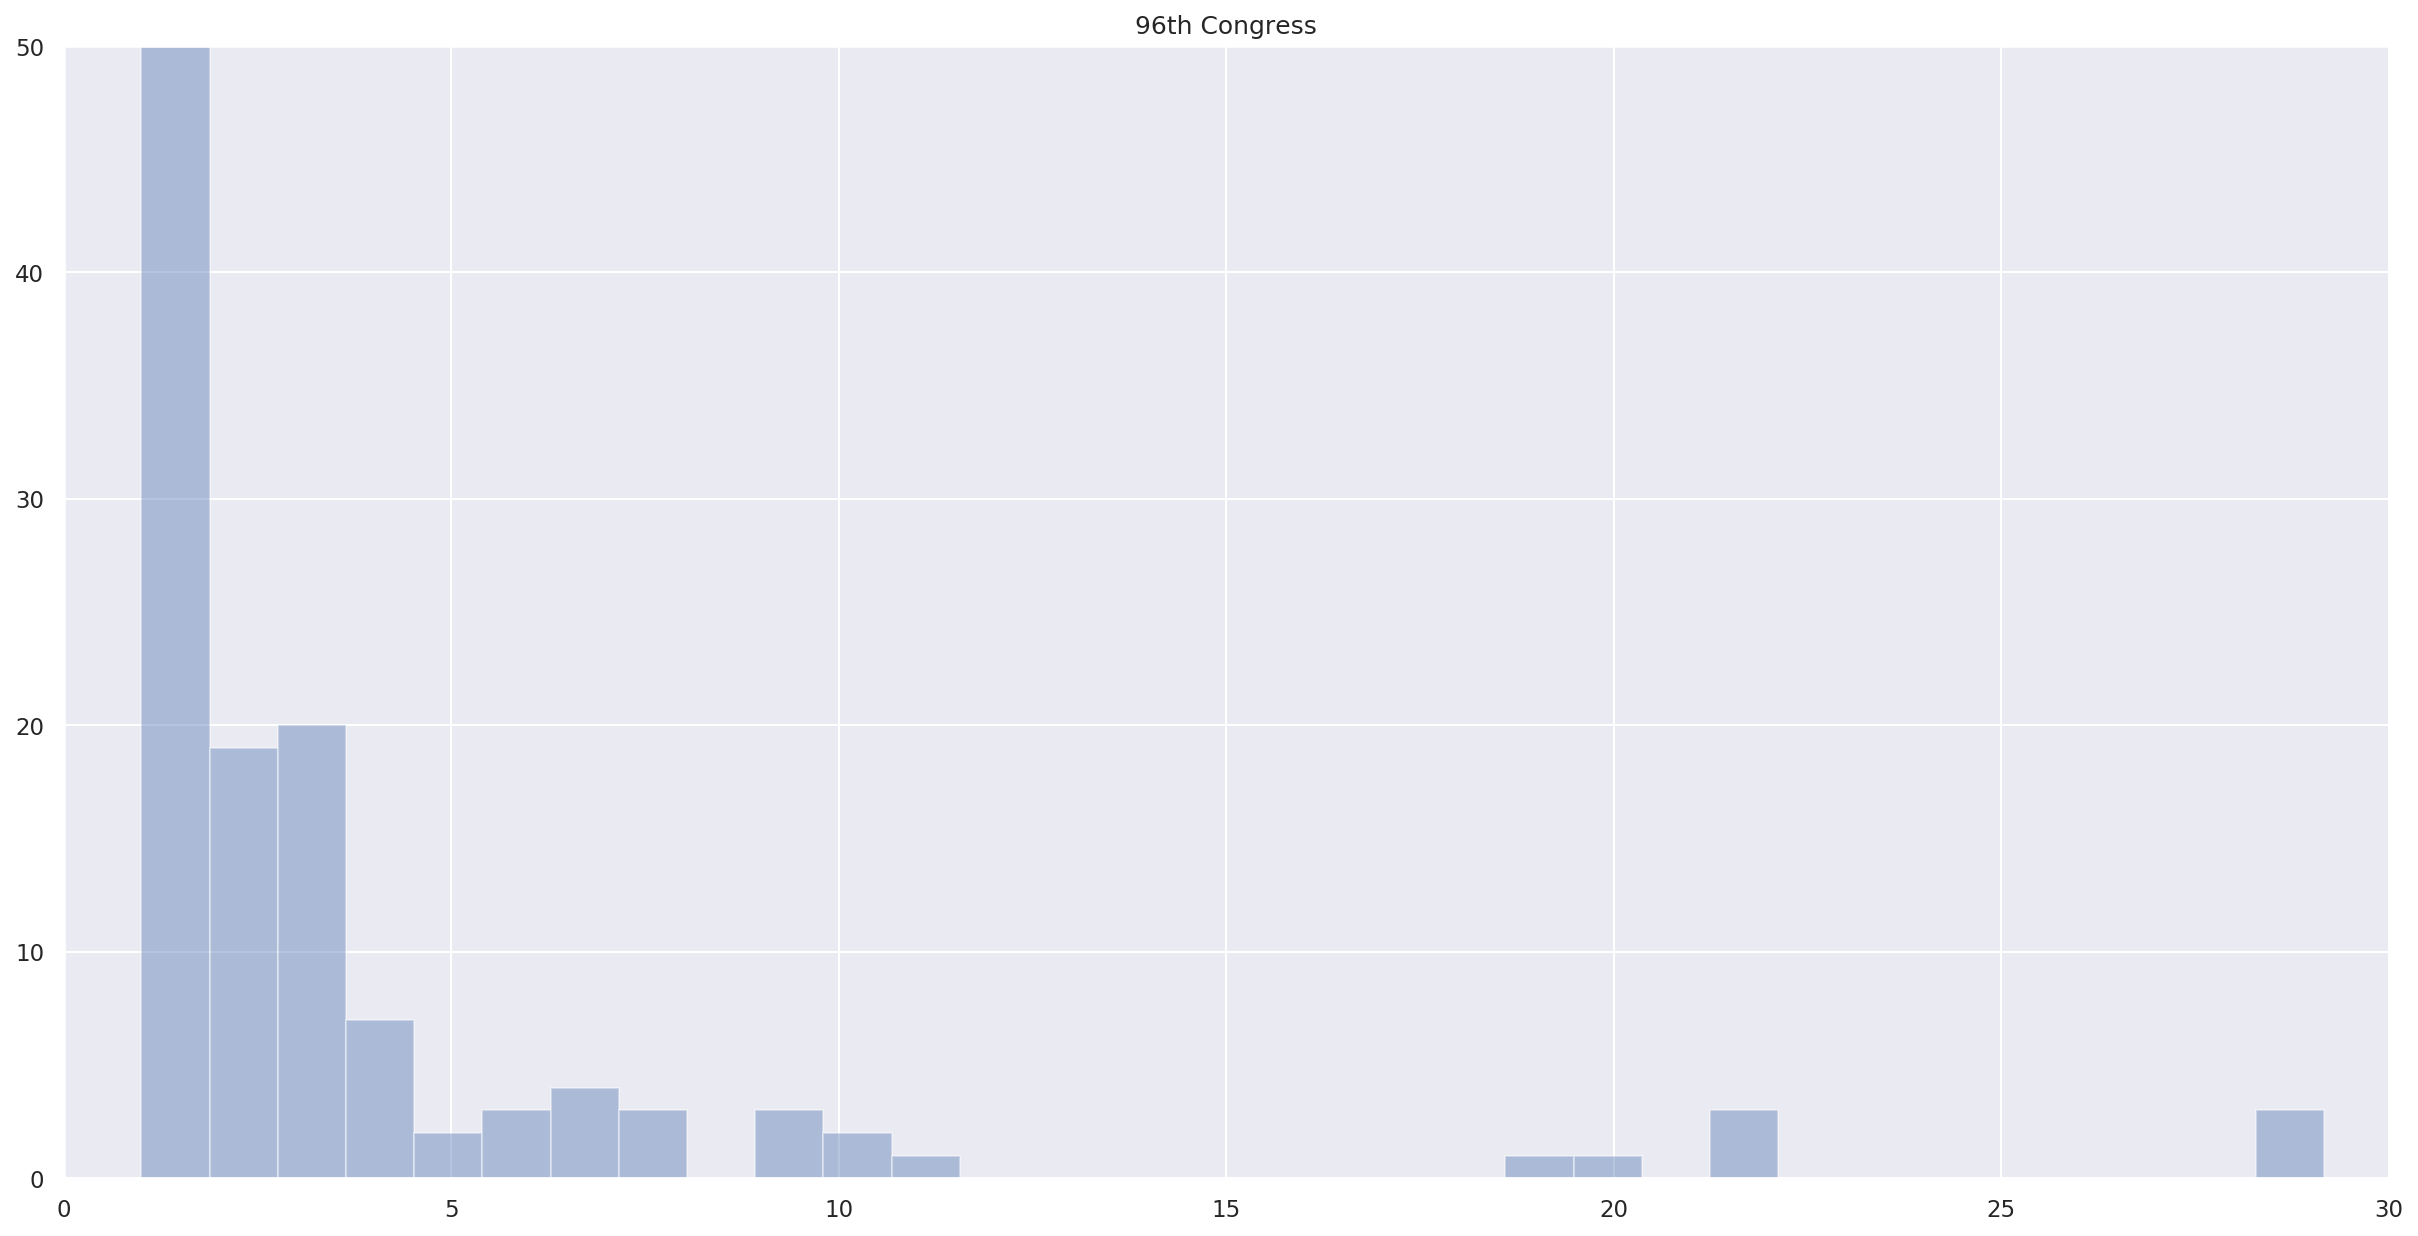

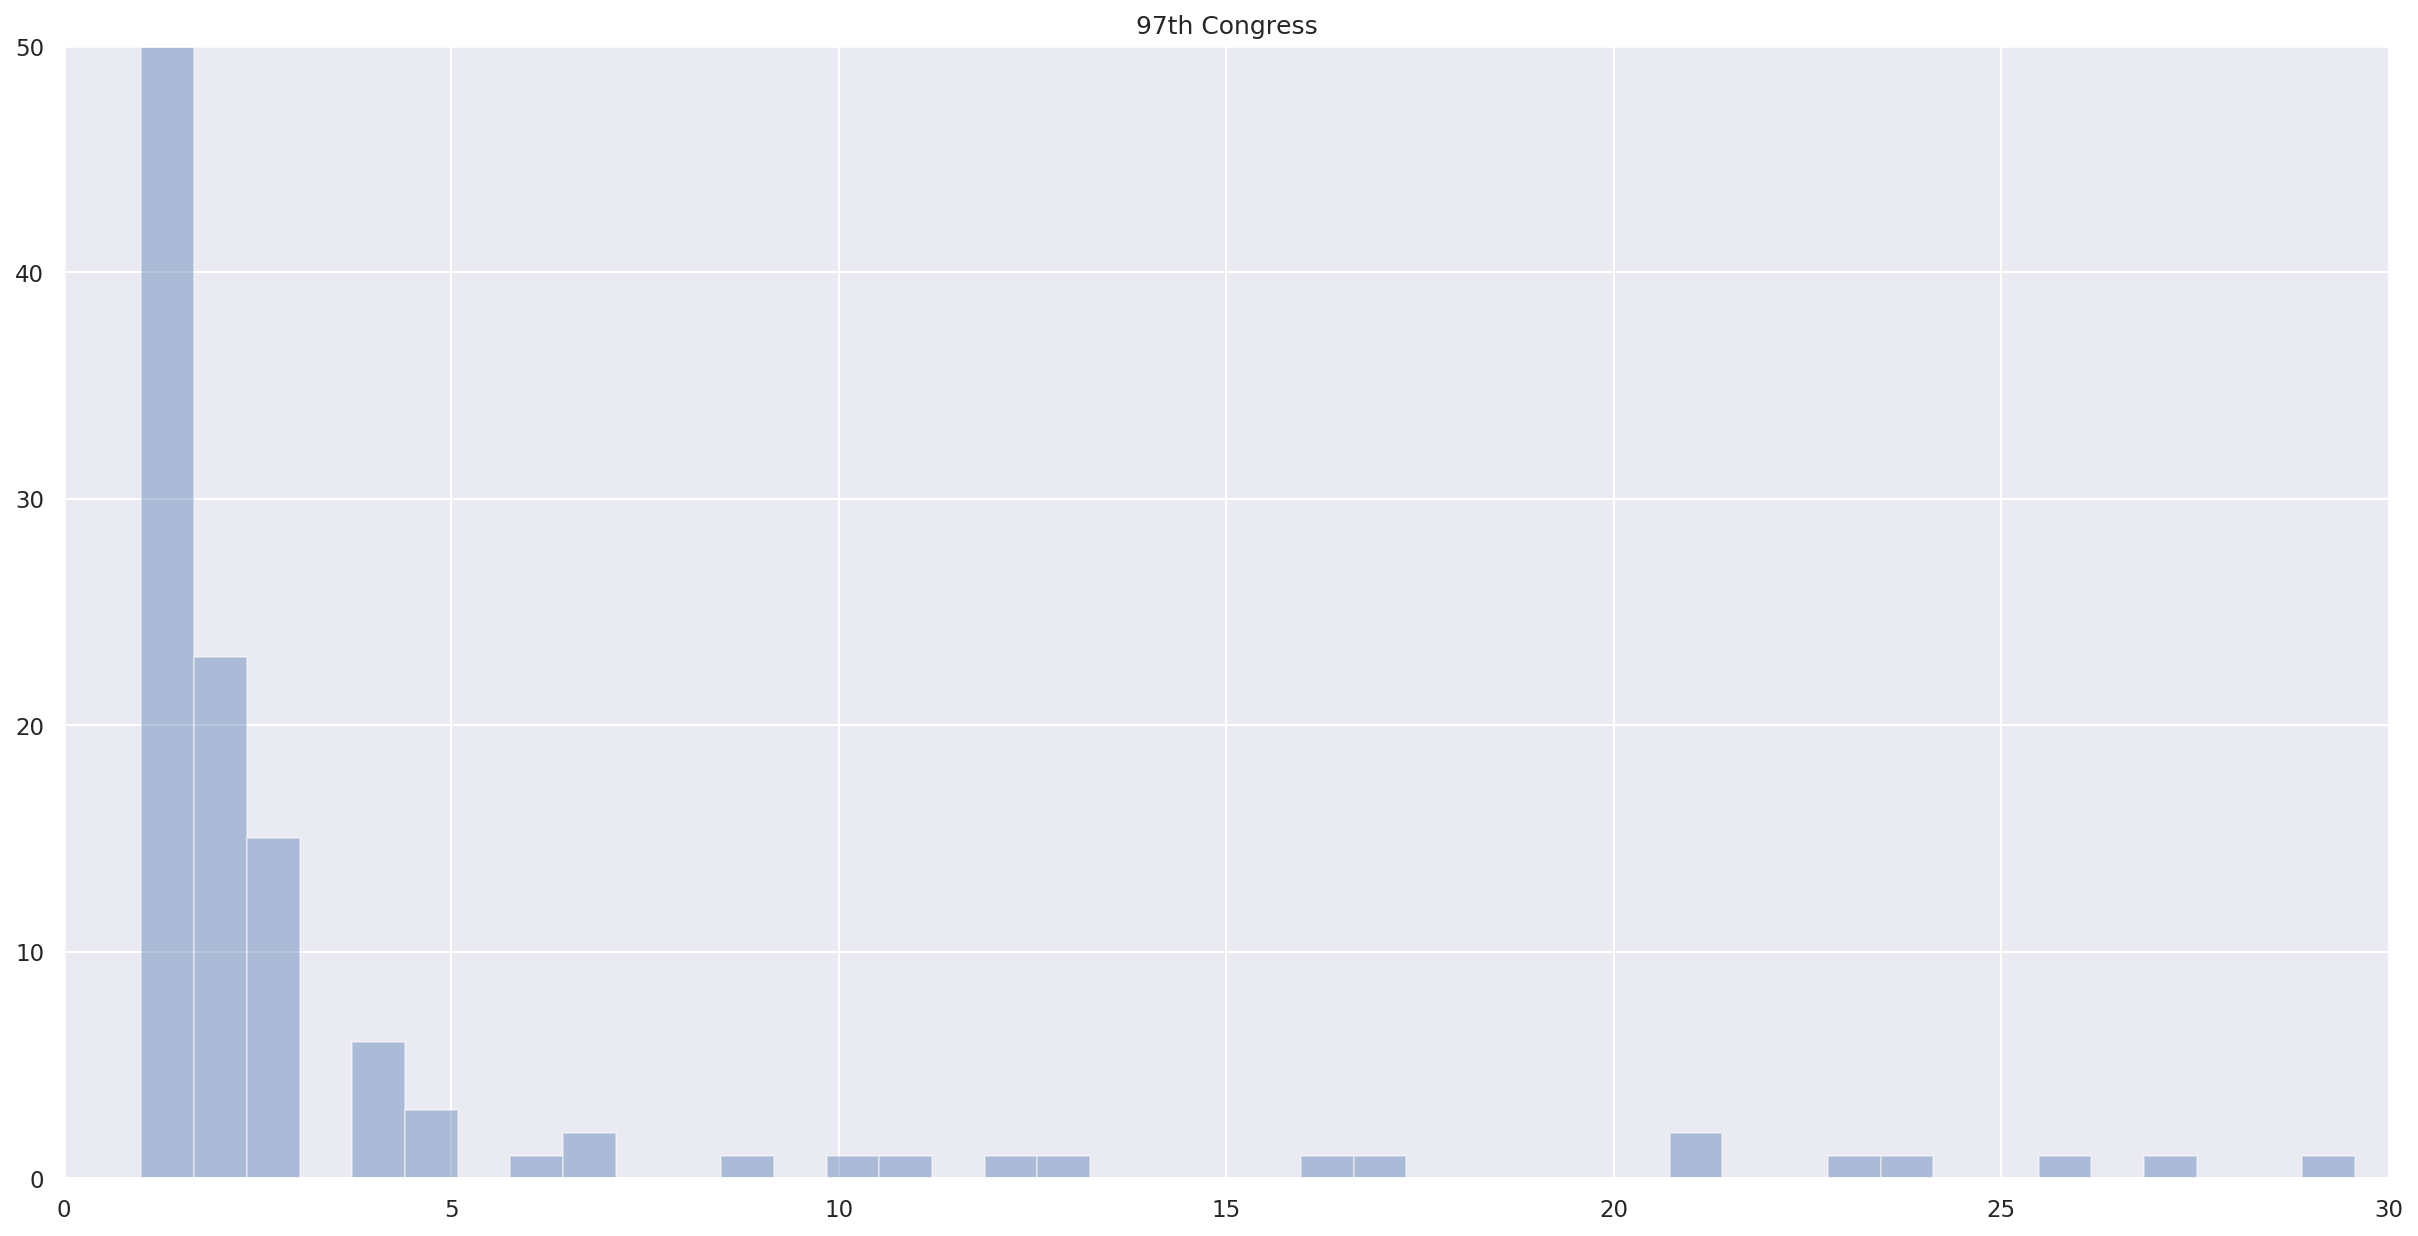

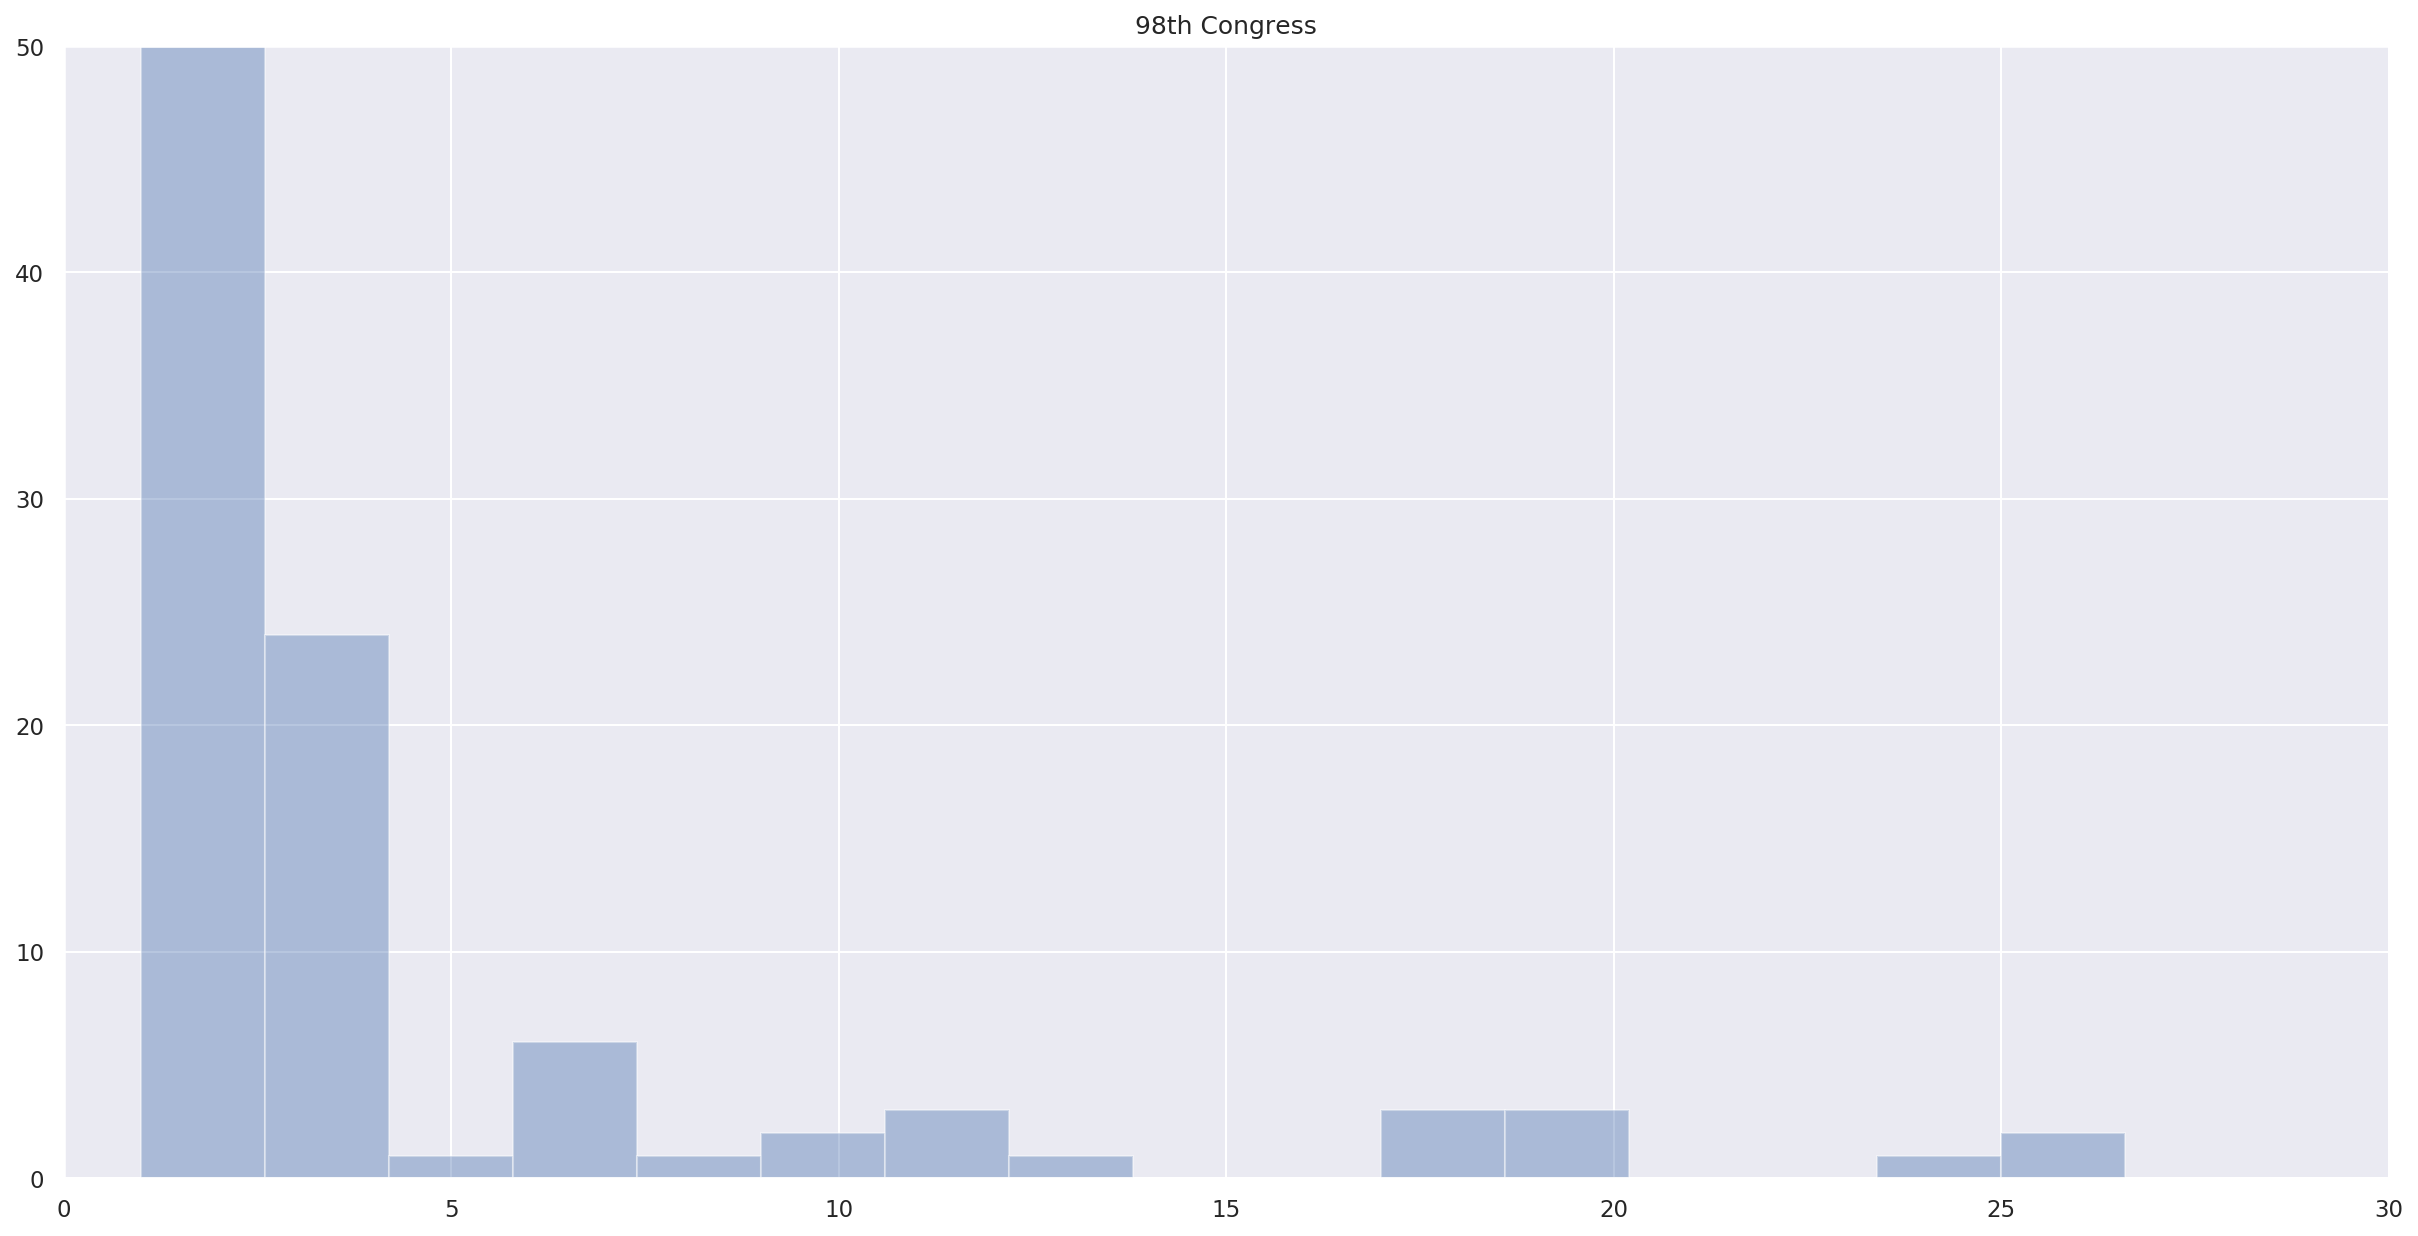

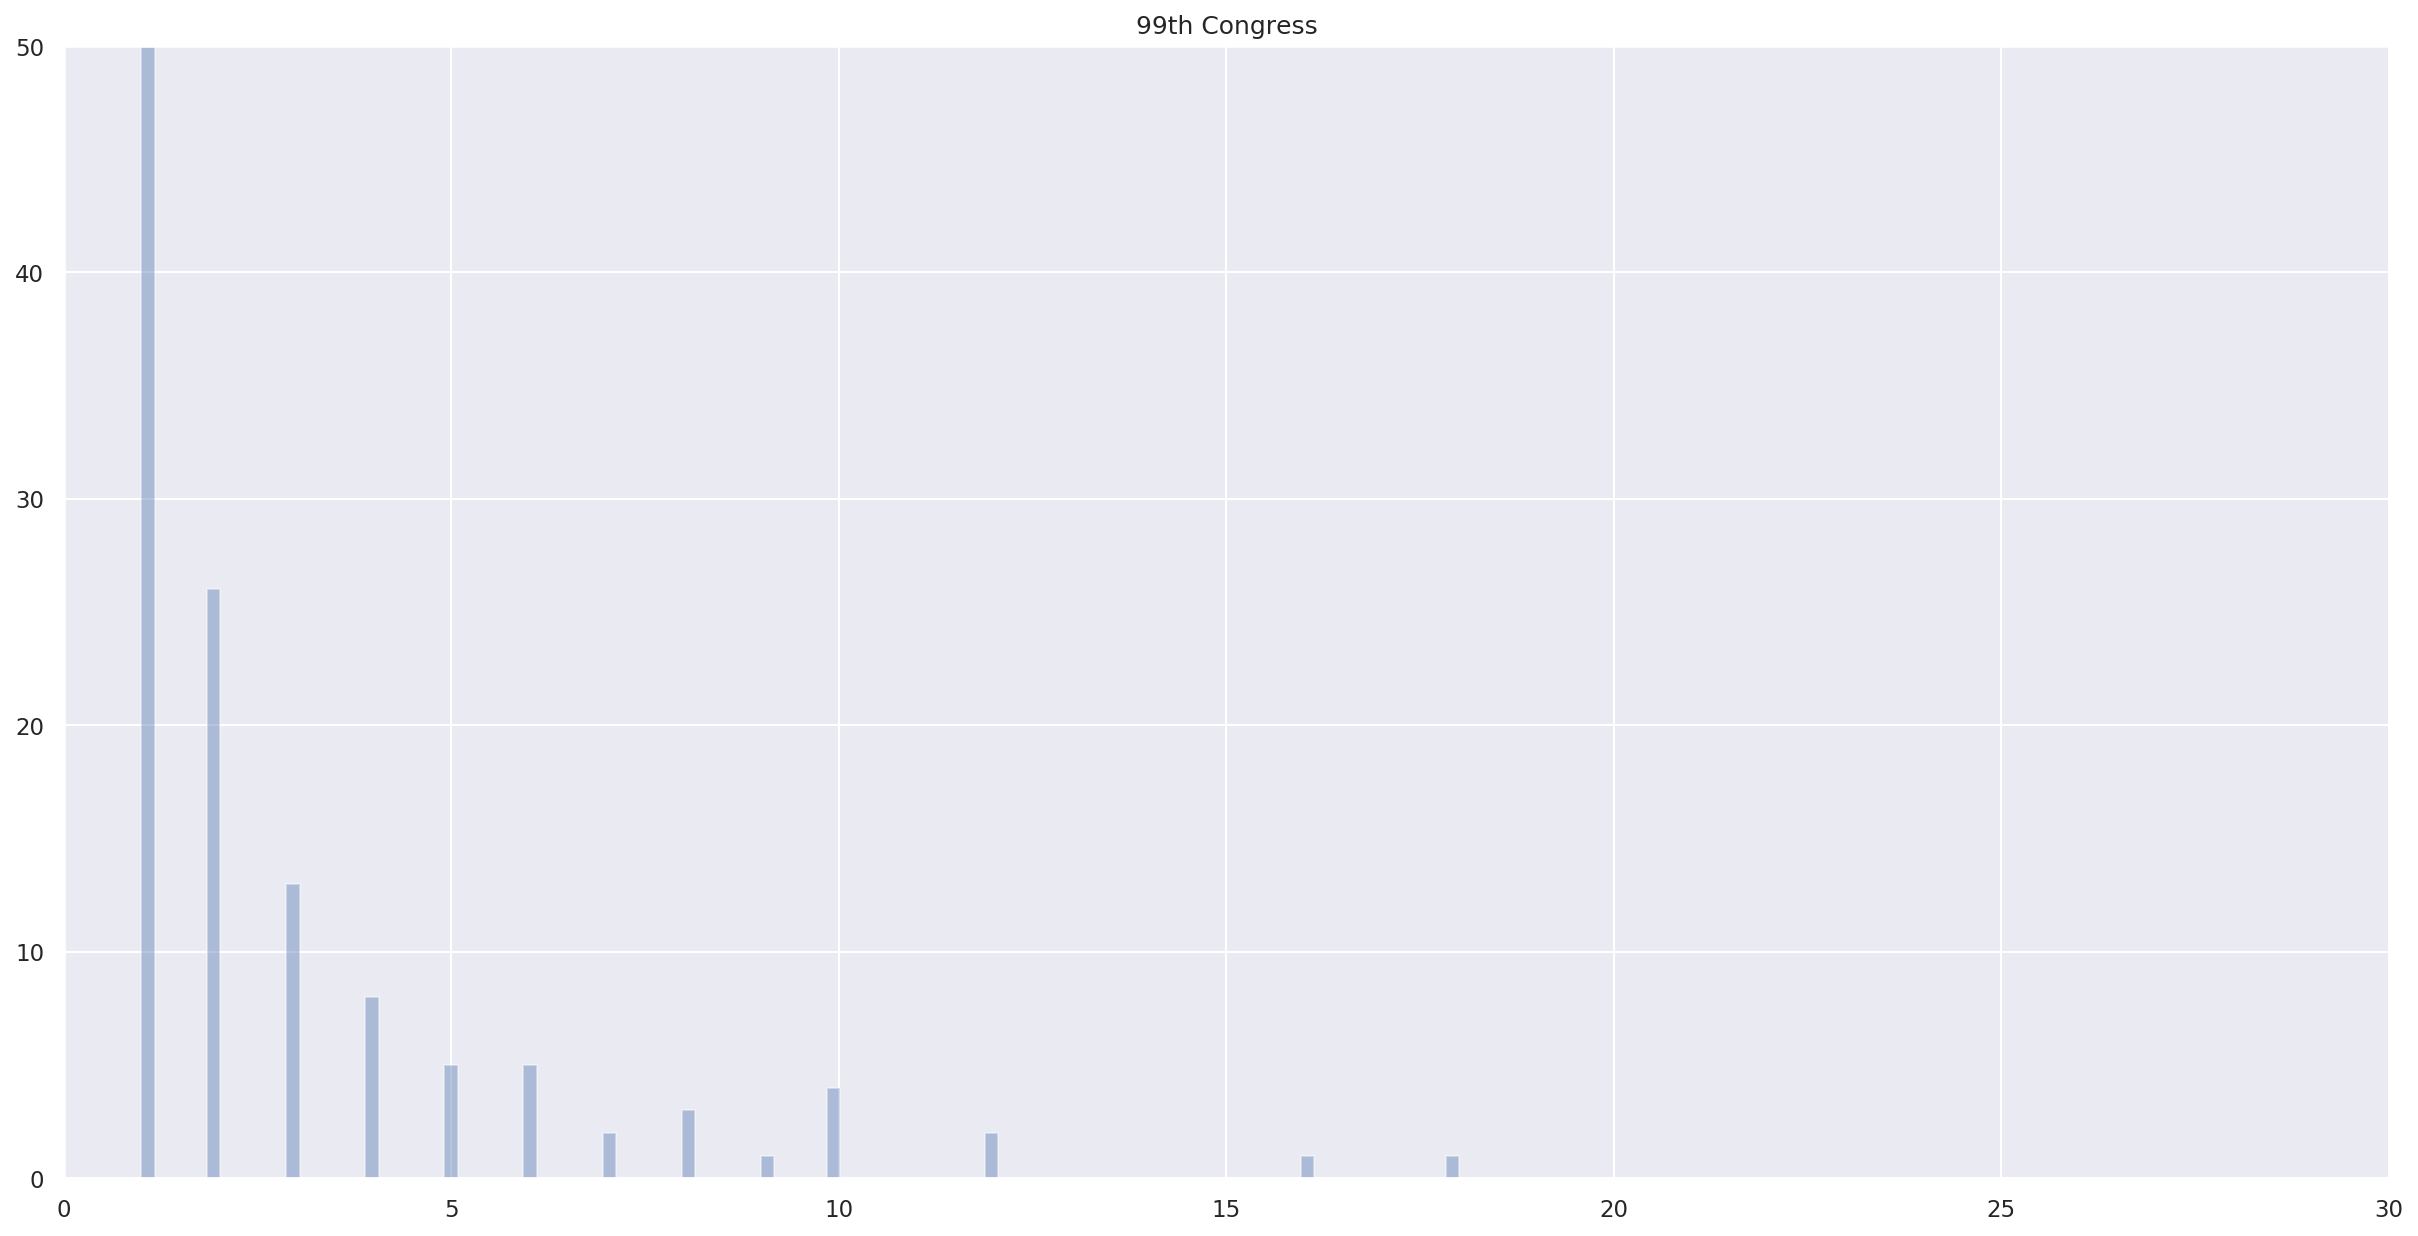

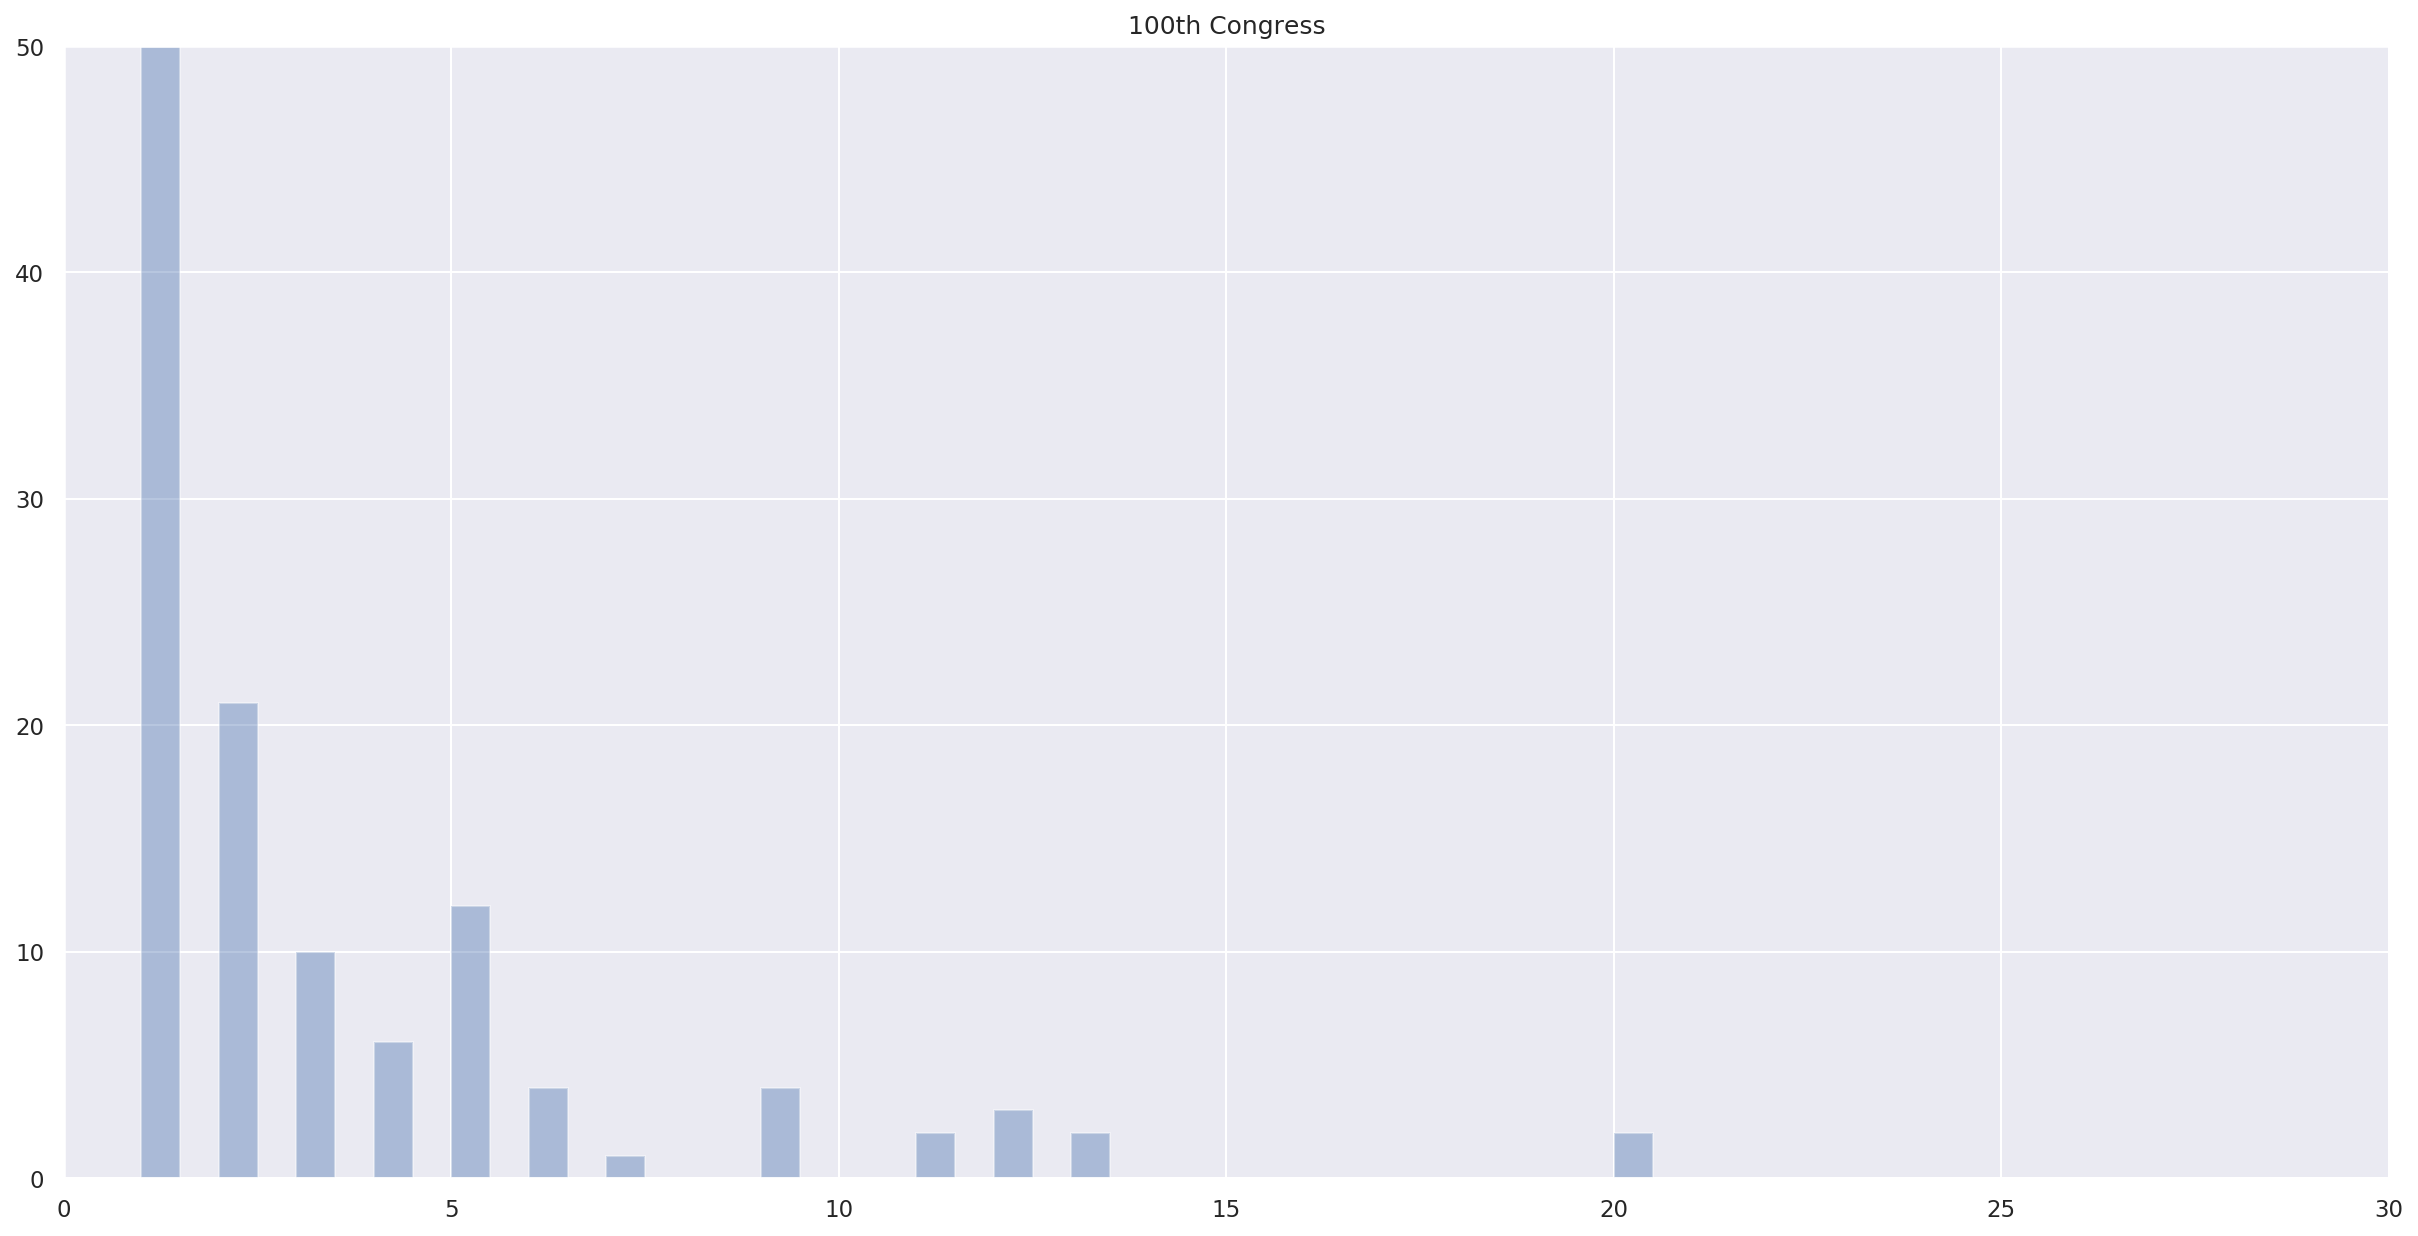

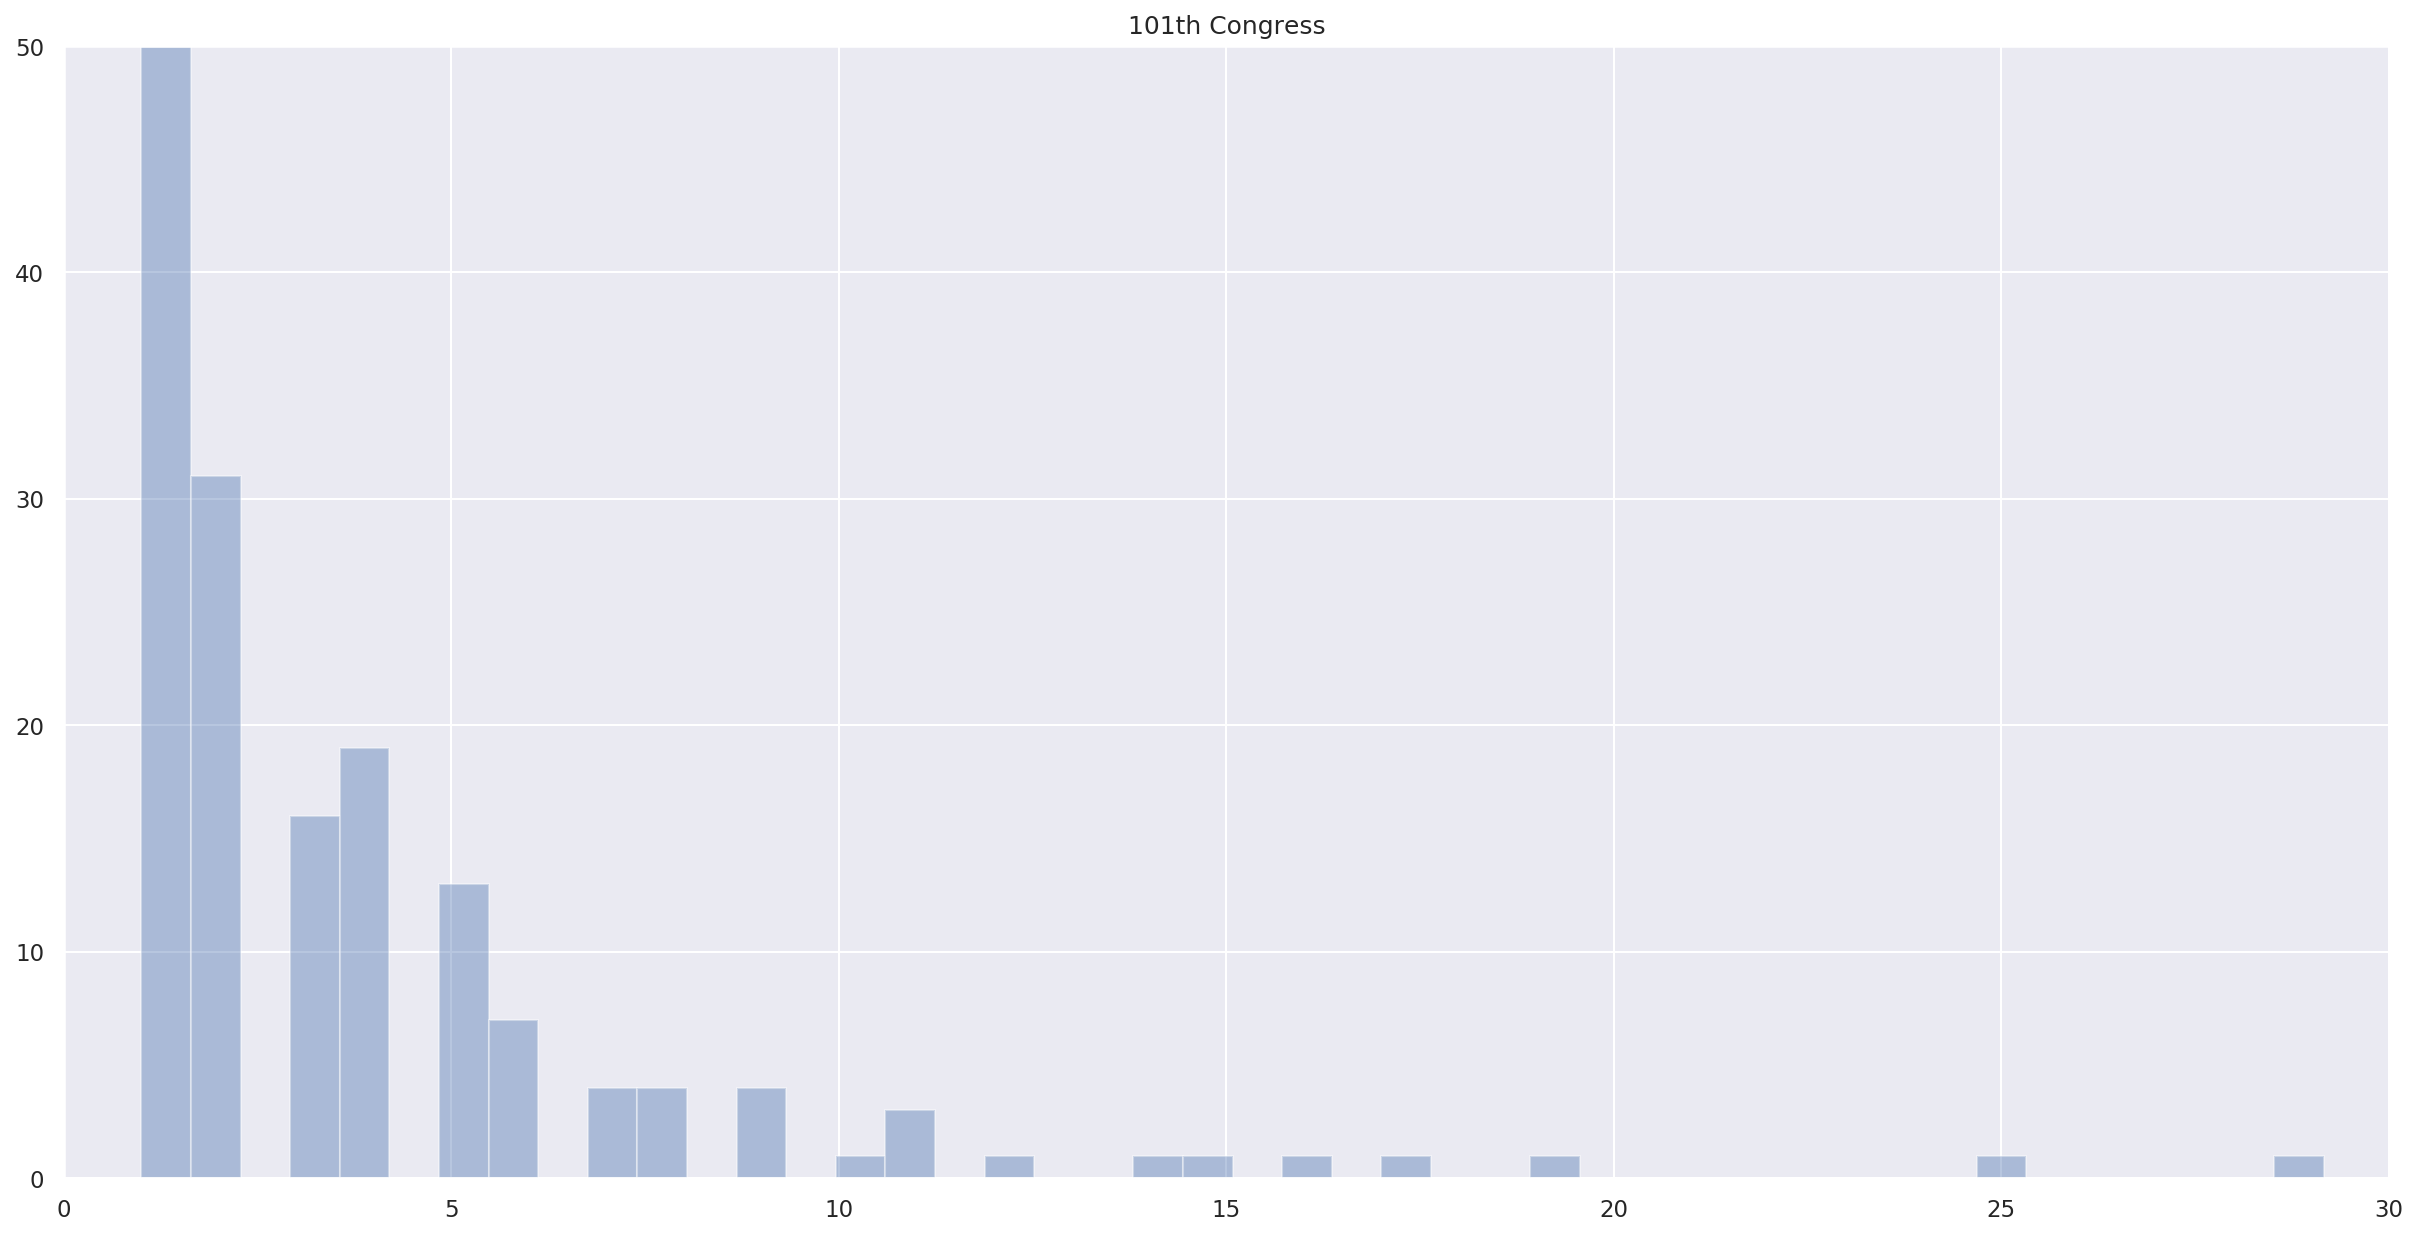

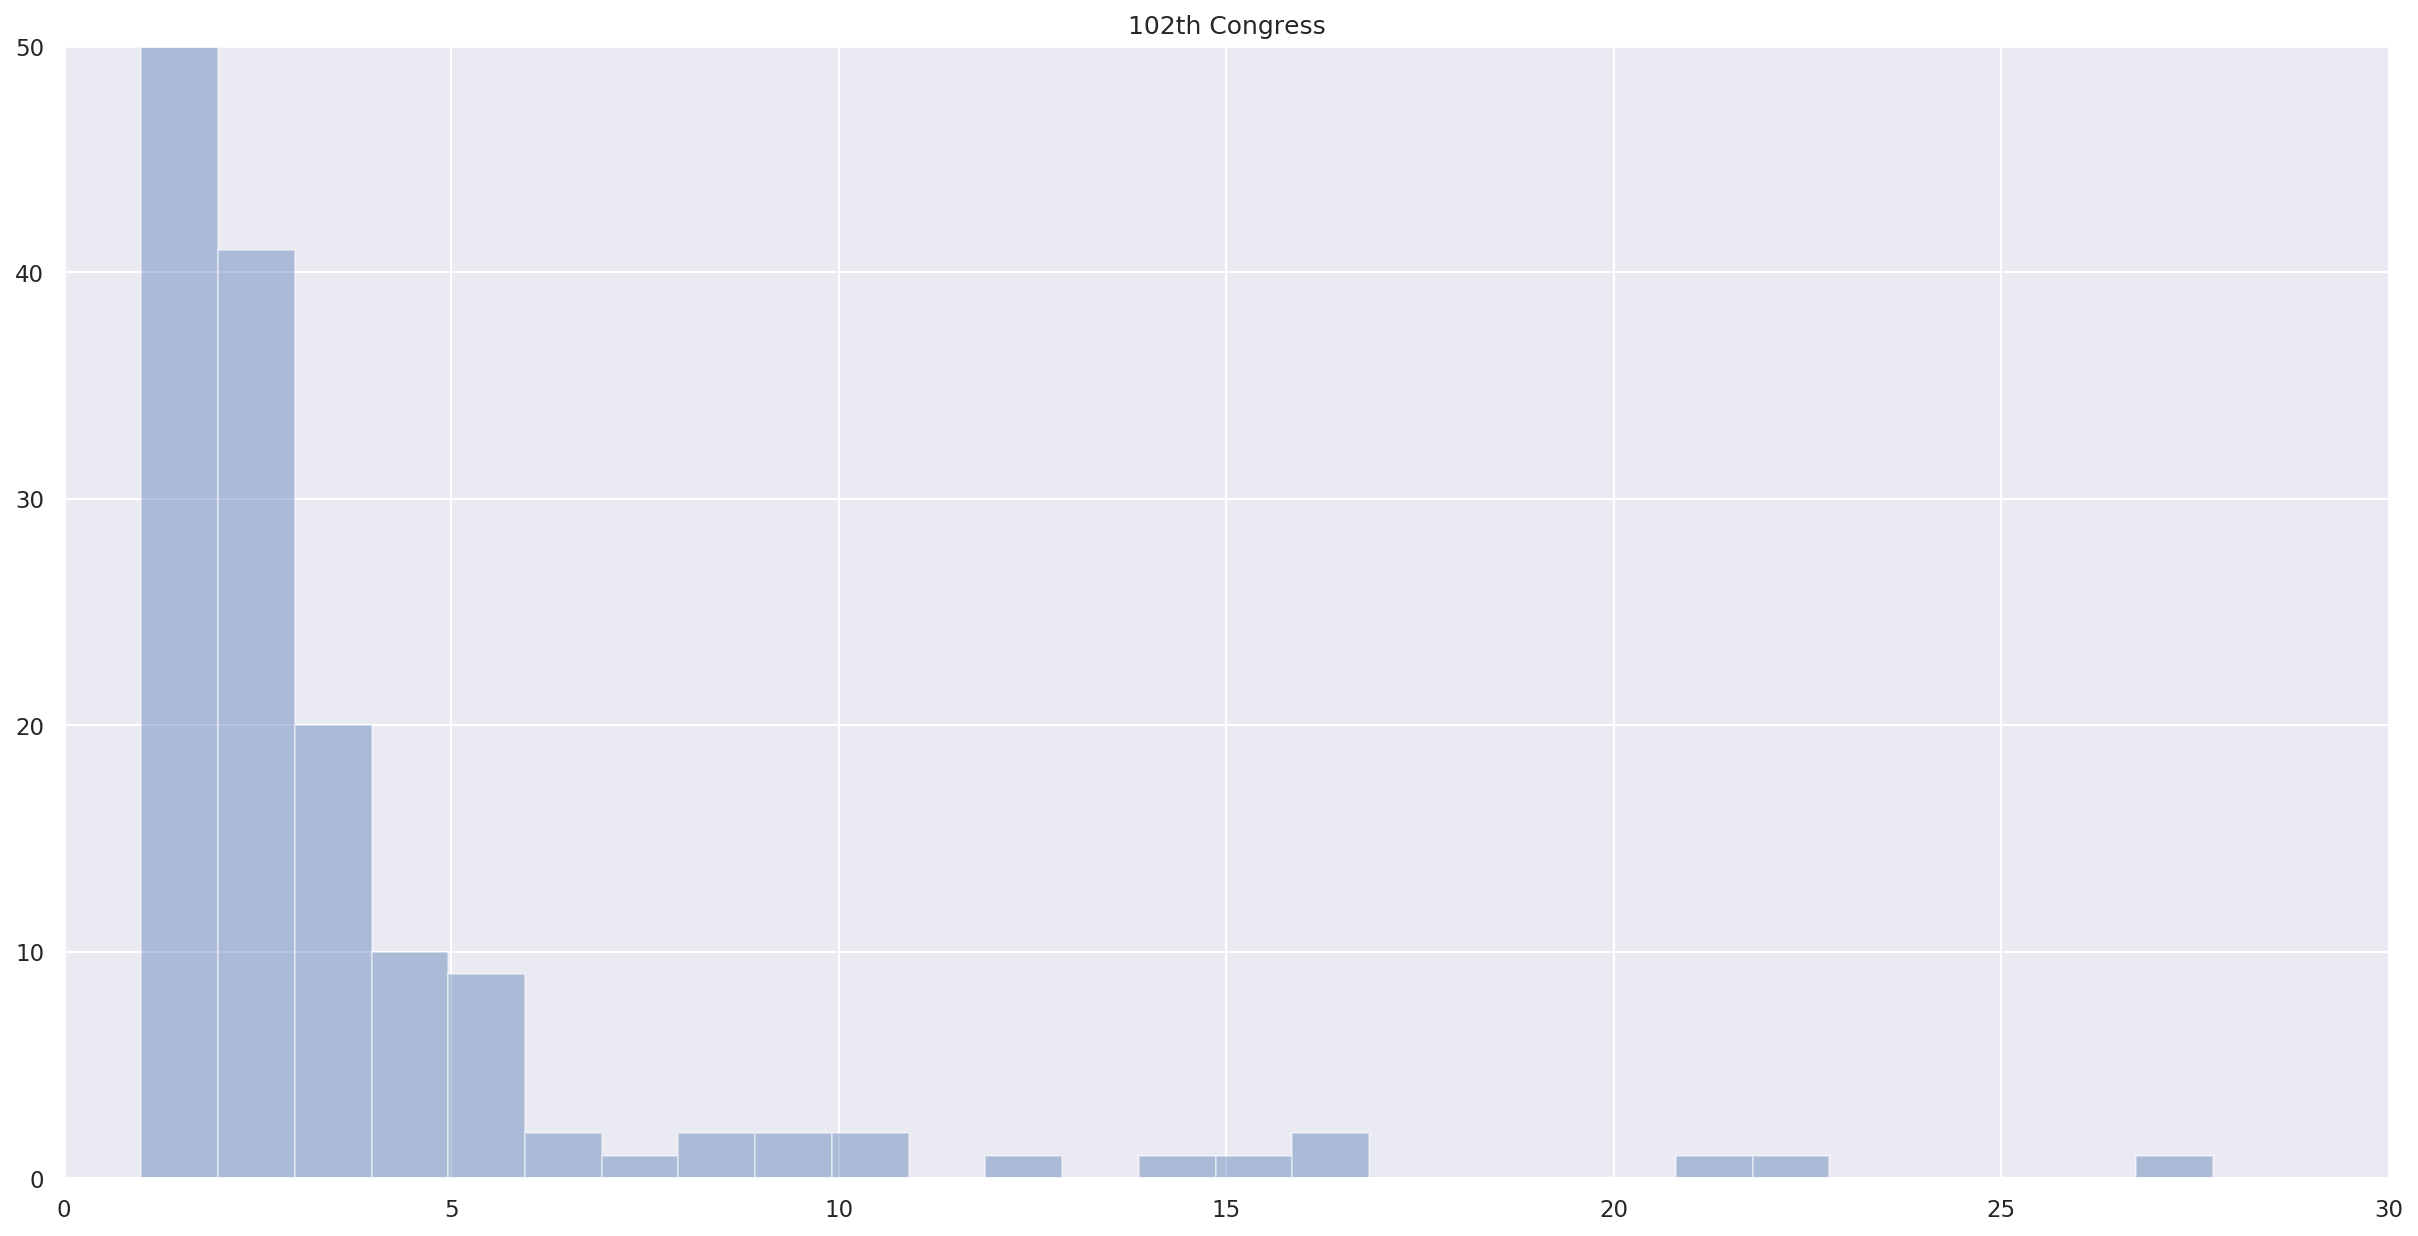

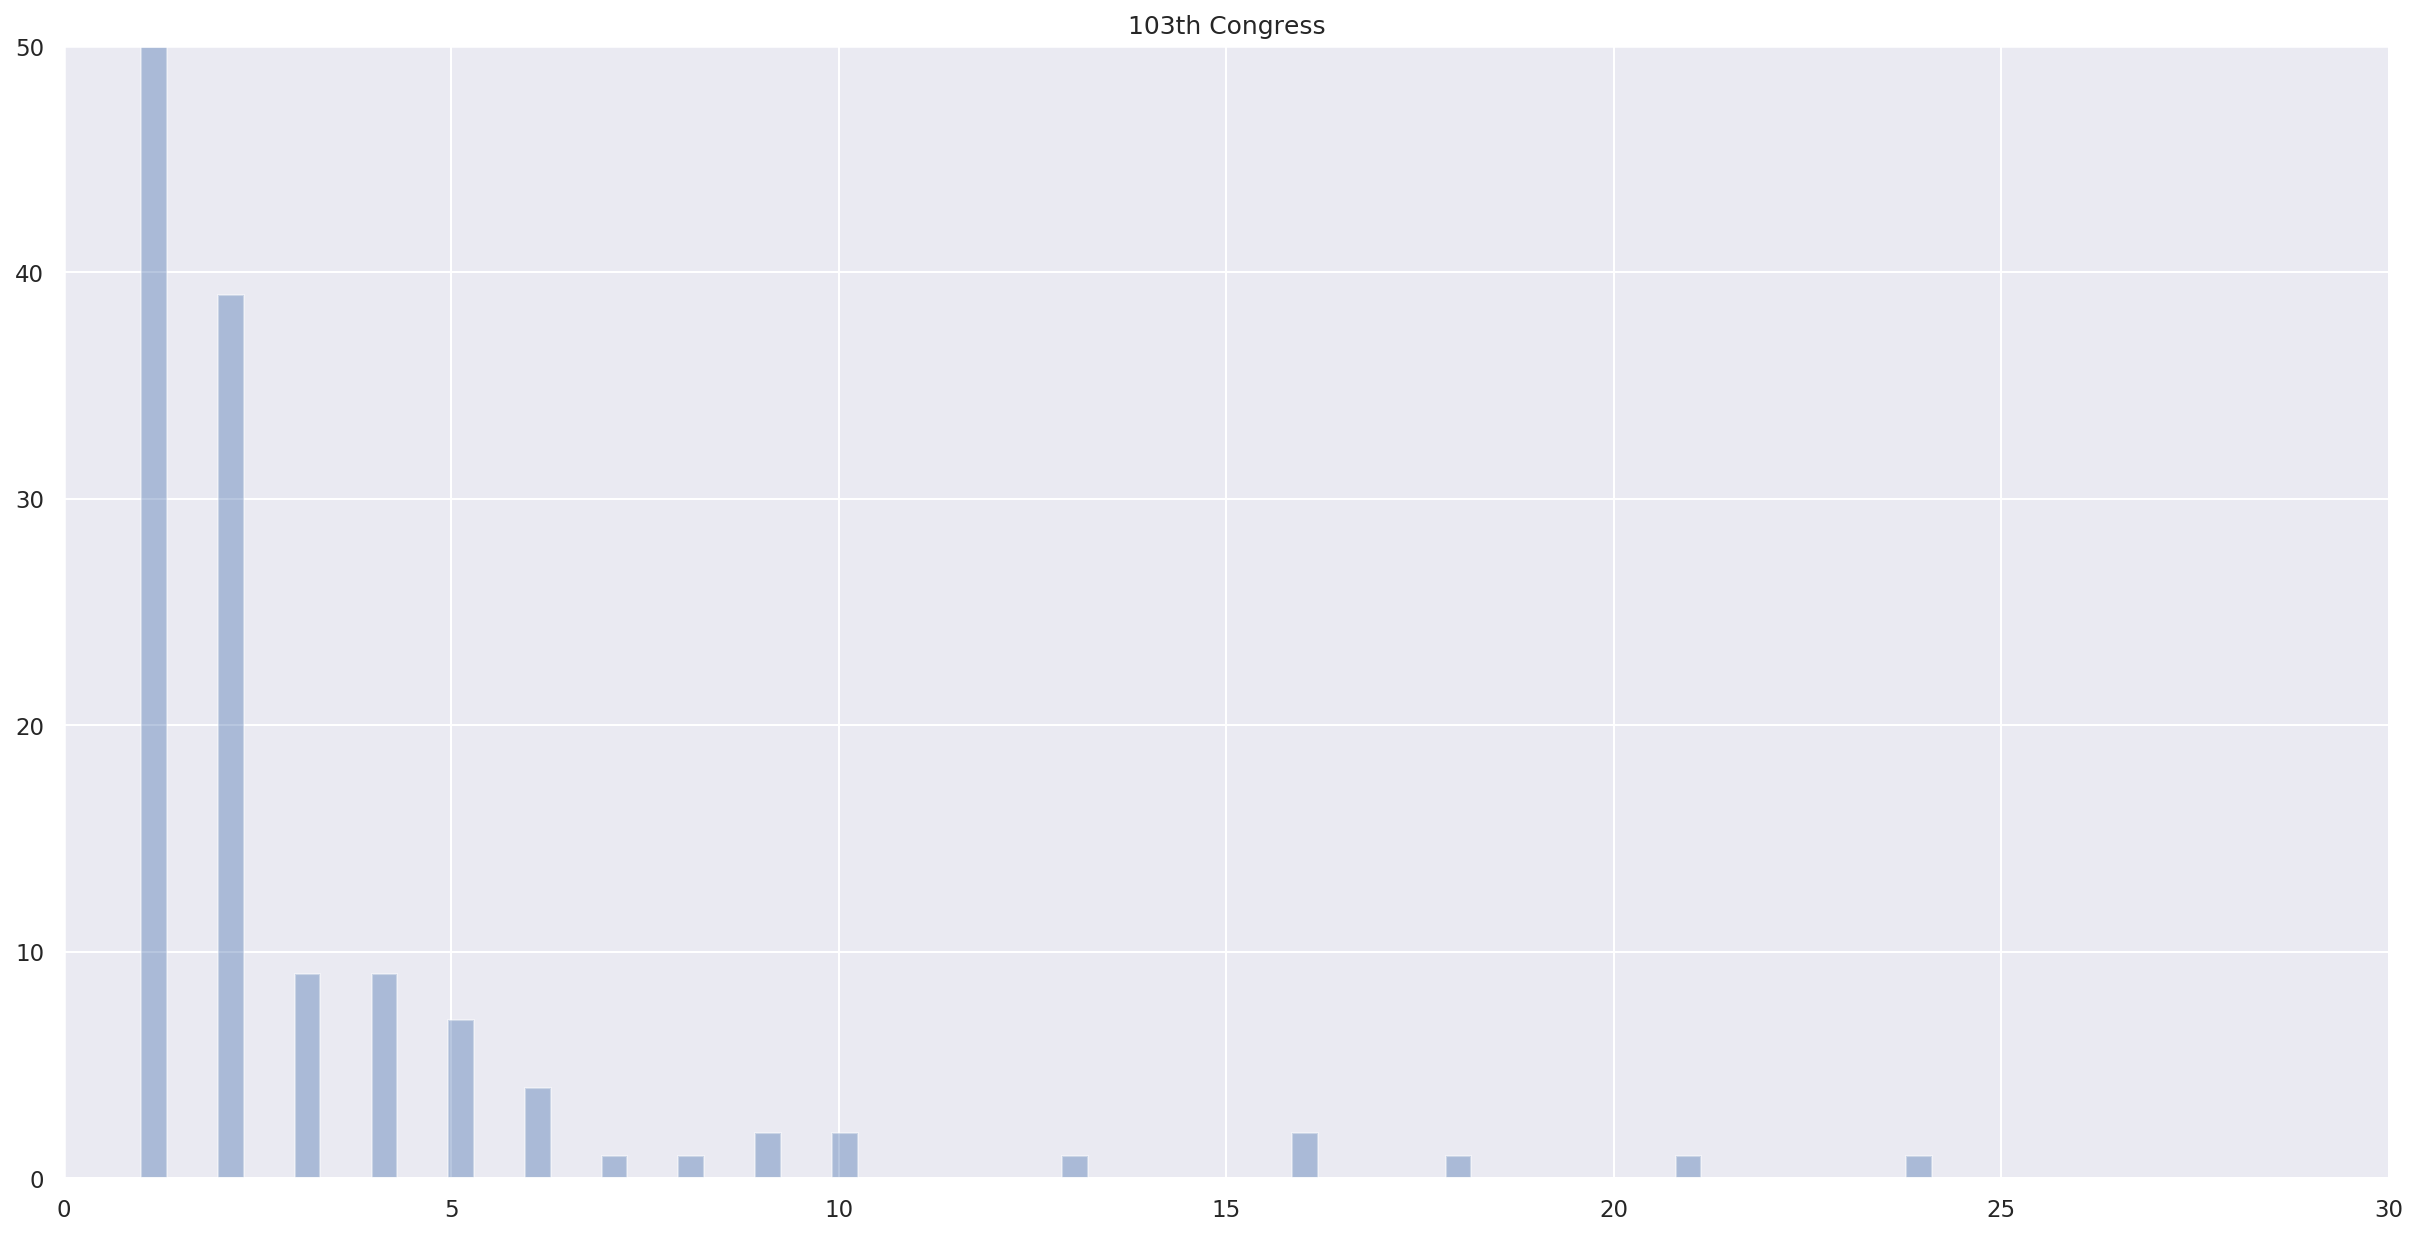

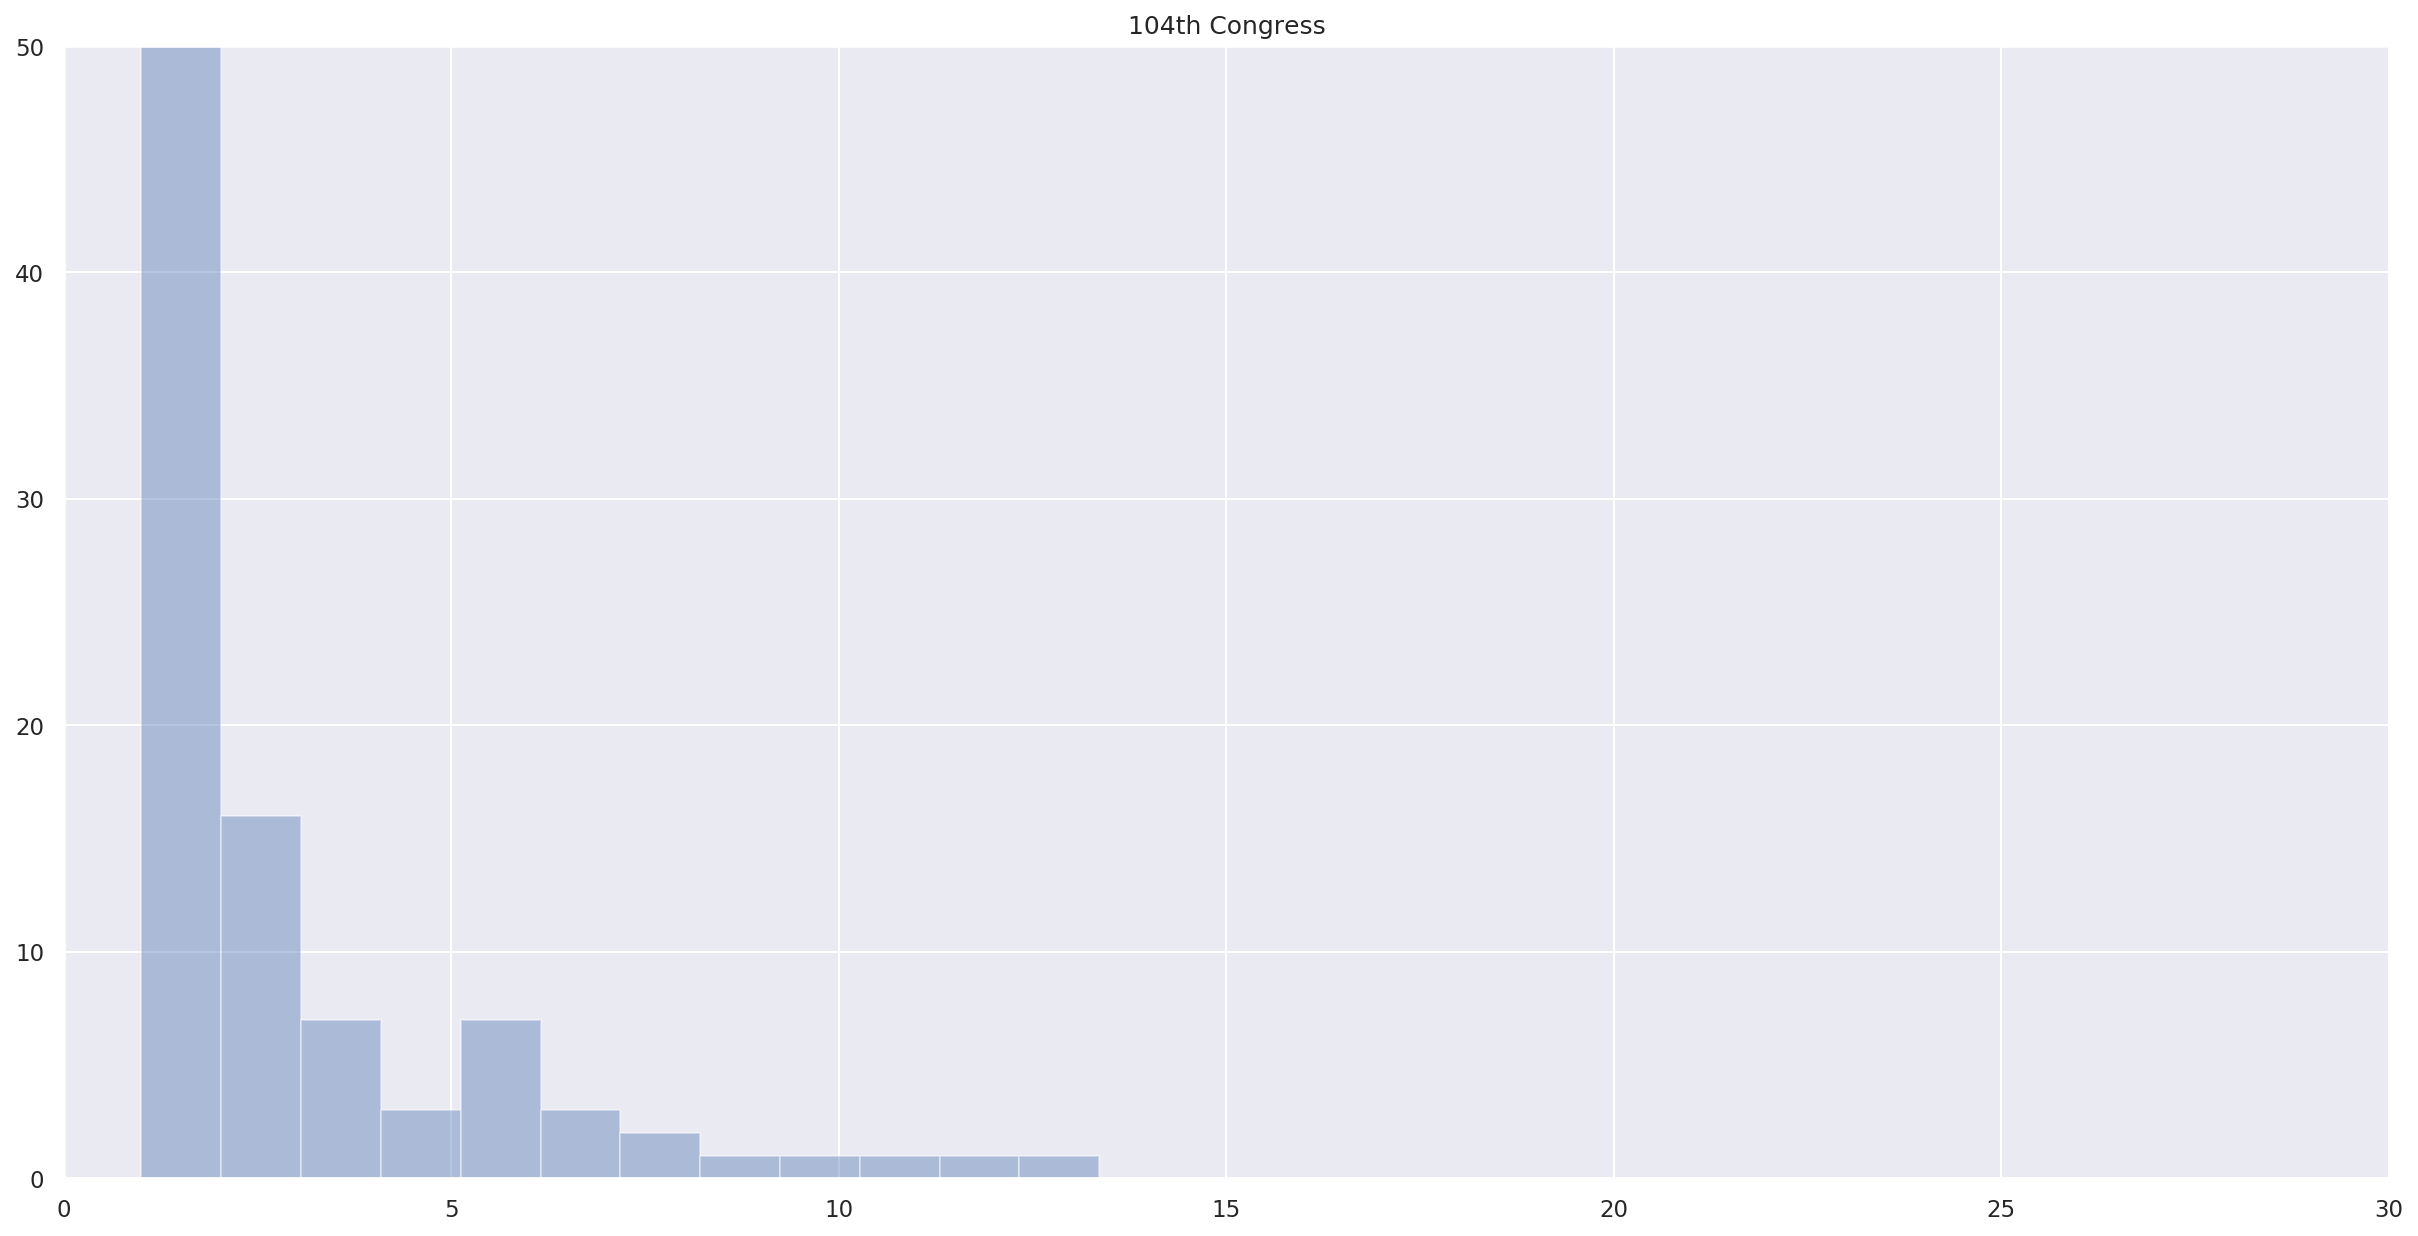

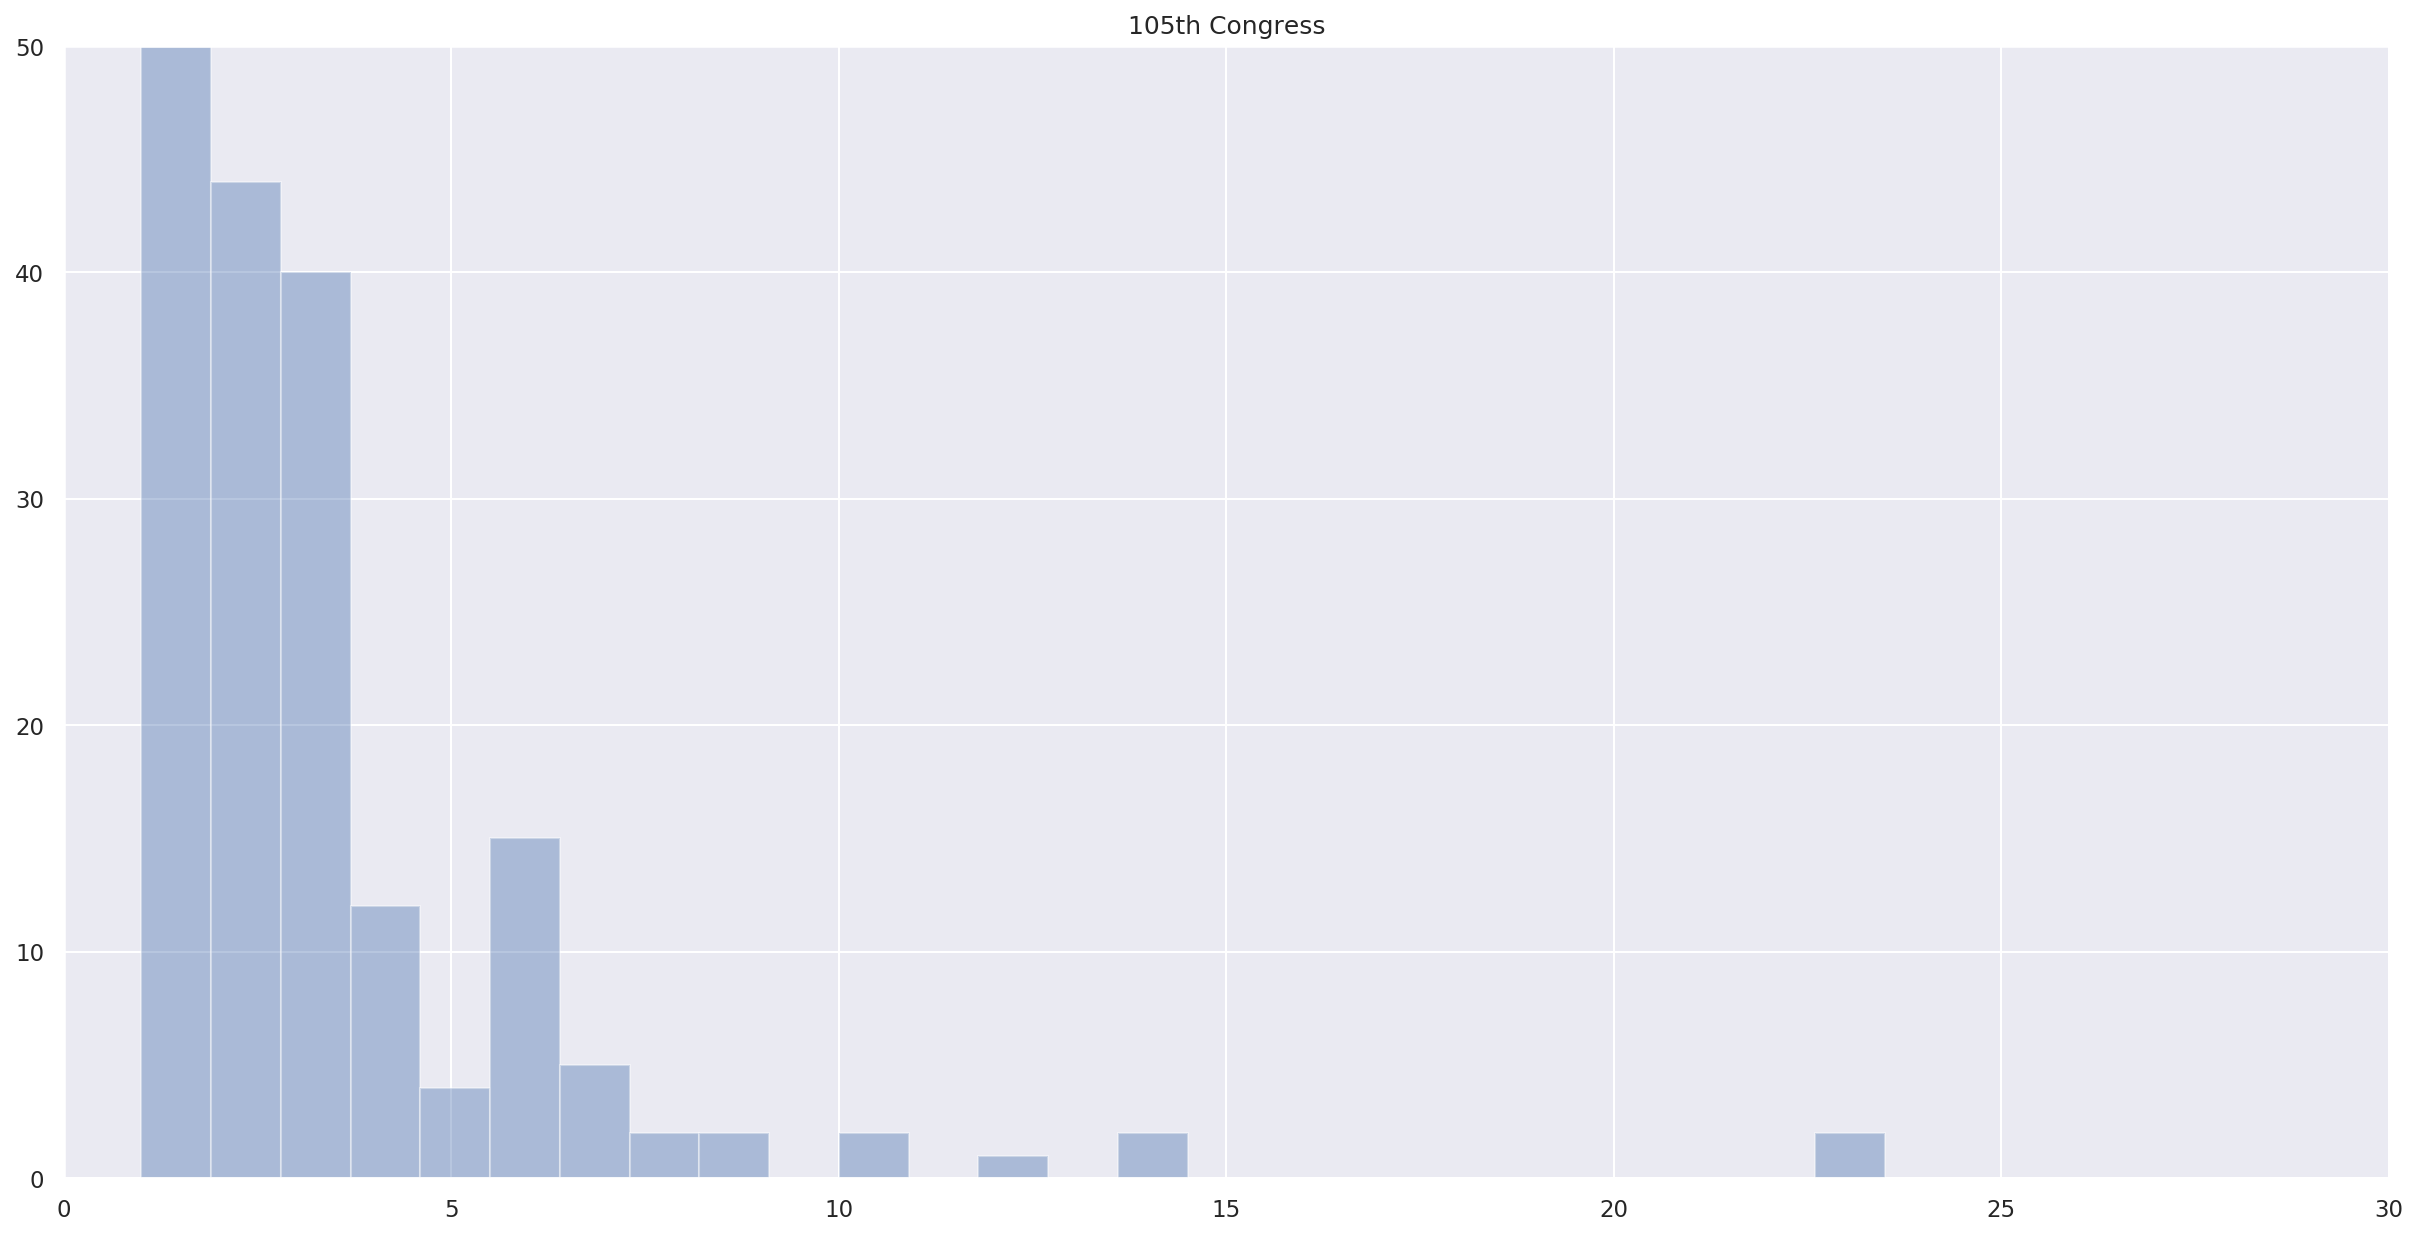

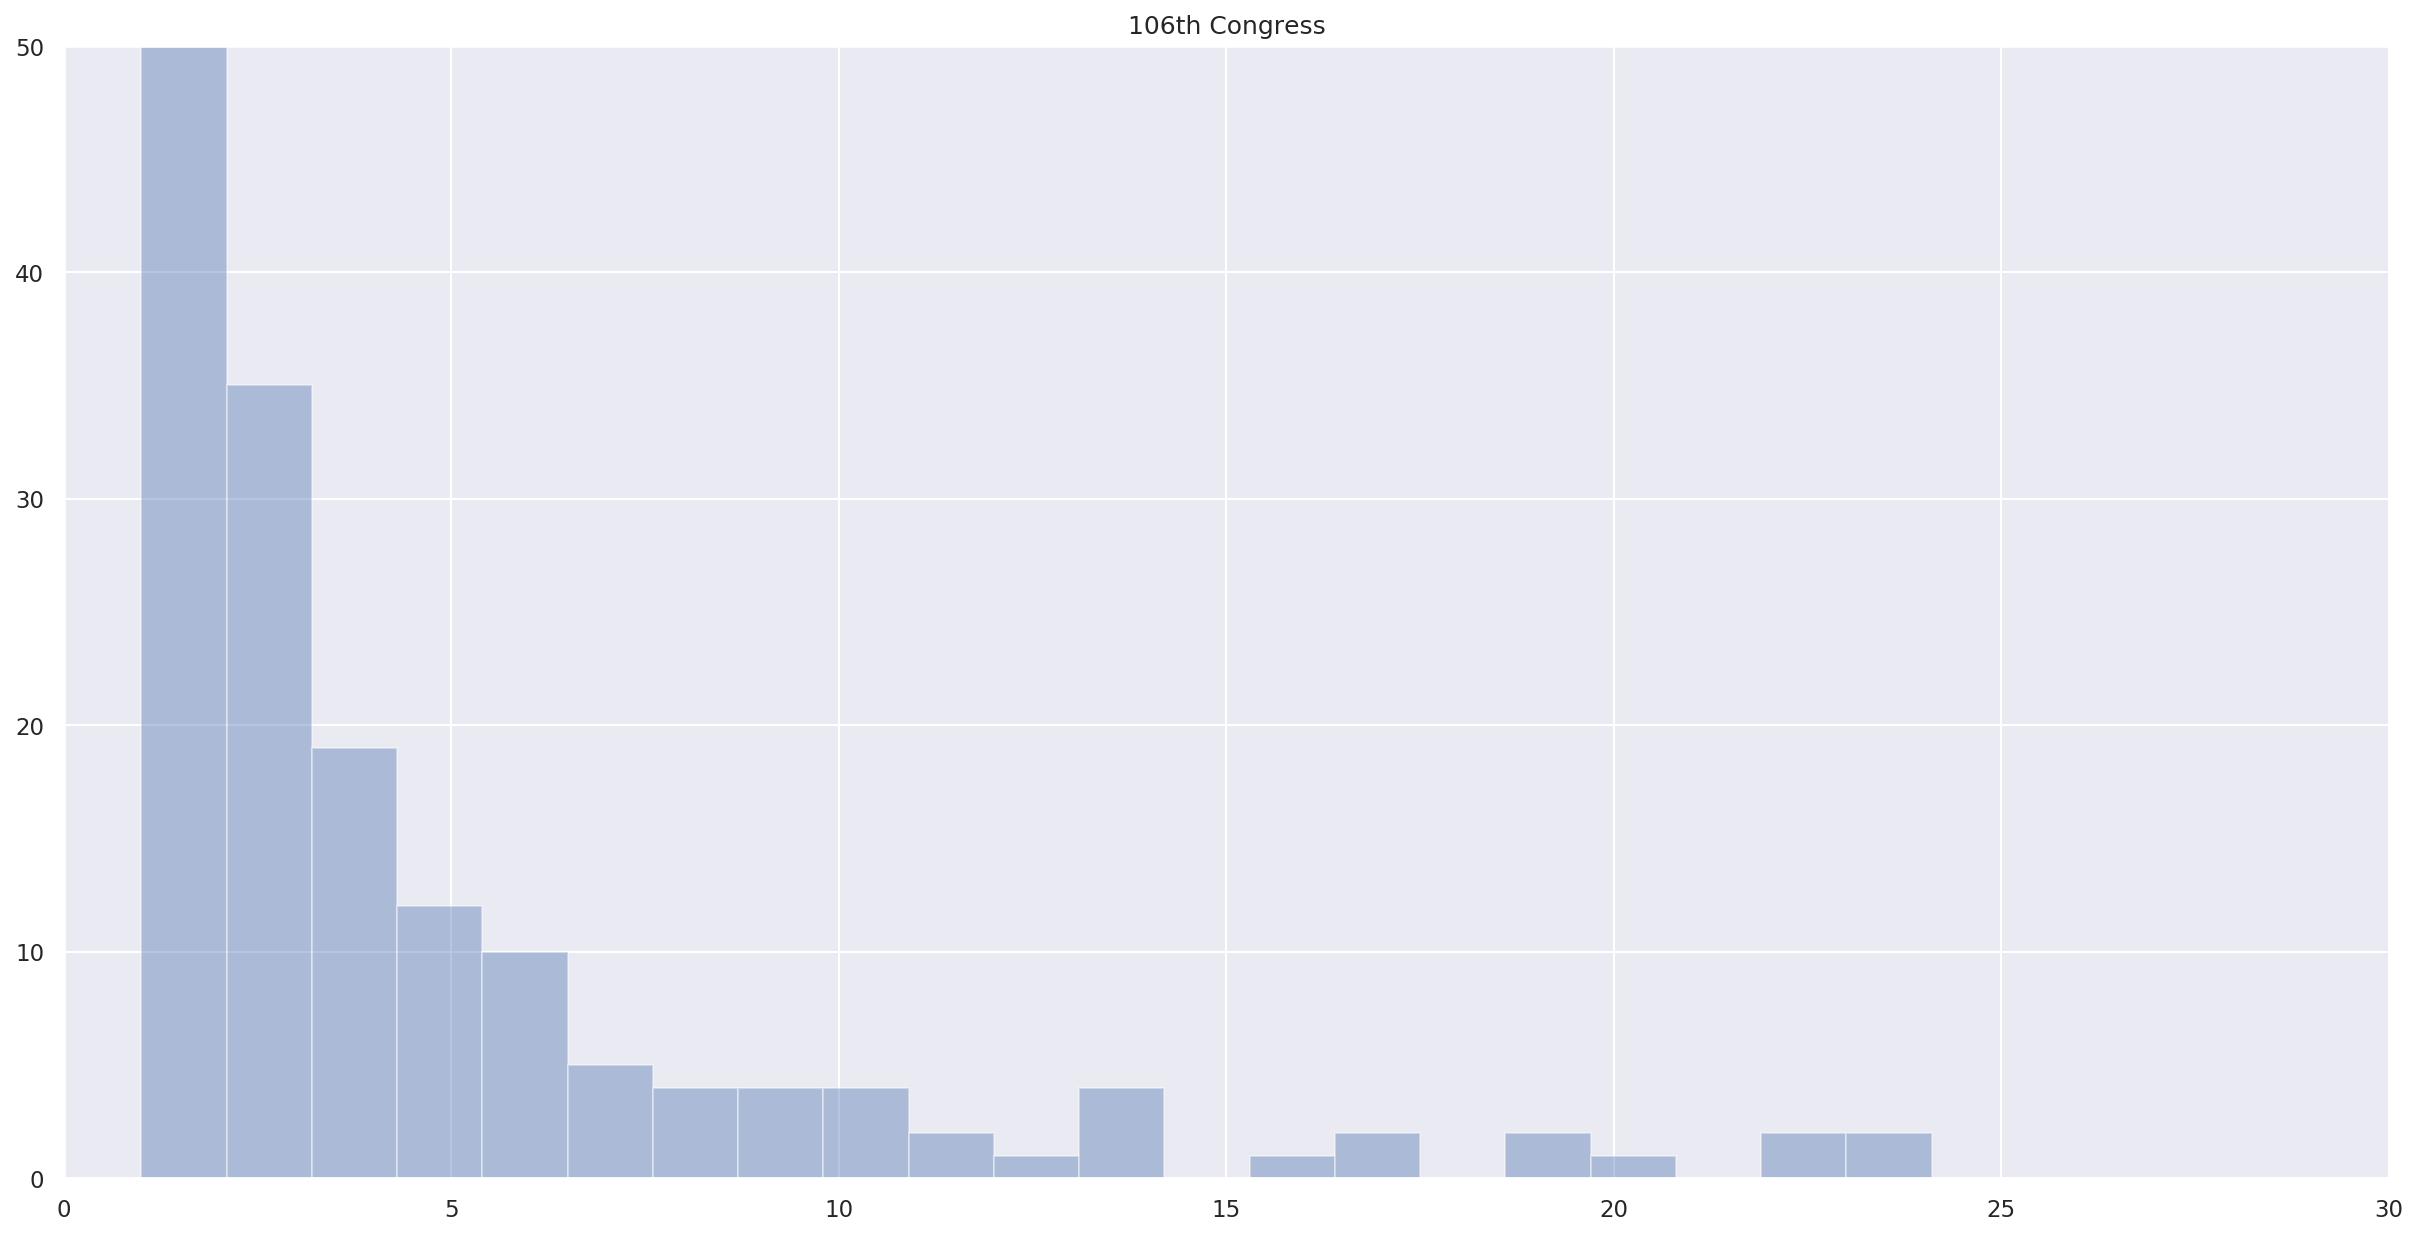

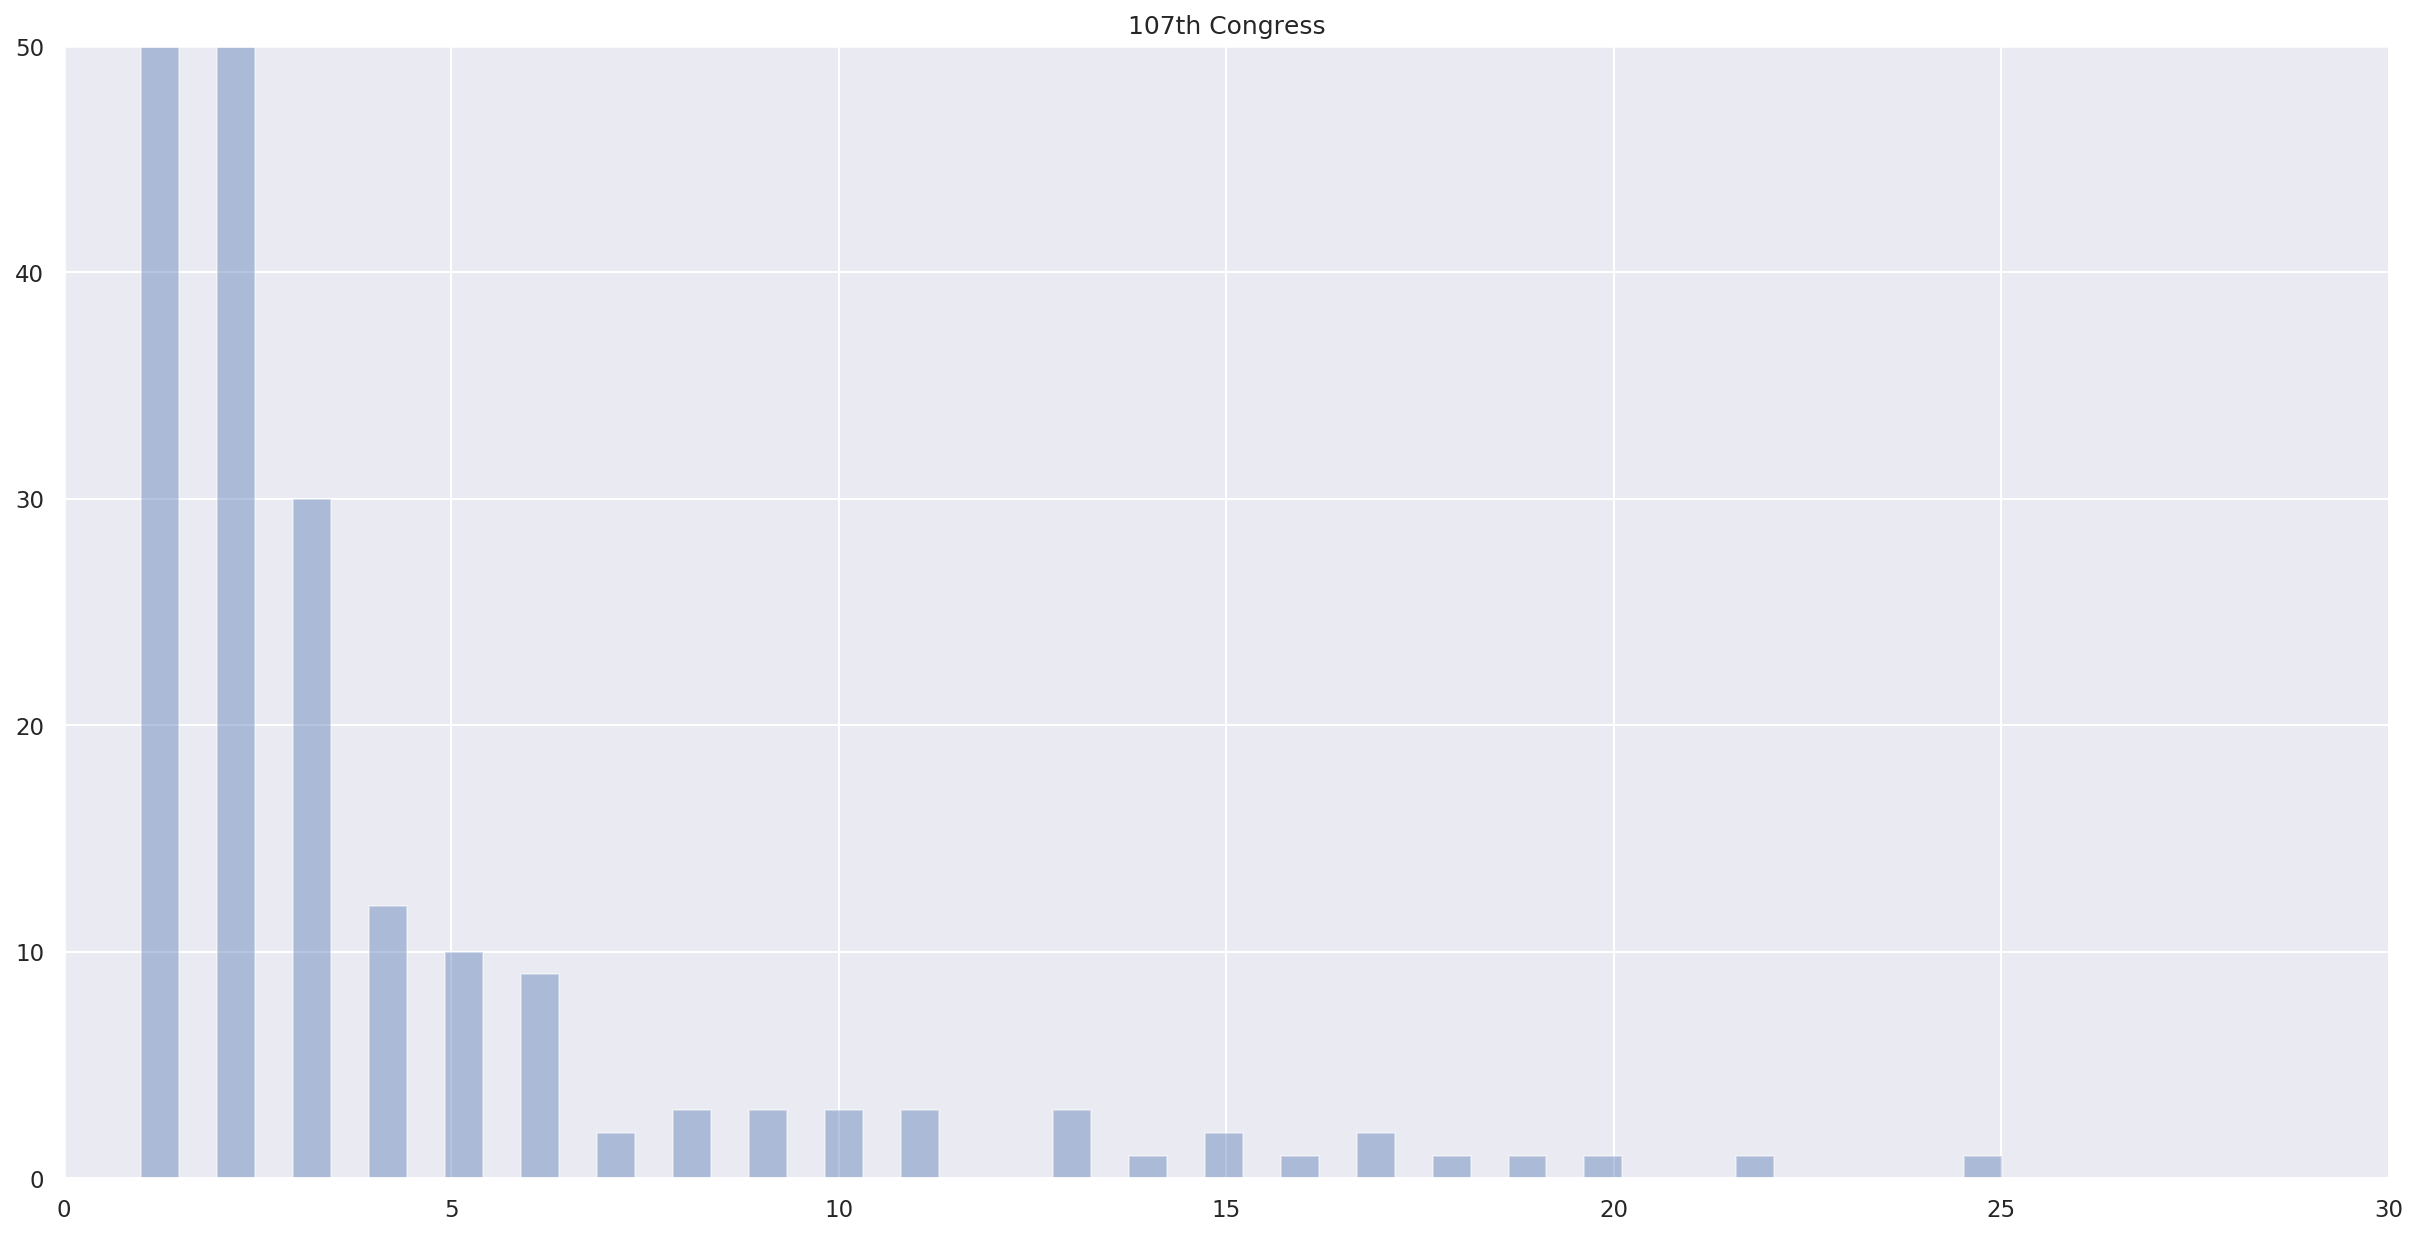

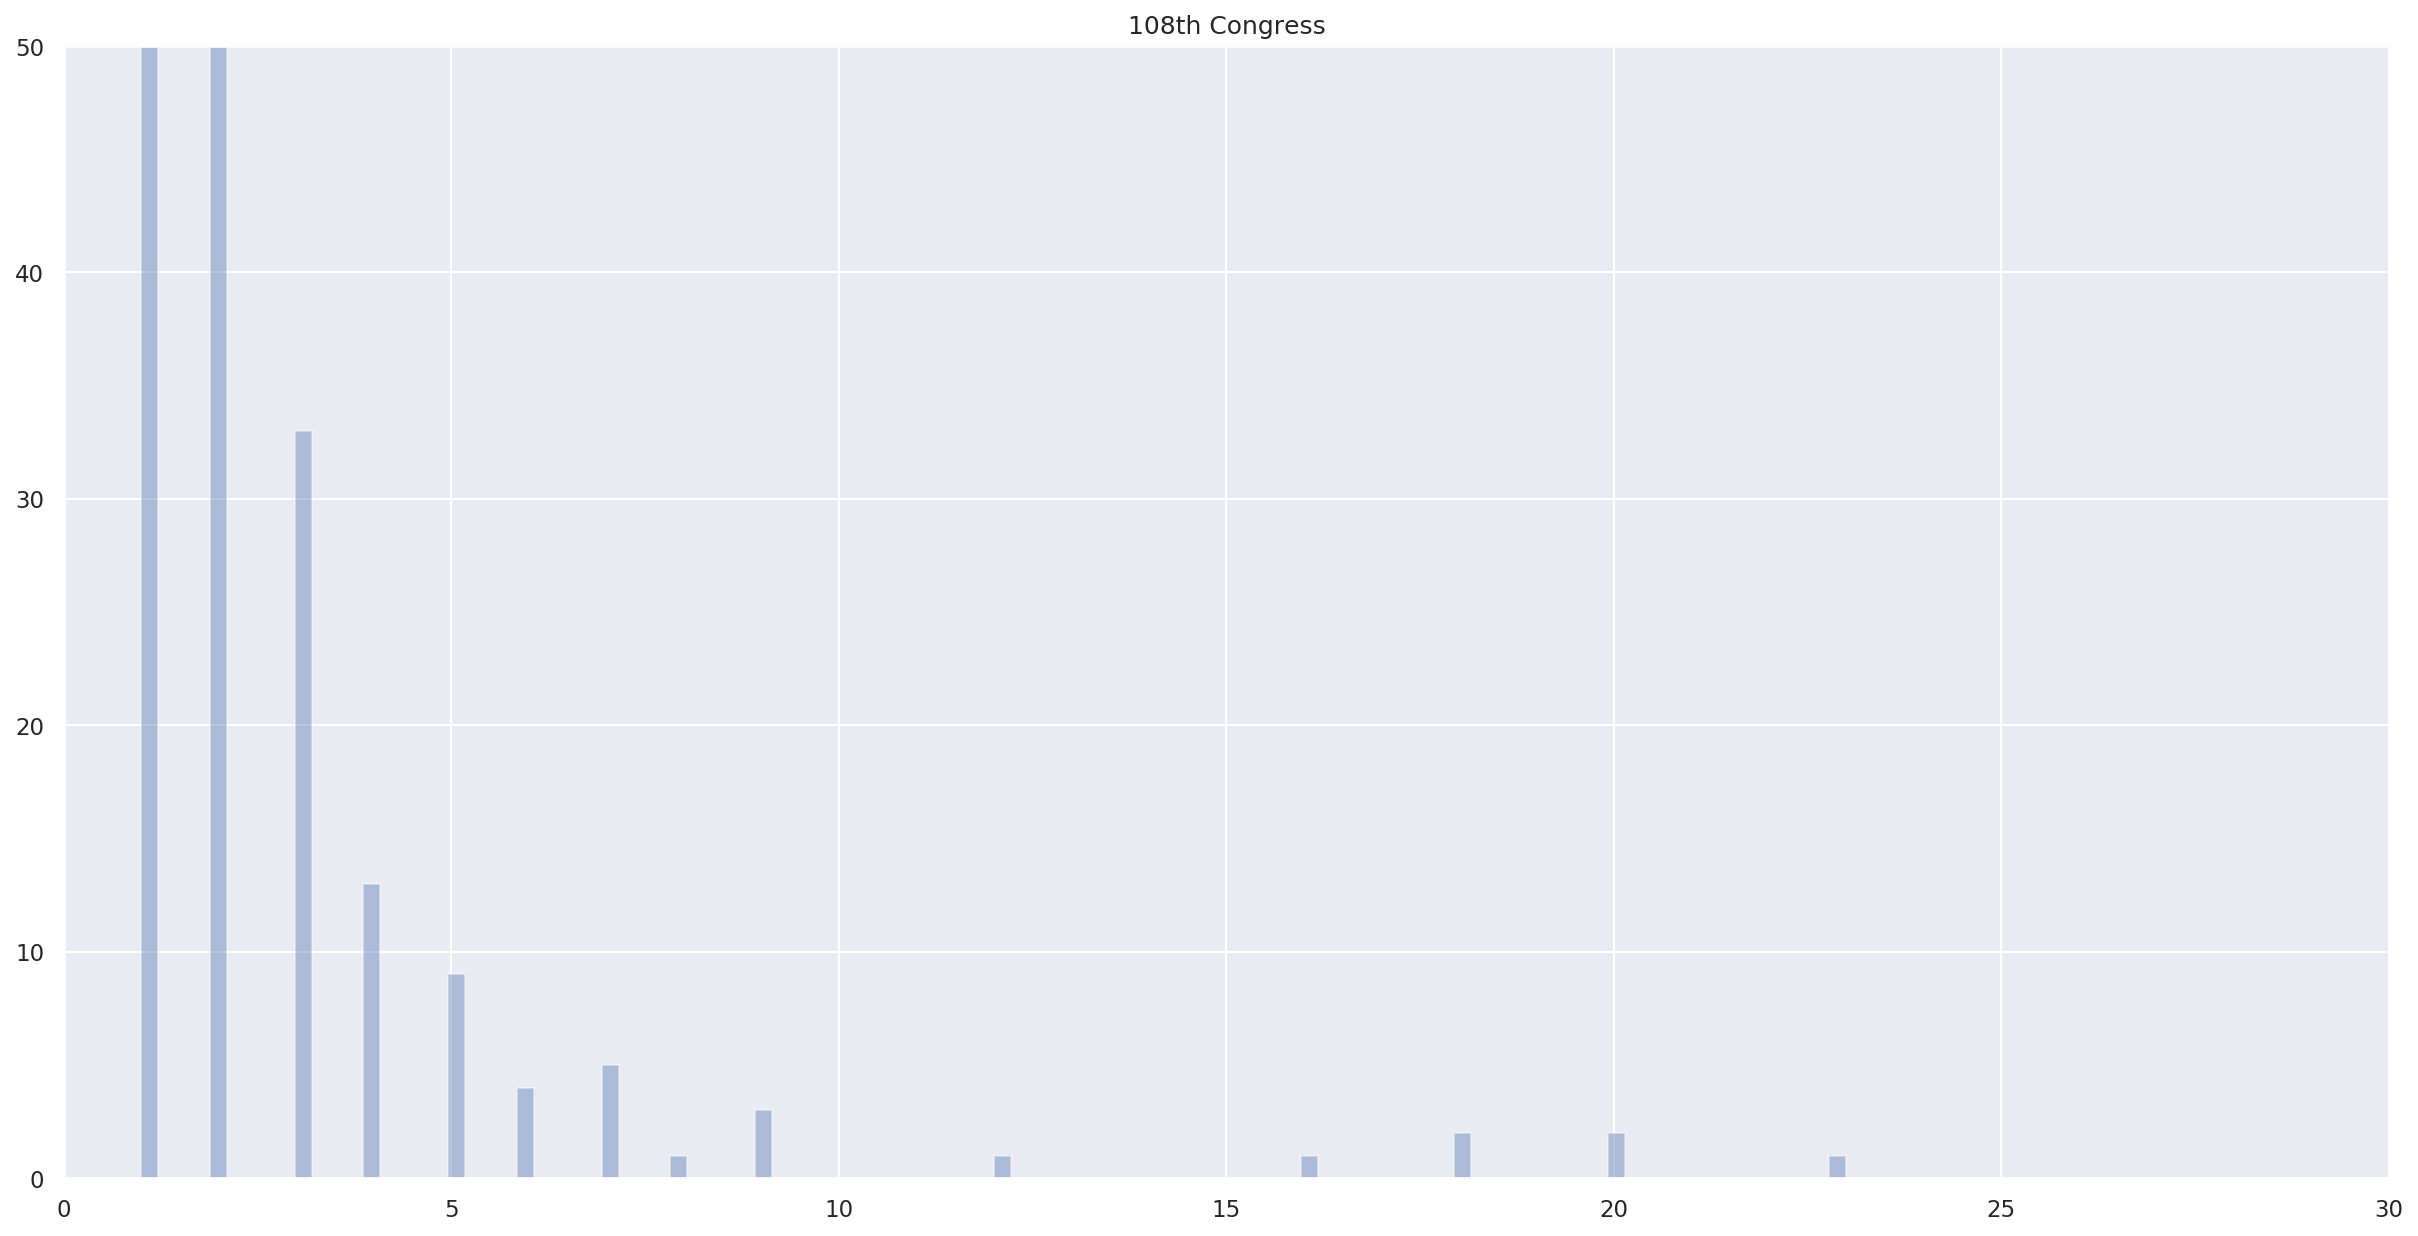

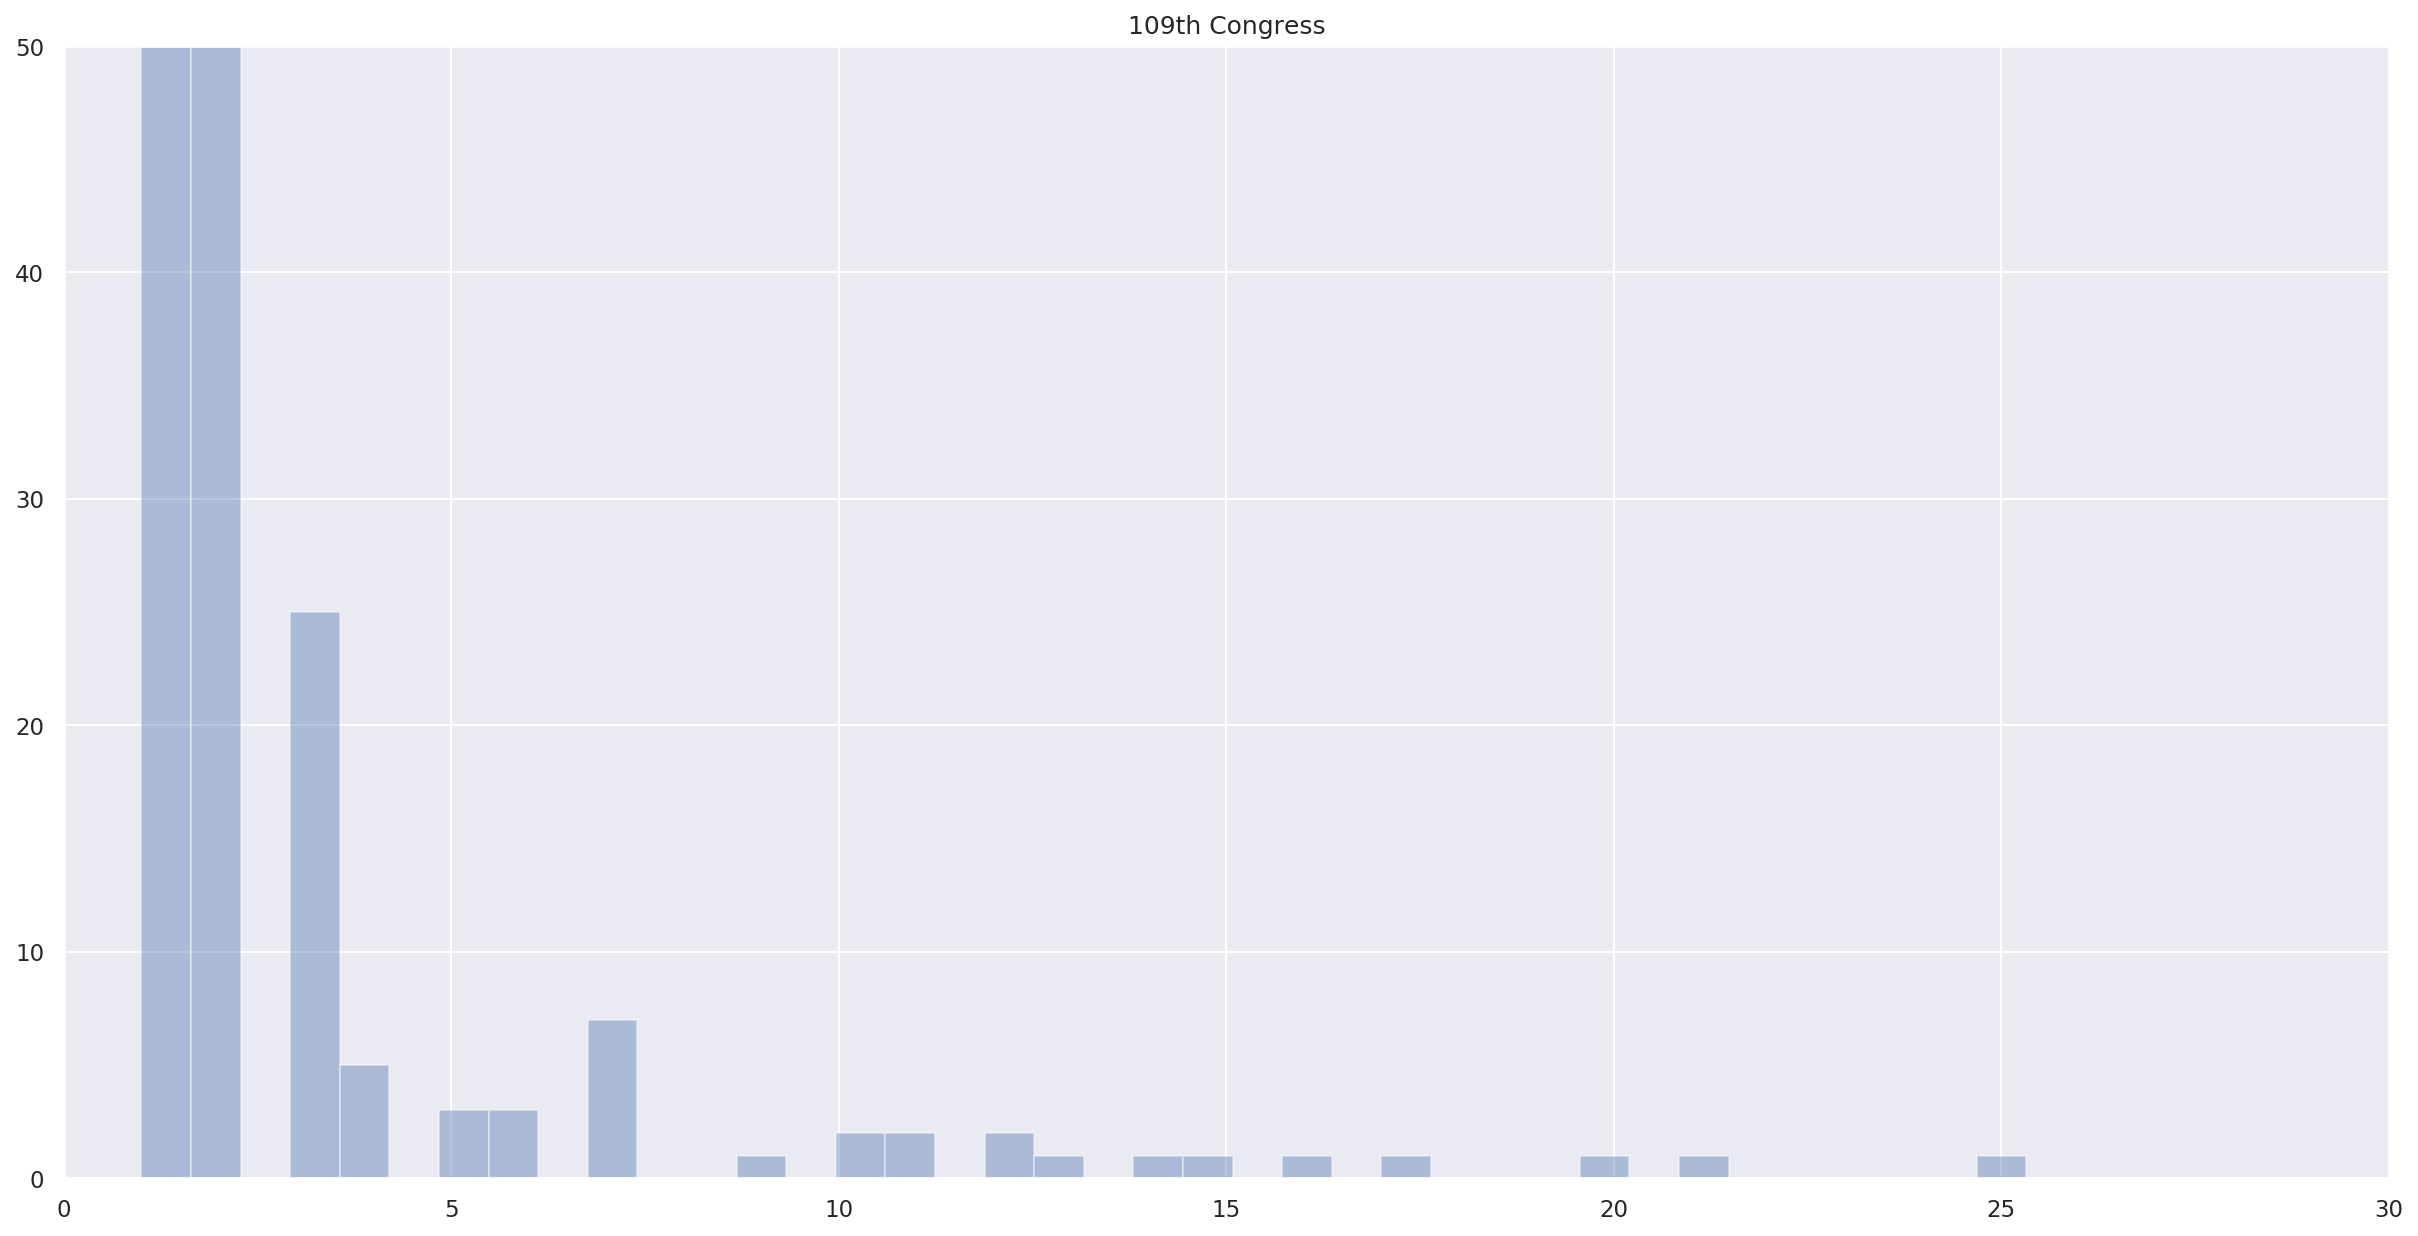

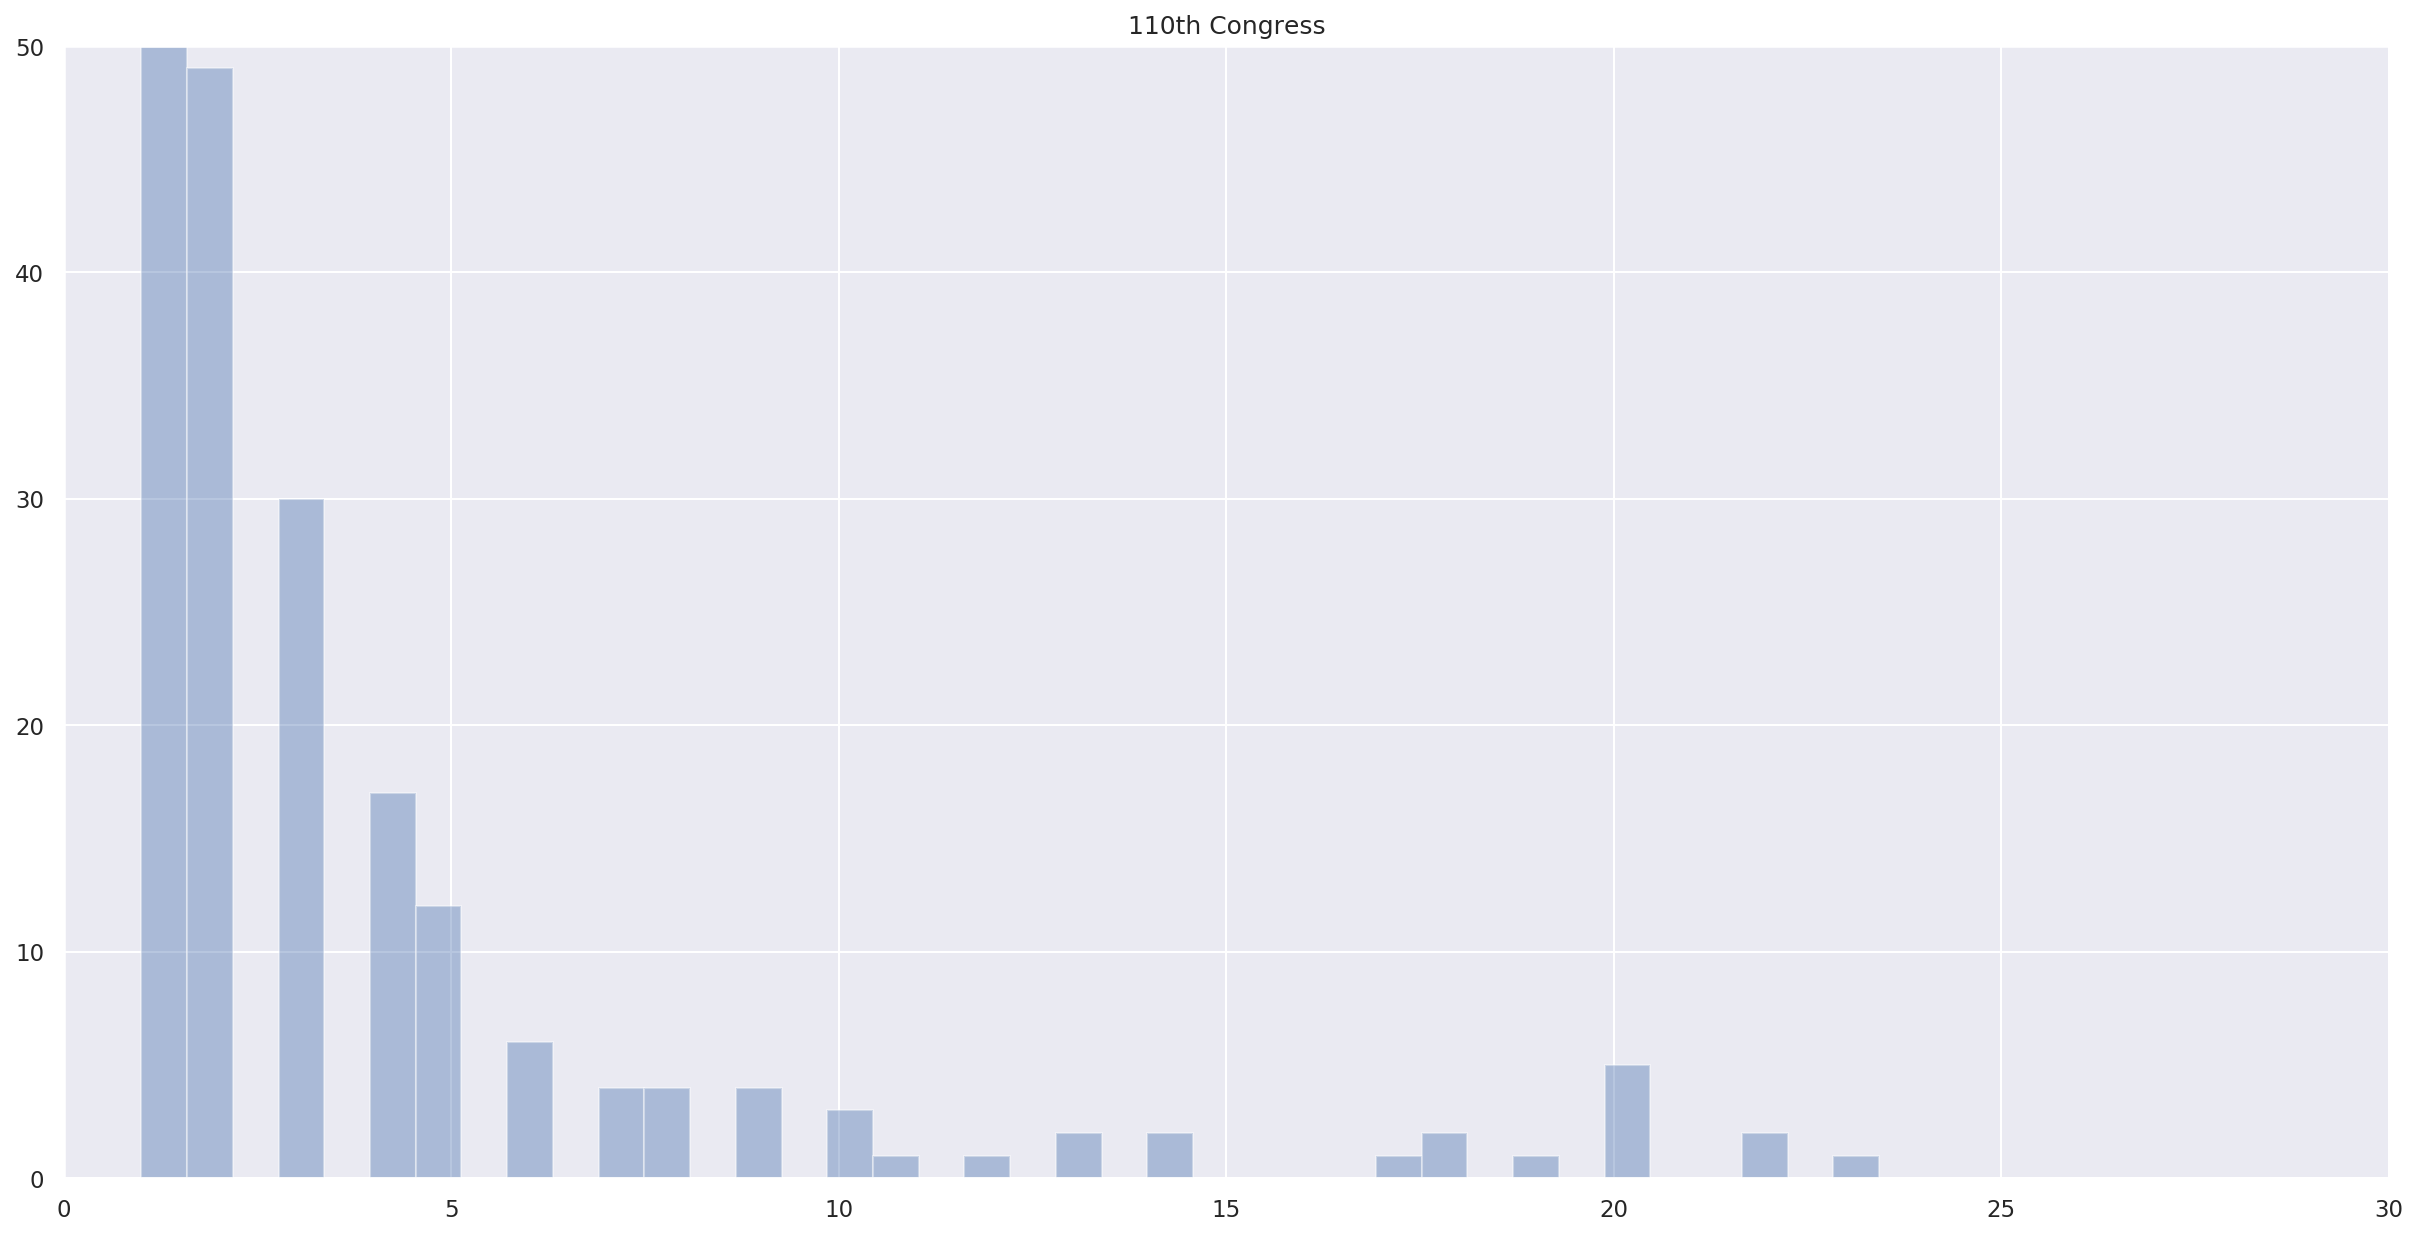

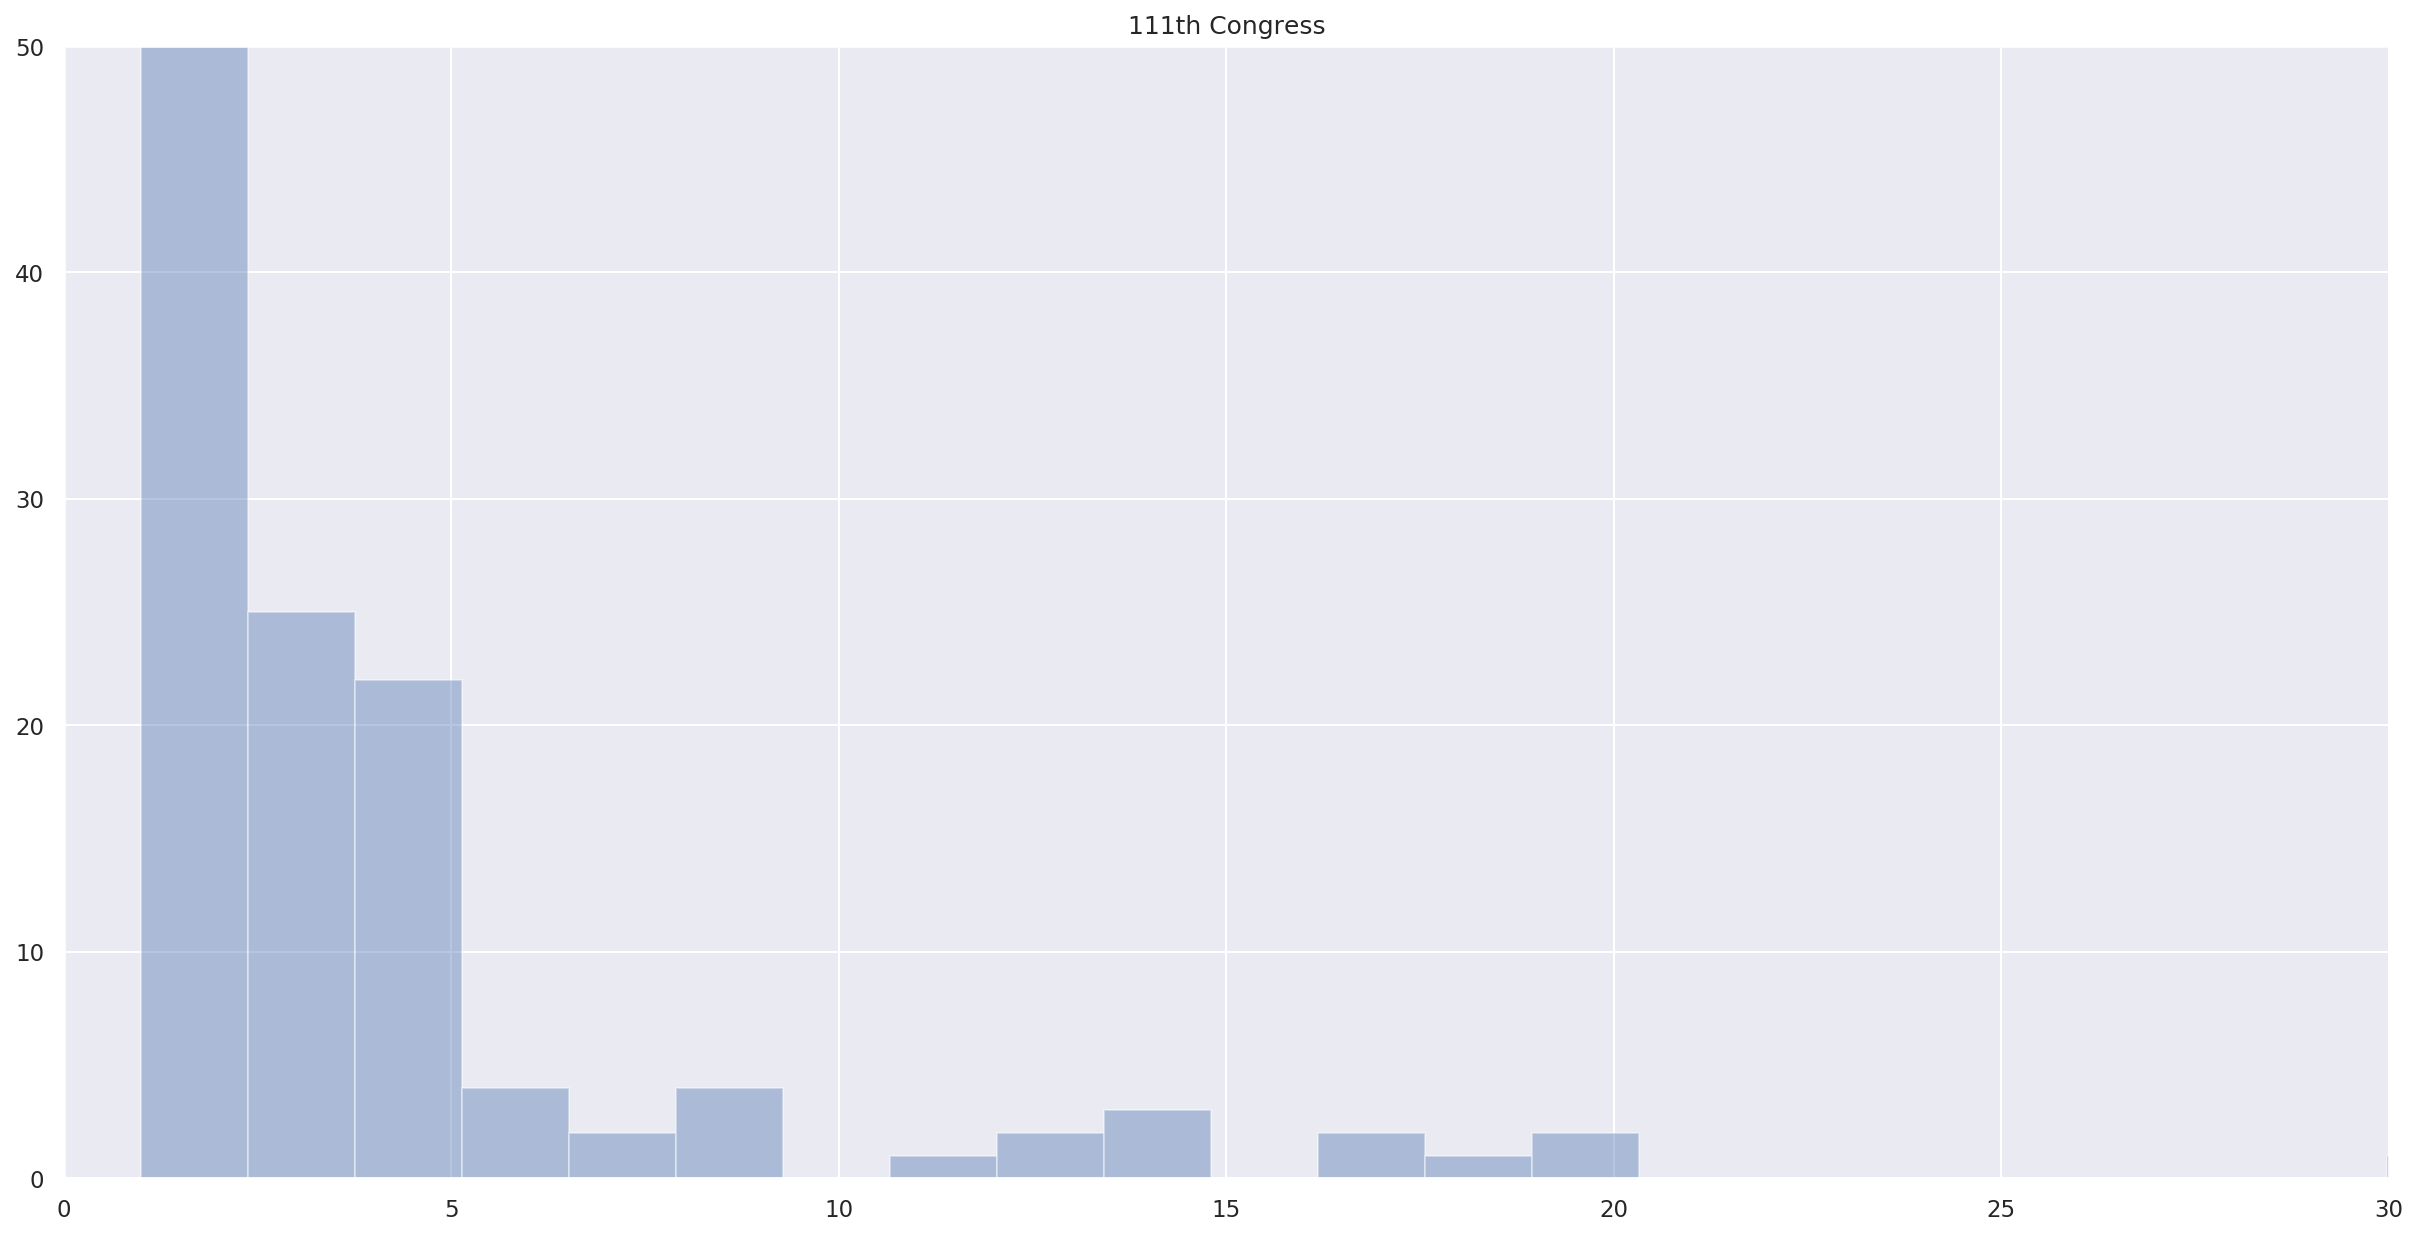

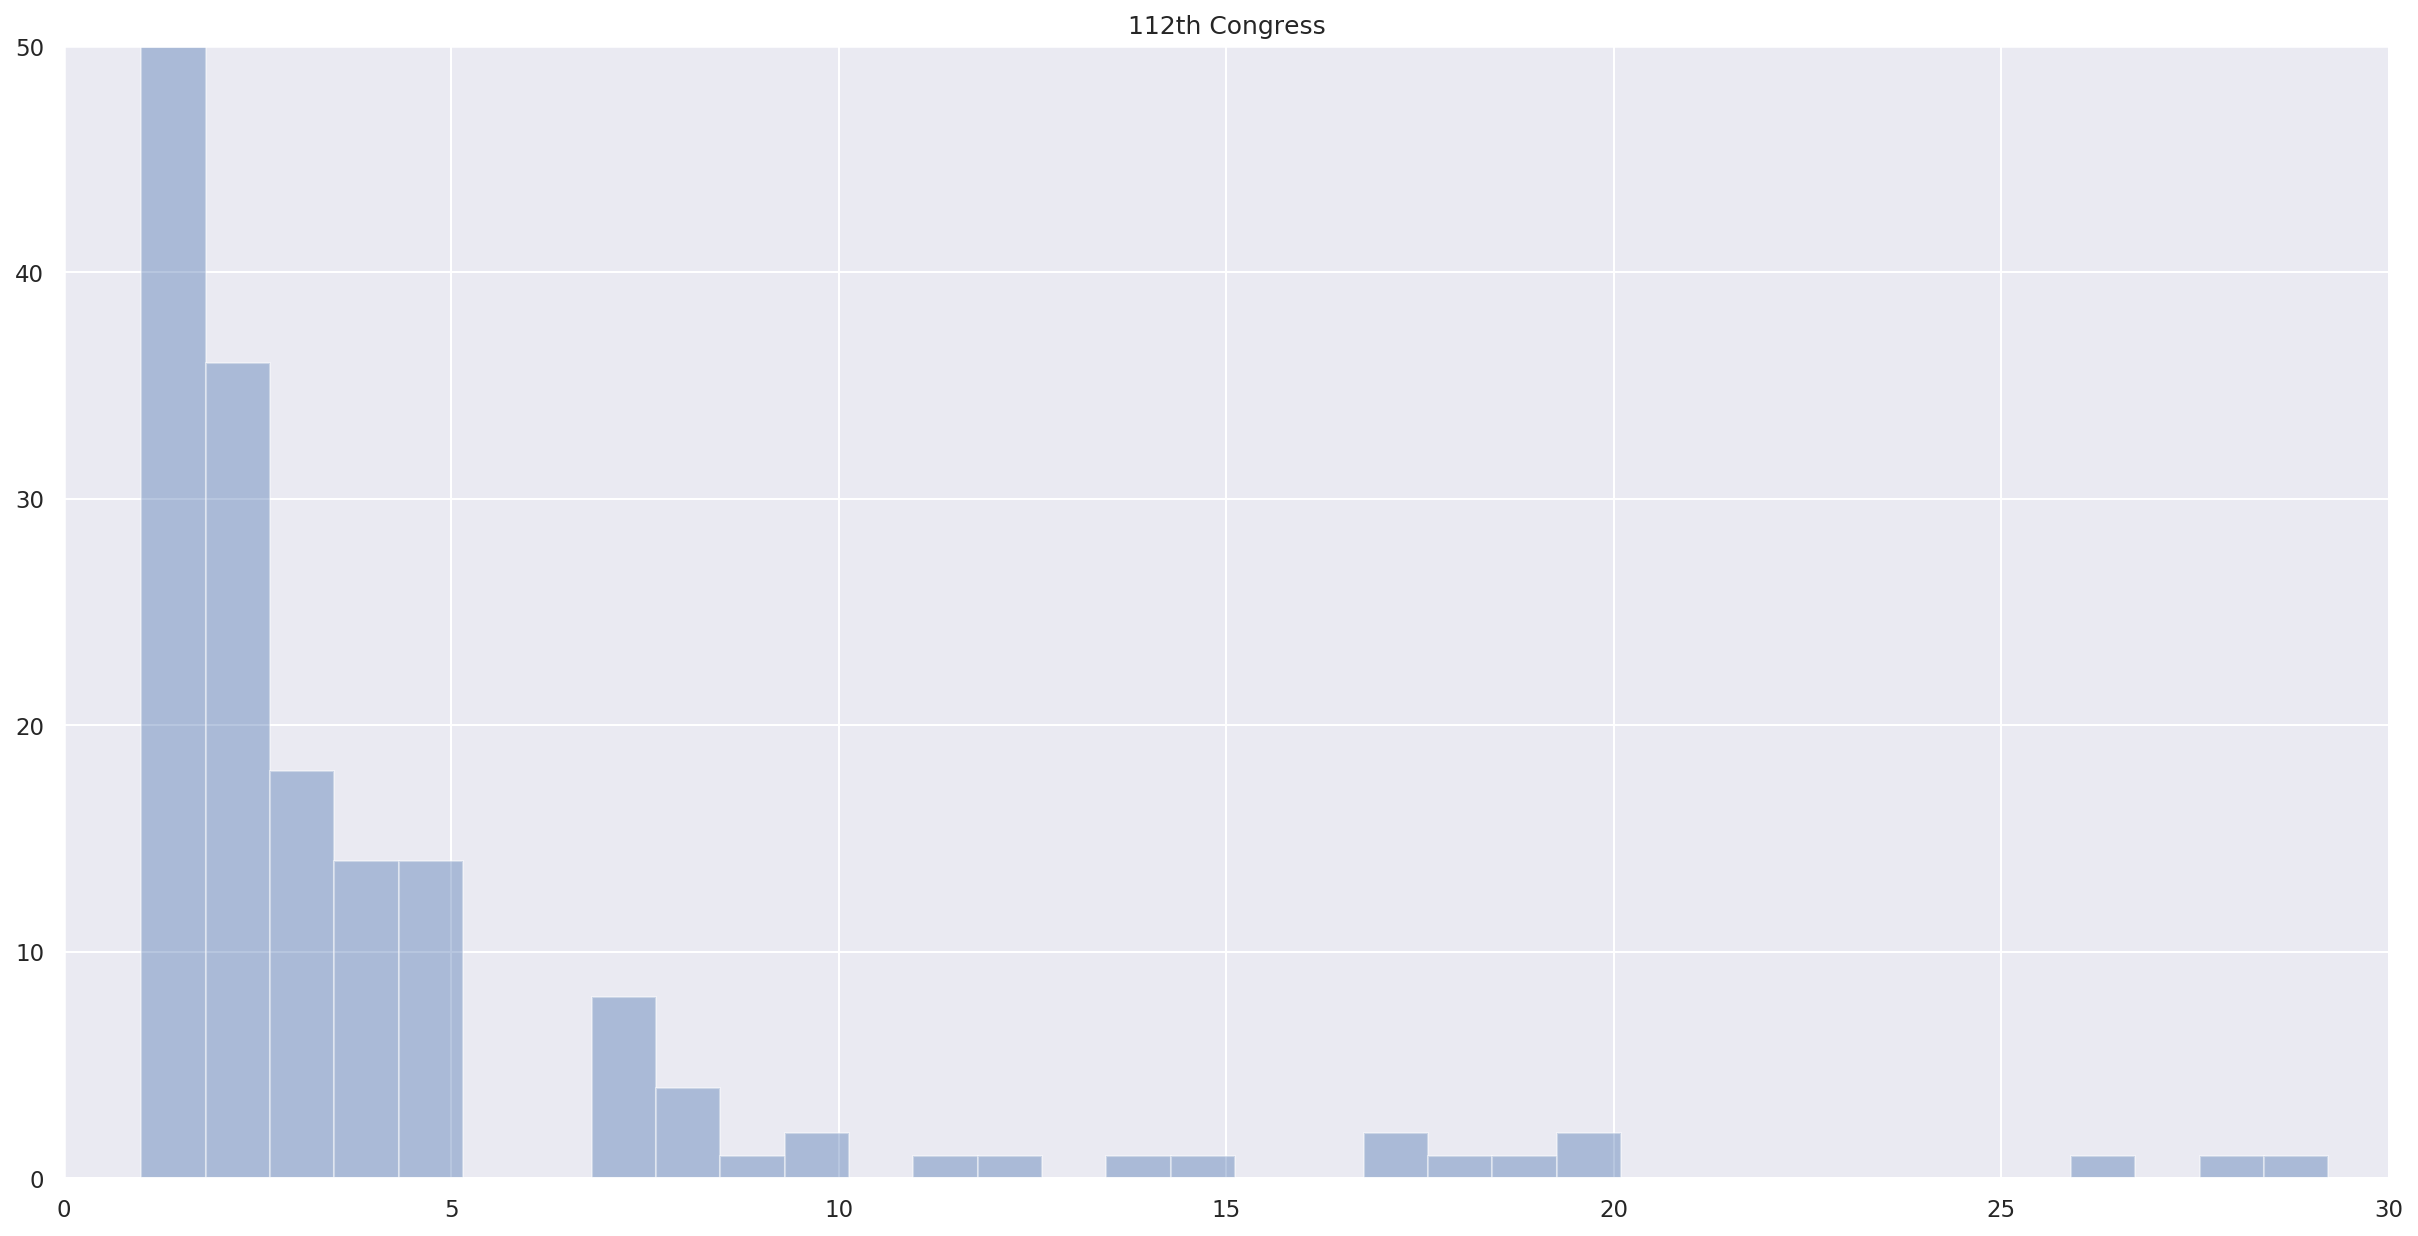

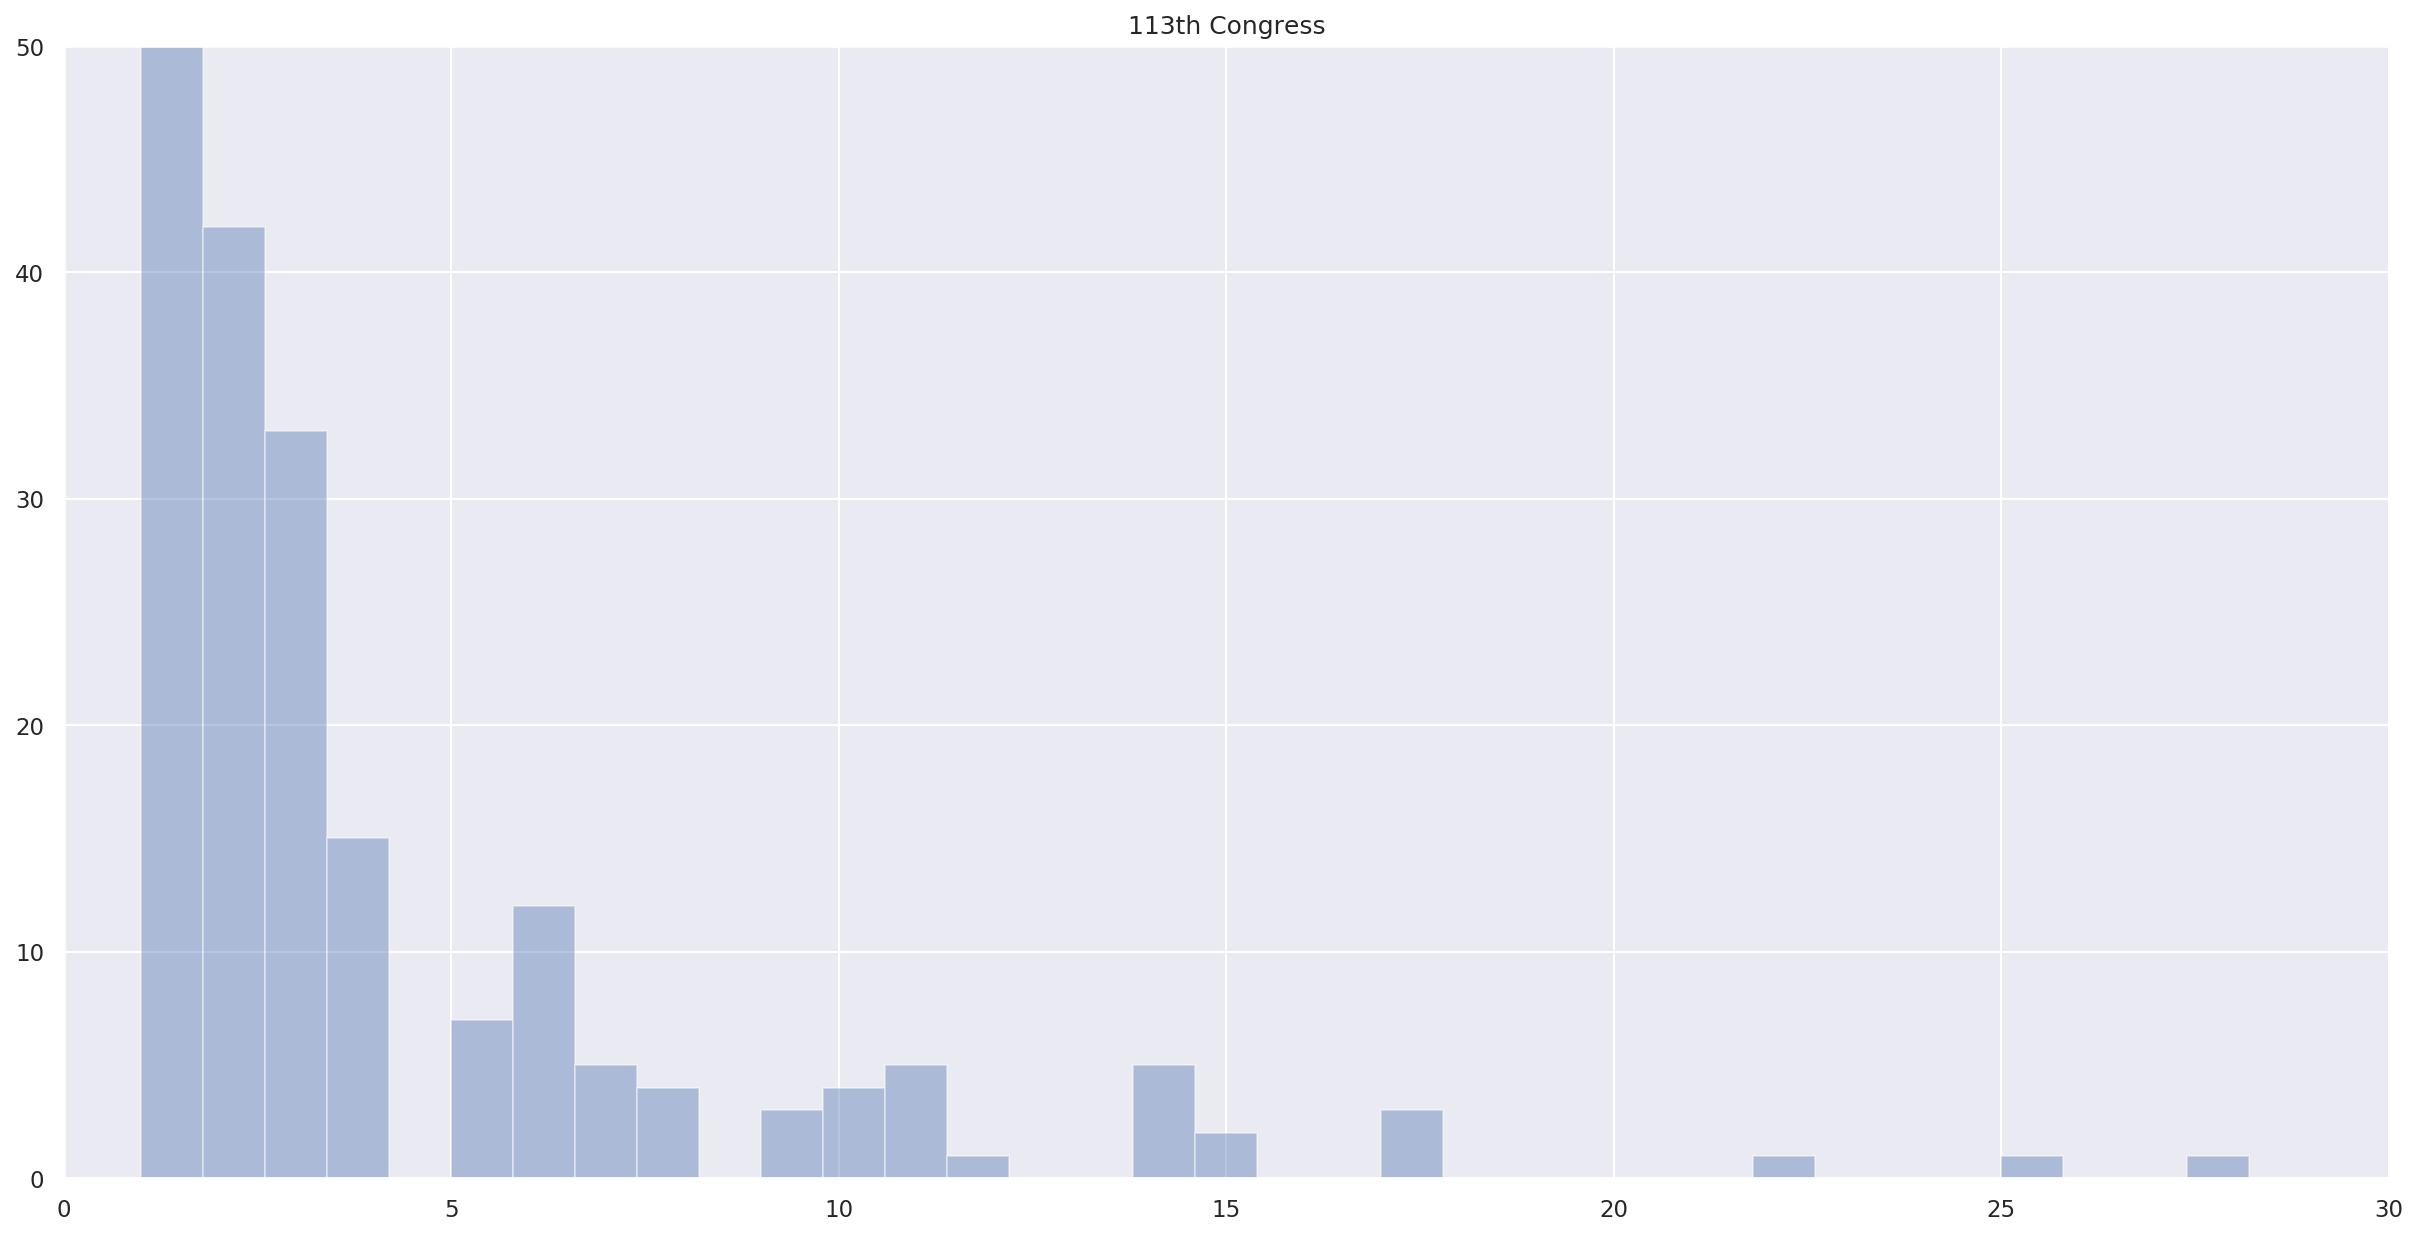

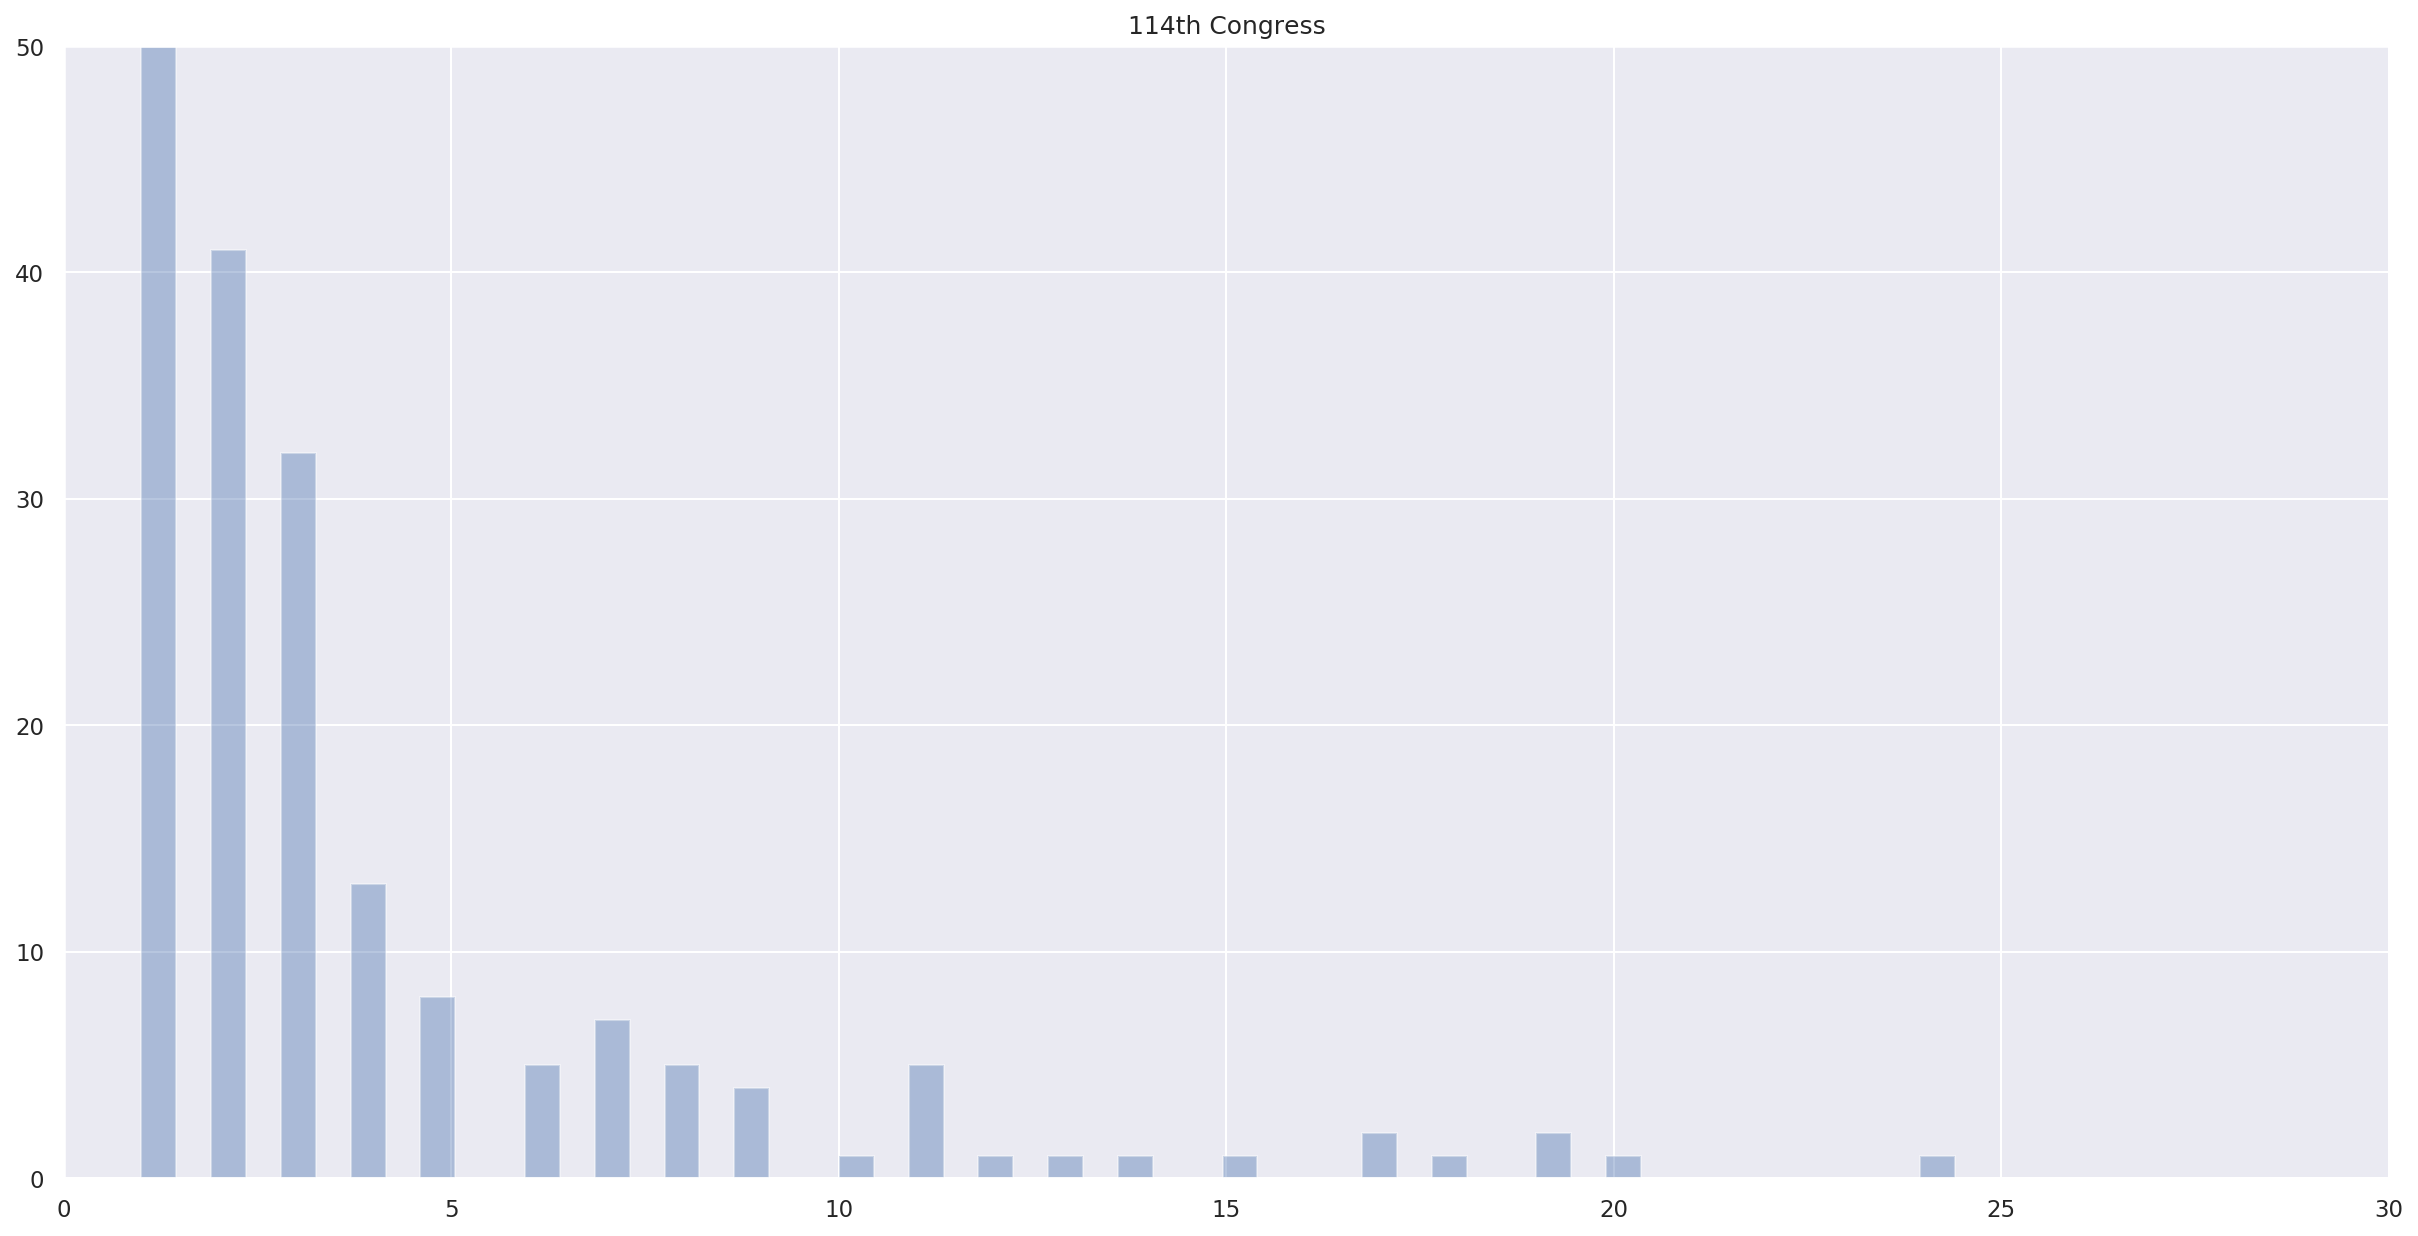

In [142]:
sessions = range(93, 115)
base_dir = '../../data/interim/bill_mentions/'
for session in sessions:    
    in_path = base_dir + f'{session}.pickle'
    with open(in_path, 'rb') as in_file:
        mentions = pickle.load(in_file)
        
    hist = []
    for bill, val in mentions.items():
        hist.append(val['count'])
    sns.distplot(hist, bins=100, kde=False)
    plt.gca().set_xlim(0, 30)
    plt.gca().set_ylim(0, 50)
    plt.gca().set_title(f'{session}th Congress')
    plt.show()  

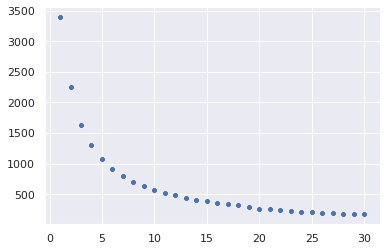

In [5]:
bars = range(1, 31)
above_k_mentions = []
for k in bars:
    counter = 0
    for bill, val in mentions.items(): 
        if val['count'] > k:
            counter += 1
    above_k_mentions.append(counter)
sns.scatterplot(list(bars), above_k_mentions)

## Filter repeated mentions, histogram of time between mentions 

In [ ]:
# Filter Repeated Mentions
min_num_mentions = 2
encore: Dict[str, Dict[str, Any]] = {}
for bill, val in mentions.items():
    if val['count'] > min_num_mentions:
        distances = time_between_mentions(val['index'])
        val['mean_spread'] = np.mean(distances)
        val['sum_spread'] = np.sum(distances)
        encore[bill] = val
print(len(encore))

In [ ]:
x_axis = []
for bill, val in encore.items():
    x_axis.append(val['mean_spread'])
sns.distplot(x_axis, bins=200, kde=False)
plt.gca().set_ylim(0, 150_000)
plt.gca().set_ylim(0, 100)
plt.show()

In [ ]:
x_axis = []
for bill, val in encore.items():
    x_axis.append(val['sum_spread'])
sns.distplot(x_axis, bins=100, kde=False)
plt.gca().set_ylim(0, 80)
plt.show()

In [ ]:
x_axis = []
y_axis = []
for bill, val in encore.items():
    x_axis.append(val['mean_spread'])
    y_axis.append(len(val['index']))
    
#     print(f'{val["spread"]:.2f}\t{bill}')
#     if v['spread'] > 10:
#         print(v['index'], v['spread'])
sns.jointplot(x_axis, y_axis, xlim=(0,100_000), ylim=(0,250))
plt.gca().set_xlabel('spread')
plt.gca().set_ylabel('freq')
plt.show()

# Cherry Mentions

In [130]:
from evaluations import intrinsic_eval

Dem_pairs = intrinsic_eval.load_cherry(
    '../../data/evaluation/cherries/labeled_Dem_samples.tsv',
    exclude_hard_examples=True)
GOP_pairs = intrinsic_eval.load_cherry(
    '../../data/evaluation/cherries/labeled_GOP_samples.tsv',
    exclude_hard_examples=True)
val_data = Dem_pairs + GOP_pairs

euphemism = list(
    filter(intrinsic_eval.is_euphemism, val_data))
party_platform = list(
    filter(intrinsic_eval.is_party_platform, val_data))
party_platform += intrinsic_eval.load_cherry(
    '../../data/evaluation/cherries/remove_deno.tsv',
    exclude_hard_examples=False)

find = [pair.query for pair in euphemism]
find += [pair.neighbor for pair in euphemism]
find += [pair.query for pair in party_platform]
find += [pair.neighbor for pair in party_platform]
find = [s.replace('_', ' ') for s in find]
find = set(find)  # deduplicate
find.remove('earnings')  # manual
cherries = tuple(find)  # enforce iter order

Loaded 26 labeled entries at ../../data/evaluation/cherries/labeled_Dem_samples.tsv
Loaded 29 labeled entries at ../../data/evaluation/cherries/labeled_GOP_samples.tsv
Loaded 32 labeled entries at ../../data/evaluation/cherries/remove_deno.tsv


In [35]:
for phrase in cherries:
    count = 0
    for bill_name, val in mentions.items():
        for party, speech in val['speech']:
            if phrase in speech:
                count += 1
    print(f'{phrase}: {count}')

recovery and reinvestment: 0
tax breaks: 172
growth of government: 10
creditors: 131
undocumented workers: 9
illegal narcotics: 11
rifles: 29
social security lockbox: 0
overregulation: 81
military spending: 52
constitutional option: 0
tax hike: 42
freddie and fannie: 0
illegals: 12
universal health care: 12
corporate profits: 38
occupation of iraq: 0
islamists: 0
family planning: 137
singlepayer: 14
limited government: 15
voodoo: 3
death tax: 60
bipartisan tax relief: 1
campaign spending: 66
governmentrun health care: 7
estate tax: 183
proabortion: 14
government takeover: 8
busing: 195
cut taxes: 55
drug industry: 15
billion tax cut: 29
massive immigration: 2
medical liability: 24
washington spending: 0
womens rights: 29
assault weapons: 31
unborn: 74
partialbirth abortion: 8
national health insurance: 132
mandatory minimum: 41
undocumented immigrants: 15
progrowth: 38
medical malpractice: 50
national energy tax: 7
massive debt: 7
school choice: 43
immigration: 340
forced busing: 20
la

In [115]:
# Per Session
sessions = range(93, 115)
stuff = []
base_dir = '../../data/interim/bill_mentions/'
for session in tqdm(sessions):    
    in_path = base_dir + f'{session}.pickle'
    with open(in_path, 'rb') as in_file:
        mentions = pickle.load(in_file)
        
    min_num_mentions = 2
    encore: Dict[str, Dict[str, Any]] = {}
    for bill, val in mentions.items():
        if val['count'] > min_num_mentions:
            distances = time_between_mentions(val['index'])
            val['mean_spread'] = np.mean(distances)
            val['sum_spread'] = np.sum(distances)
            encore[bill] = val
    
    counter = {key: 0 for key in cherries}
    for cherry in cherries:
        for bill_name, val in mentions.items():
            for party, speech in val['speech']:
                if cherry in speech:
                    counter[cherry] += 1
            
            # optionally search context speeches
            for context in val['contexts']:
                for party, speech in context:
                    if cherry in speech:
                        counter[cherry] += 1
    stuff.append(counter)

table = pd.DataFrame(stuff, index=sessions, columns=cherries)

100%|██████████| 22/22 [00:43<00:00,  1.97s/it]


In [131]:
# Per Session Per Party
sessions = range(93, 115)
stuff = []
base_dir = '../../data/interim/bill_mentions/'
for session in tqdm(sessions):    
    in_path = base_dir + f'{session}.pickle'
    with open(in_path, 'rb') as in_file:
        mentions = pickle.load(in_file)
        
    min_num_mentions = 2
    encore: Dict[str, Dict[str, Any]] = {}
    for bill, val in mentions.items():
        if val['count'] > min_num_mentions:
            distances = time_between_mentions(val['index'])
            val['mean_spread'] = np.mean(distances)
            val['sum_spread'] = np.sum(distances)
            encore[bill] = val
    
    D_counter = {key: 0 for key in cherries}
    R_counter = {key: 0 for key in cherries}
    for cherry in cherries:
        for bill_name, val in mentions.items():
#             for party, speech in val['speech']:
#                 if cherry in speech:
#                     if party == 'D':
#                         D_counter[cherry] += 1
#                     if party == 'R':
#                         R_counter[cherry] += 1
            
            # optionally search context speeches
            for context in val['contexts']:
                for party, speech in context:
                    if cherry in speech:
                        if party == 'D':
                            D_counter[cherry] += 1
                        if party == 'R':
                            R_counter[cherry] += 1
    stuff.append(D_counter)
    stuff.append(R_counter)

indices = [f'{s}{p}' for s in sessions for p in ('D', 'R')]
table = pd.DataFrame(stuff, index=indices, columns=cherries)

100%|██████████| 22/22 [00:36<00:00,  1.64s/it]


In [132]:
table

,recovery and reinvestment,tax breaks,growth of government,creditors,undocumented workers,illegal narcotics,rifles,social security lockbox,overregulation,military spending,...,credit card companies,strategic defense initiative,missile defense,dx,socialized medicine,flat tax,big oil companies,newcomers,desegregation,prolife
93D,0,80,0,52,0,7,18,0,1,92,...,2,0,5,0,3,3,34,17,71,208
93R,0,17,3,44,0,4,9,0,18,16,...,0,0,1,4,8,0,9,12,40,185
94D,0,51,5,63,0,4,13,0,15,10,...,9,0,1,2,4,2,18,14,38,272
94R,0,30,5,50,0,1,2,0,86,1,...,4,0,1,2,1,1,4,3,35,121
95D,0,46,0,54,6,0,4,0,22,14,...,2,0,2,0,1,0,8,10,74,231
95R,0,16,5,25,2,4,5,0,49,1,...,3,0,0,0,0,4,0,4,75,160
96D,0,4,1,9,0,0,0,0,22,4,...,1,0,1,1,0,0,1,1,5,26
96R,0,6,0,9,0,0,0,0,16,0,...,0,0,4,0,1,0,2,2,0,18
97D,0,9,0,2,0,1,3,0,1,4,...,3,0,2,0,0,0,0,0,4,21
97R,0,5,0,5,3,0,1,0,9,2,...,0,0,1,0,0,0,0,1,0,6


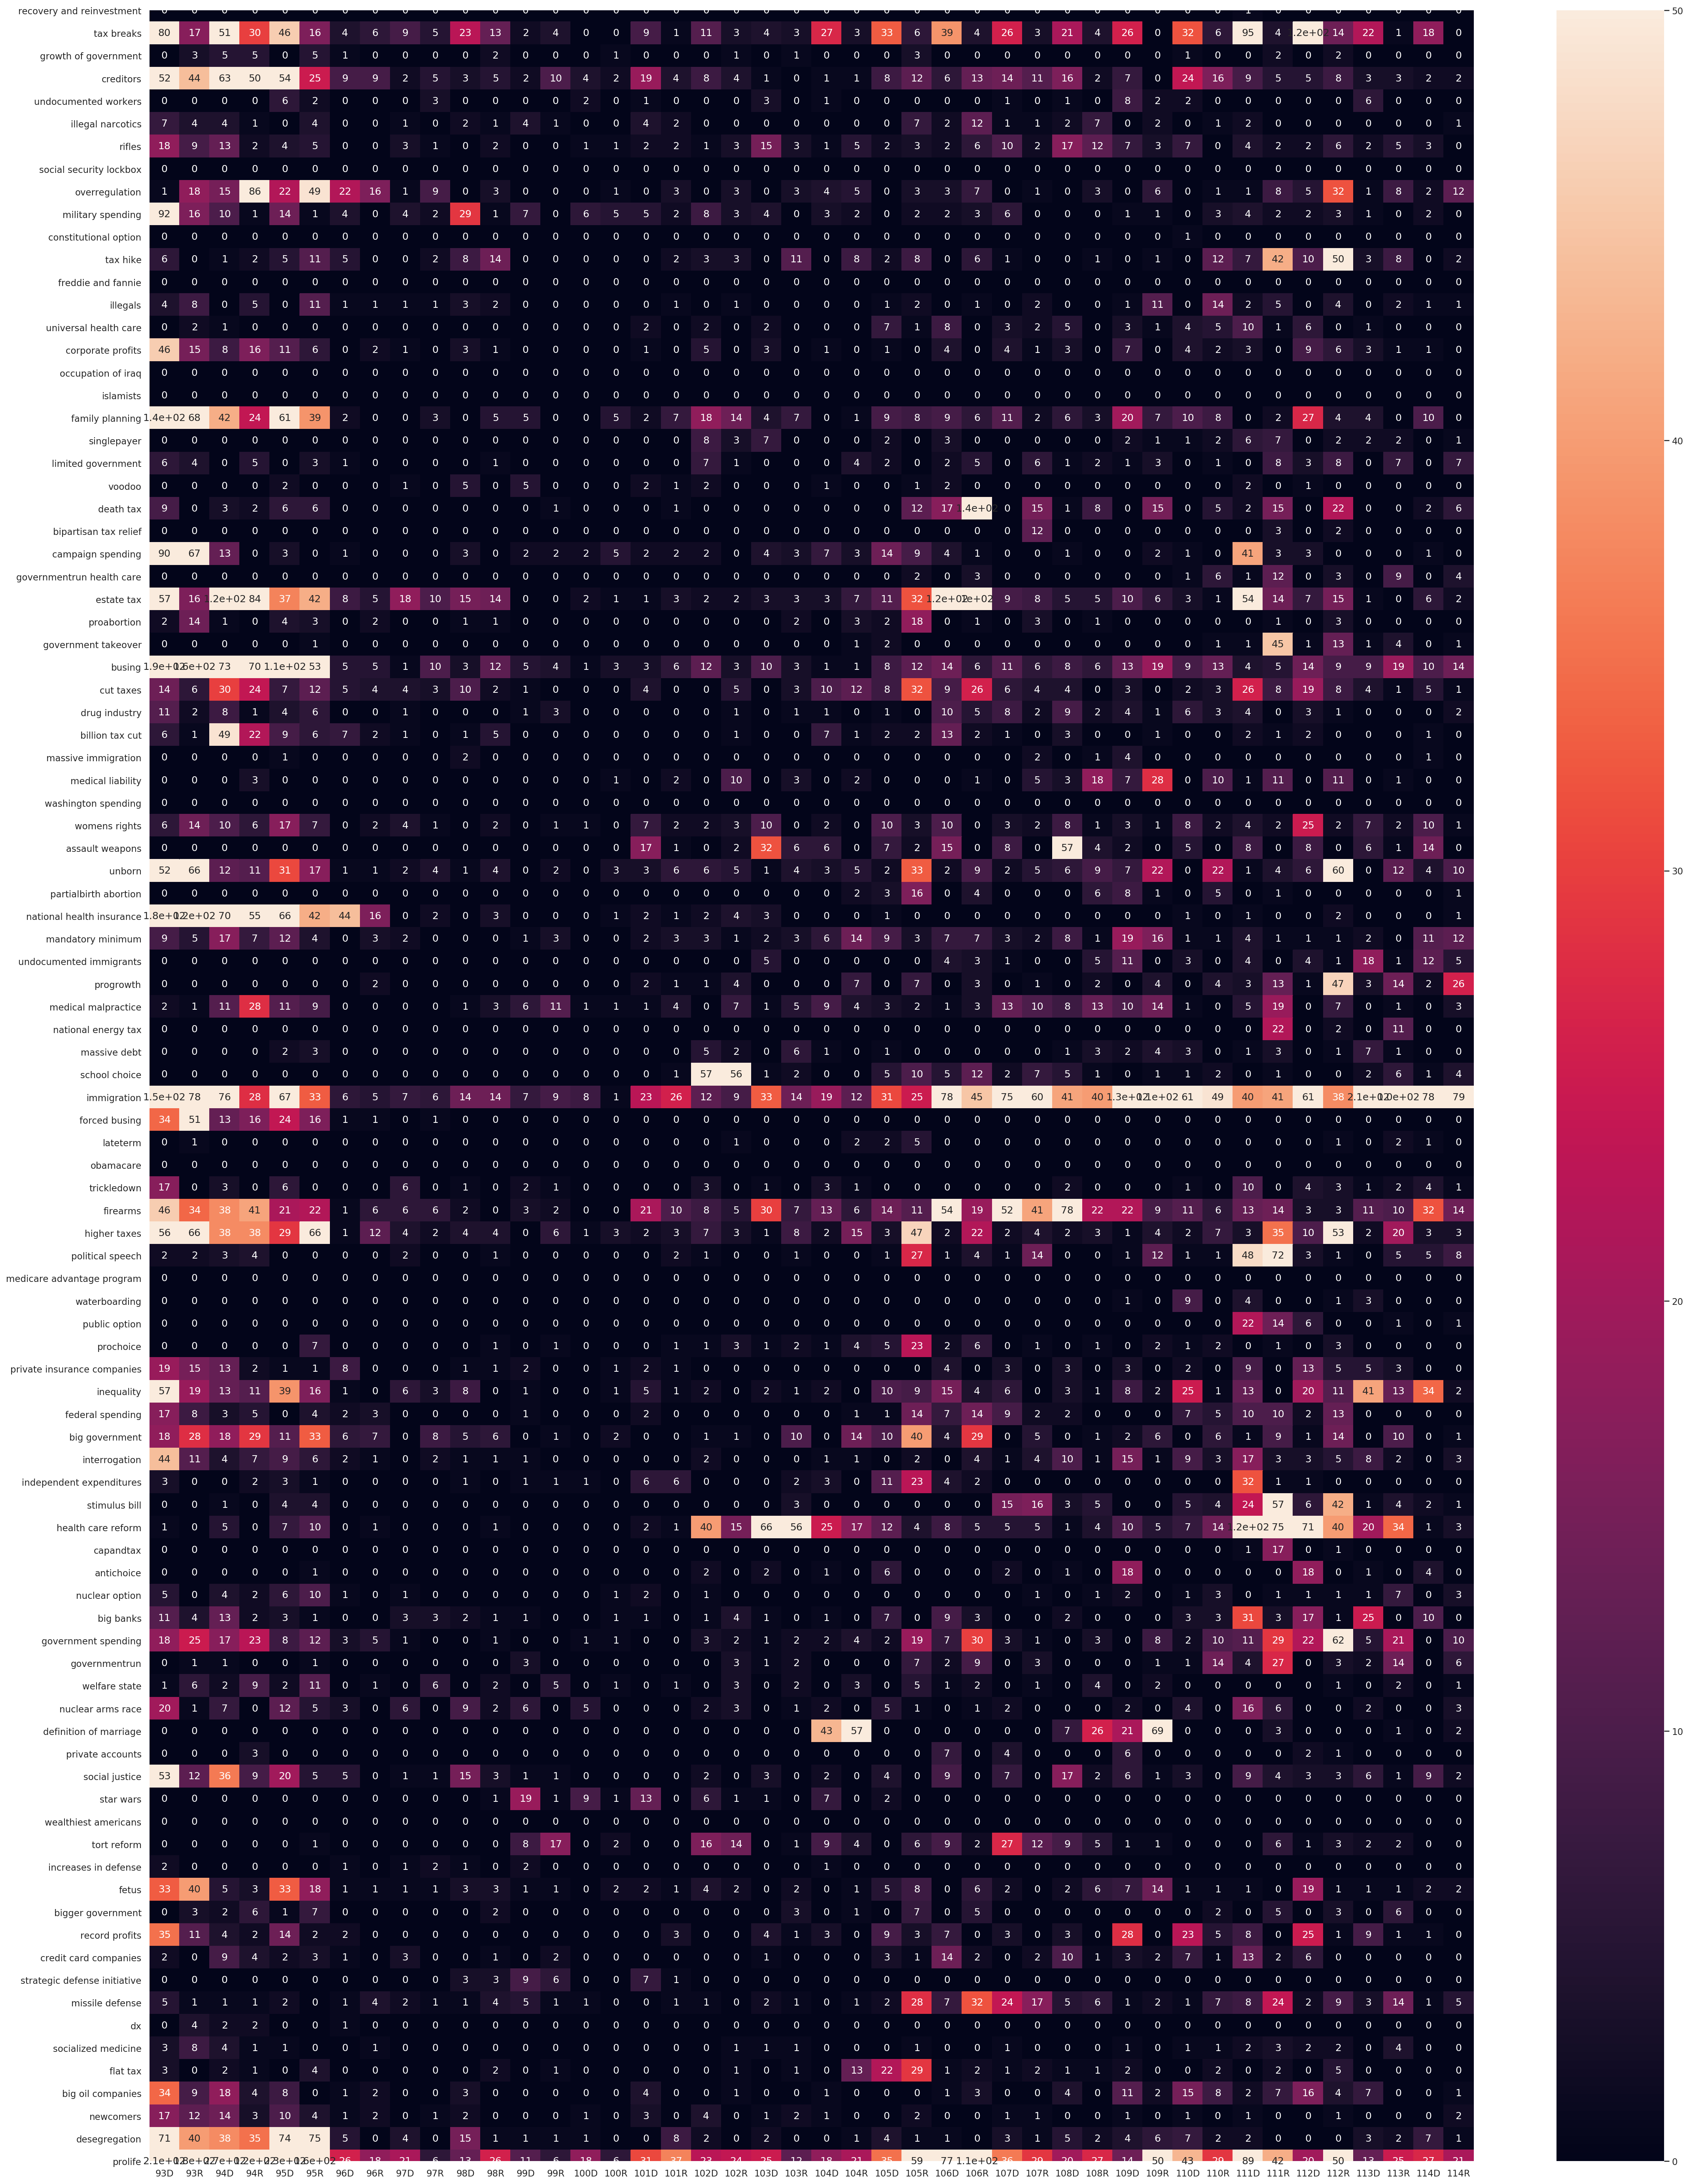

In [135]:
fig, ax = plt.subplots(figsize=(36, 48))
sns.heatmap(table.T, vmin=0, vmax=50, annot=True, ax=ax)

with open(f'graphs/cherry_heatmap_plus_context.png', 'wb') as file:
    fig.savefig(file, dpi=300, bbox_inches='tight')
    
plt.show()

# Plot Bill Mentions Timeline 

In [ ]:
x_axis = []
y_axis = []
label = []

fig, ax = plt.subplots()
plt.figure(figsize=(48, 36))

for bill_id, (bill_name, val) in enumerate(encore.items()):
    for location in val['index']:
        if bill_id not in y_axis:
            ax.annotate(
                bill_name, (location, bill_id), 
                fontsize=7, horizontalalignment='right')
            
        x_axis.append(location)
        y_axis.append(bill_id)
            
            
ax.set_xlabel('speech index')
ax.set_ylabel('bill index')
sns.scatterplot(x_axis, y_axis, ax=ax)

with open('temp.png', 'wb') as file:
    fig.savefig(file, dpi=300, bbox_inches='tight')

# plt.show()

In [8]:
# Plot per Session
base_dir = '../../data/interim/bill_mentions/legacy/'
for session in range(97, 115):
# for session in range(96, 115):
    in_path = base_dir + f'{session}.pickle'
    with open(in_path, 'rb') as in_file:
        mentions = pickle.load(in_file)
        
    min_num_mentions = 2
    encore: Dict[str, Dict[str, Any]] = {}
    for bill, val in mentions.items():
        if val['count'] > min_num_mentions:
            distances = time_between_mentions(val['index'])
            val['mean_spread'] = np.mean(distances)
            val['sum_spread'] = np.sum(distances)
            encore[bill] = val
    print(f'{session}th Congress: {len(encore)} repeated bill mentions')
    
#     x_axis = []
#     y_axis = []
#     label = []

#     fig, ax = plt.subplots(figsize=(100, 80))  # (93, 96)
# #     fig, ax = plt.subplots(figsize=(48, 36))  # (96, 115)
#     for bill_id, (bill_name, val) in enumerate(encore.items()):
#         for location in val['index']:
#             if bill_id not in y_axis:
#                 ax.annotate(
#                     bill_name, (location, bill_id), 
#                     fontsize=12, horizontalalignment='right')

#             x_axis.append(location)
#             y_axis.append(bill_id)


#     ax.set_xlabel('speech index')
#     ax.set_ylabel('bill index')
#     sns.scatterplot(x_axis, y_axis, ax=ax)

#     with open(f'graphs/{session}.png', 'wb') as file:
#         fig.savefig(file, dpi=300, bbox_inches='tight')
        
#     plt.close(fig)

97th Congress: 43 repeated bill mentions
98th Congress: 51 repeated bill mentions
99th Congress: 45 repeated bill mentions
100th Congress: 47 repeated bill mentions
101th Congress: 82 repeated bill mentions
102th Congress: 58 repeated bill mentions
103th Congress: 42 repeated bill mentions
104th Congress: 46 repeated bill mentions
105th Congress: 97 repeated bill mentions
106th Congress: 115 repeated bill mentions
107th Congress: 92 repeated bill mentions
108th Congress: 75 repeated bill mentions
109th Congress: 62 repeated bill mentions
110th Congress: 102 repeated bill mentions
111th Congress: 73 repeated bill mentions
112th Congress: 78 repeated bill mentions
113th Congress: 106 repeated bill mentions
114th Congress: 92 repeated bill mentions
